In [1]:
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer
from sklearn import preprocessing


#read in the file using pandas an encoding of ISO-8859-1
df = pd.read_csv("https://raw.githubusercontent.com/ggotoo/Artificial-Intelligence/main/AI_Condensed_Data_Useful_Data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10260 entries, 0 to 10259
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QKEY              10260 non-null  float64
 1   TECH1_W99         5153 non-null   object 
 2   CNCEXC_W99        10260 non-null  object 
 3   EXCITEOE_W99_OE1  1853 non-null   object 
 4   EXCITEOE_W99_OE2  337 non-null    object 
 5   EXCITEOE_W99_OE3  59 non-null     object 
 6   ALGFAIR_W99       10260 non-null  object 
 7   DISCRIM1_a_W99    10260 non-null  object 
 8   DISCRIM1_b_W99    10260 non-null  object 
 9   DISCRIM1_c_W99    10260 non-null  object 
 10  DISCRIM1_d_W99    10260 non-null  object 
 11  DISCRIM1_e_W99    10260 non-null  object 
 12  DISCRIM1_f_W99    10260 non-null  object 
 13  F_AGECAT          10260 non-null  object 
 14  F_GENDER          10260 non-null  object 
 15  F_EDUCCAT2        10260 non-null  object 
 16  F_RACETHNMOD      10260 non-null  object

In [3]:
#Check to see if there are any missing values
df.isnull().sum()/100

QKEY                  0.00
TECH1_W99            51.07
CNCEXC_W99            0.00
EXCITEOE_W99_OE1     84.07
EXCITEOE_W99_OE2     99.23
EXCITEOE_W99_OE3    102.01
ALGFAIR_W99           0.00
DISCRIM1_a_W99        0.00
DISCRIM1_b_W99        0.00
DISCRIM1_c_W99        0.00
DISCRIM1_d_W99        0.00
DISCRIM1_e_W99        0.00
DISCRIM1_f_W99        0.00
F_AGECAT              0.00
F_GENDER              0.00
F_EDUCCAT2            0.00
F_RACETHNMOD          0.00
F_CITIZEN             0.00
DCARS1_W99           51.07
DCARS2_W99           51.07
DCARS3_W99           51.07
DCARS4_a_W99         51.07
DCARS4_b_W99         51.07
DCARS4_c_W99         51.07
DCARS4_d_W99         51.07
DCARS5_W99           51.07
DCARS6_W99           51.07
DCARS7_W99           51.07
DCARS8_a_W99         51.07
DCARS8_b_W99         51.07
DCARS8_c_W99         51.07
DCARS8_d_W99         51.07
DCARS9_W99           51.07
DCARS10_W99          51.07
DCARS11_a_W99        51.07
DCARS11_b_W99        51.07
DCARS11_c_W99        51.07
D

In [4]:
threshold = len(df) * 0.05
threshold

513.0

In [5]:
cols_to_drop = df.columns[df.isna().sum() <= threshold]
cols_to_drop

Index(['QKEY', 'CNCEXC_W99', 'ALGFAIR_W99', 'DISCRIM1_a_W99', 'DISCRIM1_b_W99',
       'DISCRIM1_c_W99', 'DISCRIM1_d_W99', 'DISCRIM1_e_W99', 'DISCRIM1_f_W99',
       'F_AGECAT', 'F_GENDER', 'F_EDUCCAT2', 'F_RACETHNMOD', 'F_CITIZEN',
       'F_MARITAL', 'F_RELIG', 'F_PARTY_FINAL', 'F_REG', 'F_INC_TIER2'],
      dtype='object')

In [6]:
df.dropna(subset=cols_to_drop, inplace=True)

In [7]:
cols_with_missing_values = df.columns[df.isna().sum() > 0]
print(cols_with_missing_values)

Index(['TECH1_W99', 'EXCITEOE_W99_OE1', 'EXCITEOE_W99_OE2', 'EXCITEOE_W99_OE3',
       'DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99',
       'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99',
       'DCARS6_W99', 'DCARS7_W99', 'DCARS8_a_W99', 'DCARS8_b_W99',
       'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99', 'DCARS10_W99',
       'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99',
       'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99',
       'DCARS13_d_W99'],
      dtype='object')


In [8]:
df.isna().sum()/100

QKEY                 0.00
TECH1_W99           48.93
CNCEXC_W99           0.00
EXCITEOE_W99_OE1    81.51
EXCITEOE_W99_OE2    95.39
EXCITEOE_W99_OE3    98.08
ALGFAIR_W99          0.00
DISCRIM1_a_W99       0.00
DISCRIM1_b_W99       0.00
DISCRIM1_c_W99       0.00
DISCRIM1_d_W99       0.00
DISCRIM1_e_W99       0.00
DISCRIM1_f_W99       0.00
F_AGECAT             0.00
F_GENDER             0.00
F_EDUCCAT2           0.00
F_RACETHNMOD         0.00
F_CITIZEN            0.00
DCARS1_W99          48.93
DCARS2_W99          48.93
DCARS3_W99          48.93
DCARS4_a_W99        48.93
DCARS4_b_W99        48.93
DCARS4_c_W99        48.93
DCARS4_d_W99        48.93
DCARS5_W99          48.93
DCARS6_W99          48.93
DCARS7_W99          48.93
DCARS8_a_W99        48.93
DCARS8_b_W99        48.93
DCARS8_c_W99        48.93
DCARS8_d_W99        48.93
DCARS9_W99          48.93
DCARS10_W99         48.93
DCARS11_a_W99       48.93
DCARS11_b_W99       48.93
DCARS11_c_W99       48.93
DCARS11_d_W99       48.93
DCARS12_W99 

In [44]:
imputer = SimpleImputer (strategy='most_frequent')
imputer.fit_transform(df)

array([[100260.0, 'nan', 'Equally concerned and excited', ..., 4, 2, 2],
       [100314.0, 'Mostly positive', 'More excited than concerned', ...,
        4, 2, 2],
       [100363.0, 'Mostly positive', 'Equally concerned and excited',
        ..., 1, 2, 4],
       ...,
       [202000000000.0, 'Mostly positive', 'More concerned than excited',
        ..., 2, 2, 1],
       [202000000000.0, 'Mostly positive', 'More excited than concerned',
        ..., 4, 2, 2],
       [202000000000.0, 'Mostly positive', 'More excited than concerned',
        ..., 2, 2, 4]], dtype=object)

In [10]:
#The above dendogram shows that the columns correlated with each other are EXCITOE_ columns which I will merge together. The Discrim variable's missing variables are not correlated  with each other and so I will not merge them but rather analyse them separately.
#first I will inspect the three columns to see if they can be merged together
columns_to_inspect = ['EXCITEOE_W99_OE3', 'EXCITEOE_W99_OE2', 'EXCITEOE_W99_OE1']

print("First few rows of the columns to inspect:")
print(df[columns_to_inspect].head())

print("Information about the columns:")
print(df[columns_to_inspect].info())

# Check for unique values in each column
for column in columns_to_inspect:
    print(f"Unique values in {column}:")
    print(df[column].unique())

# Check for missing values in each column
print("Missing values in each column:")
print(df[columns_to_inspect].isnull().sum())

# Check if merging the columns can help fill in the gaps
merged_column = df[columns_to_inspect].bfill(axis=1).iloc[:, 0]
print("Merged column with backfill (first few rows):")
print(merged_column.head())

# Merge the columns using backfill (or forward fill if appropriate)
df['Merged_EXCITOE_W99'] = df[columns_to_inspect].bfill(axis=1).iloc[:, 0]

# Display the merged column
print("First few rows of the merged column:")
print(df[['Merged_EXCITOE_W99']].head())

First few rows of the columns to inspect:
  EXCITEOE_W99_OE3 EXCITEOE_W99_OE2      EXCITEOE_W99_OE1
0              NaN              NaN                   NaN
1              NaN              NaN  Don't know/No answer
2              NaN              NaN                   NaN
3              NaN              NaN                   NaN
4              NaN              NaN                   NaN
Information about the columns:
<class 'pandas.core.frame.DataFrame'>
Index: 9864 entries, 0 to 10259
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EXCITEOE_W99_OE3  56 non-null     object
 1   EXCITEOE_W99_OE2  325 non-null    object
 2   EXCITEOE_W99_OE1  1713 non-null   object
dtypes: object(3)
memory usage: 308.2+ KB
None
Unique values in EXCITEOE_W99_OE3:
[nan 'Helps with work/labor' 'Makes life, society better'
 'Handles mundane, tedious tasks'
 'Helps those who are elderly/have a disability' 'Personal anecdotes'
 'S

In [11]:
df_dropped = df.drop(columns=["EXCITEOE_W99_OE1","EXCITEOE_W99_OE2","EXCITEOE_W99_OE3"])

In [12]:
df_dropped.head()

QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0              NaN  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0              NaN  Equally concerned and excited  Not possible   
4  100637.0              NaN  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ... DCARS13_a_W99 DCARS13_b_W99 DCARS13_c_W99 DCARS13_d_W99  \
0       Not sure  ...           NaN           NaN           NaN           NaN   
1      Very well  ...      Not sure        Oppose         Favor         Favor   
2  Somewhat well  ...         Favor      Not sure         Favor         Favor   
3       Not sure  ...           NaN           NaN           NaN           NaN   
4       Not sure  ...           NaN           NaN           NaN           NaN   

            F_MARITAL                F_RELIG F_PARTY_FINAL  \
0  Never been married  Nothing in particular    Republican   
1            Divorced             Protestant    Republican   
2             Married         Roman Catholic      Democrat   
3             Married             Protestant    Republican   
4             Married             Protestant   Independent   

                                               F_REG    F_INC_TIER2  \
0  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
1  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
2  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
3  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
4  You are ABSOLUTELY CERTAIN that you are regist...   Lower income   

     Merged_EXCITOE_W99  
0                   NaN  
1  Don't know/No answer  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 46 columns]

In [13]:
df_dropped.isna().sum()/100

QKEY                   0.00
TECH1_W99             48.93
CNCEXC_W99             0.00
ALGFAIR_W99            0.00
DISCRIM1_a_W99         0.00
DISCRIM1_b_W99         0.00
DISCRIM1_c_W99         0.00
DISCRIM1_d_W99         0.00
DISCRIM1_e_W99         0.00
DISCRIM1_f_W99         0.00
F_AGECAT               0.00
F_GENDER               0.00
F_EDUCCAT2             0.00
F_RACETHNMOD           0.00
F_CITIZEN              0.00
DCARS1_W99            48.93
DCARS2_W99            48.93
DCARS3_W99            48.93
DCARS4_a_W99          48.93
DCARS4_b_W99          48.93
DCARS4_c_W99          48.93
DCARS4_d_W99          48.93
DCARS5_W99            48.93
DCARS6_W99            48.93
DCARS7_W99            48.93
DCARS8_a_W99          48.93
DCARS8_b_W99          48.93
DCARS8_c_W99          48.93
DCARS8_d_W99          48.93
DCARS9_W99            48.93
DCARS10_W99           48.93
DCARS11_a_W99         48.93
DCARS11_b_W99         48.93
DCARS11_c_W99         48.93
DCARS11_d_W99         48.93
DCARS12_W99         

In [45]:
columns_to_impute = [
    'TECH1_W99','DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99', 'DCARS4_b_W99',
    'DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99',
    'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99',
    'DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99',
    'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99', 'Merged_EXCITOE_W99'
]

# Initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the specified columns
df_dropped[columns_to_impute] = imputer.fit_transform(df_dropped[columns_to_impute])

# Save the cleaned dataset
df_dropped.to_csv('https://raw.githubusercontent.com/ggotoo/Artificial-Intelligence/main/AI_Condensed_Data_Useful_Data.csv', index=False)

# Optional: Display the first few rows of the updated dataframe
df_dropped.head()

QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0  Mostly positive  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0  Mostly positive  Equally concerned and excited  Not possible   
4  100637.0  Mostly positive  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ... DCARS13_a_W99 DCARS13_b_W99 DCARS13_c_W99 DCARS13_d_W99  \
0       Not sure  ...         Favor        Oppose        Oppose         Favor   
1      Very well  ...      Not sure        Oppose         Favor         Favor   
2  Somewhat well  ...         Favor      Not sure         Favor         Favor   
3       Not sure  ...         Favor        Oppose        Oppose         Favor   
4       Not sure  ...         Favor        Oppose        Oppose         Favor   

            F_MARITAL                F_RELIG F_PARTY_FINAL  \
0  Never been married  Nothing in particular    Republican   
1            Divorced             Protestant    Republican   
2             Married         Roman Catholic      Democrat   
3             Married             Protestant    Republican   
4             Married             Protestant   Independent   

                                               F_REG    F_INC_TIER2  \
0  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
1  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
2  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
3  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
4  You are ABSOLUTELY CERTAIN that you are regist...   Lower income   

           Merged_EXCITOE_W99  
0  Makes life, society better  
1        Don't know/No answer  
2  Makes life, society better  
3  Makes life, society better  
4  Makes life, society better  

[5 rows x 46 columns]

In [15]:
df_dropped.isna().sum()/100

QKEY                  0.0
TECH1_W99             0.0
CNCEXC_W99            0.0
ALGFAIR_W99           0.0
DISCRIM1_a_W99        0.0
DISCRIM1_b_W99        0.0
DISCRIM1_c_W99        0.0
DISCRIM1_d_W99        0.0
DISCRIM1_e_W99        0.0
DISCRIM1_f_W99        0.0
F_AGECAT              0.0
F_GENDER              0.0
F_EDUCCAT2            0.0
F_RACETHNMOD          0.0
F_CITIZEN             0.0
DCARS1_W99            0.0
DCARS2_W99            0.0
DCARS3_W99            0.0
DCARS4_a_W99          0.0
DCARS4_b_W99          0.0
DCARS4_c_W99          0.0
DCARS4_d_W99          0.0
DCARS5_W99            0.0
DCARS6_W99            0.0
DCARS7_W99            0.0
DCARS8_a_W99          0.0
DCARS8_b_W99          0.0
DCARS8_c_W99          0.0
DCARS8_d_W99          0.0
DCARS9_W99            0.0
DCARS10_W99           0.0
DCARS11_a_W99         0.0
DCARS11_b_W99         0.0
DCARS11_c_W99         0.0
DCARS11_d_W99         0.0
DCARS12_W99           0.0
DCARS13_a_W99         0.0
DCARS13_b_W99         0.0
DCARS13_c_W9

In [16]:
#SHOW unique values in F_GENDER_W99
print(df_dropped['F_GENDER'].unique())

['A man' 'A woman' 'In some other way' 'Refused']


In [17]:
# Define the value to be replaced and the new value
other_value = ['In some other way']

# Replace the values in the 'F_GENDER' column
df_dropped['F_GENDER'] = df_dropped['F_GENDER'].replace(other_value, 'Other')

In [18]:
df_dropped.isna().sum()/100

QKEY                  0.0
TECH1_W99             0.0
CNCEXC_W99            0.0
ALGFAIR_W99           0.0
DISCRIM1_a_W99        0.0
DISCRIM1_b_W99        0.0
DISCRIM1_c_W99        0.0
DISCRIM1_d_W99        0.0
DISCRIM1_e_W99        0.0
DISCRIM1_f_W99        0.0
F_AGECAT              0.0
F_GENDER              0.0
F_EDUCCAT2            0.0
F_RACETHNMOD          0.0
F_CITIZEN             0.0
DCARS1_W99            0.0
DCARS2_W99            0.0
DCARS3_W99            0.0
DCARS4_a_W99          0.0
DCARS4_b_W99          0.0
DCARS4_c_W99          0.0
DCARS4_d_W99          0.0
DCARS5_W99            0.0
DCARS6_W99            0.0
DCARS7_W99            0.0
DCARS8_a_W99          0.0
DCARS8_b_W99          0.0
DCARS8_c_W99          0.0
DCARS8_d_W99          0.0
DCARS9_W99            0.0
DCARS10_W99           0.0
DCARS11_a_W99         0.0
DCARS11_b_W99         0.0
DCARS11_c_W99         0.0
DCARS11_d_W99         0.0
DCARS12_W99           0.0
DCARS13_a_W99         0.0
DCARS13_b_W99         0.0
DCARS13_c_W9

In [19]:
df_dropped.head()

QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0  Mostly positive  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0  Mostly positive  Equally concerned and excited  Not possible   
4  100637.0  Mostly positive  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ... DCARS13_a_W99 DCARS13_b_W99 DCARS13_c_W99 DCARS13_d_W99  \
0       Not sure  ...         Favor        Oppose        Oppose         Favor   
1      Very well  ...      Not sure        Oppose         Favor         Favor   
2  Somewhat well  ...         Favor      Not sure         Favor         Favor   
3       Not sure  ...         Favor        Oppose        Oppose         Favor   
4       Not sure  ...         Favor        Oppose        Oppose         Favor   

            F_MARITAL                F_RELIG F_PARTY_FINAL  \
0  Never been married  Nothing in particular    Republican   
1            Divorced             Protestant    Republican   
2             Married         Roman Catholic      Democrat   
3             Married             Protestant    Republican   
4             Married             Protestant   Independent   

                                               F_REG    F_INC_TIER2  \
0  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
1  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
2  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
3  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
4  You are ABSOLUTELY CERTAIN that you are regist...   Lower income   

           Merged_EXCITOE_W99  
0  Makes life, society better  
1        Don't know/No answer  
2  Makes life, society better  
3  Makes life, society better  
4  Makes life, society better  

[5 rows x 46 columns]

<Axes: >

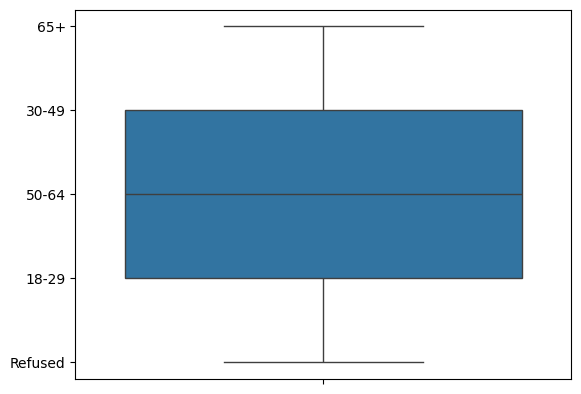

In [46]:
sns.boxplot(df_dropped['F_AGECAT'].unique())

In [21]:
# List of categorical variables
categorical_vars = ['TECH1_W99',	'CNCEXC_W99',	'ALGFAIR_W99',	'DISCRIM1_a_W99',	'DISCRIM1_b_W99',	'DISCRIM1_c_W99',	'DISCRIM1_d_W99',	'DISCRIM1_e_W99',	'DISCRIM1_f_W99',	'F_AGECAT',	'F_GENDER',	'F_EDUCCAT2',	'F_RACETHNMOD',	'F_CITIZEN',	'DCARS1_W99',	'DCARS2_W99',	'DCARS3_W99',	'DCARS4_a_W99',	'DCARS4_b_W99',	'DCARS4_c_W99',	'DCARS4_d_W99',	'DCARS5_W99',	'DCARS6_W99',	'DCARS7_W99',	'DCARS8_a_W99',	'DCARS8_b_W99',	'DCARS8_c_W99',	'DCARS8_d_W99',	'DCARS9_W99',	'DCARS10_W99',	'DCARS11_a_W99',	'DCARS11_b_W99',	'DCARS11_c_W99',	'DCARS11_d_W99',	'DCARS12_W99',	'DCARS13_a_W99',	'DCARS13_b_W99',	'DCARS13_c_W99',	'DCARS13_d_W99',	'F_MARITAL',	'F_RELIG',	'F_PARTY_FINAL',	'F_REG',	'F_INC_TIER2', 'Merged_EXCITOE_W99']

#display the data types of the categorical variables
print(df_dropped[categorical_vars].dtypes)

TECH1_W99             object
CNCEXC_W99            object
ALGFAIR_W99           object
DISCRIM1_a_W99        object
DISCRIM1_b_W99        object
DISCRIM1_c_W99        object
DISCRIM1_d_W99        object
DISCRIM1_e_W99        object
DISCRIM1_f_W99        object
F_AGECAT              object
F_GENDER              object
F_EDUCCAT2            object
F_RACETHNMOD          object
F_CITIZEN             object
DCARS1_W99            object
DCARS2_W99            object
DCARS3_W99            object
DCARS4_a_W99          object
DCARS4_b_W99          object
DCARS4_c_W99          object
DCARS4_d_W99          object
DCARS5_W99            object
DCARS6_W99            object
DCARS7_W99            object
DCARS8_a_W99          object
DCARS8_b_W99          object
DCARS8_c_W99          object
DCARS8_d_W99          object
DCARS9_W99            object
DCARS10_W99           object
DCARS11_a_W99         object
DCARS11_b_W99         object
DCARS11_c_W99         object
DCARS11_d_W99         object
DCARS12_W99   

In [22]:
# Convert all values in the categorical columns to strings
#for column in categorical_vars:
    #df_dropped[column] = df_dropped[column].astype(str)

# Create a mapping dictionary dynamically
#mapping_dict = {}
#for column in categorical_vars:
#    unique_values = sorted(df_dropped[column].unique())
#    mapping_dict[column] = {value: idx + 1 for idx, value in enumerate(unique_values)}

# Define a function to map and convert columns
#def map_and_convert(df, column, mapping):
#    df_dropped[column] = df_dropped[column].map(mapping)
#    df_dropped[column] = pd.to_numeric(df[column])

# Loop through the categorical variables and apply the mapping
#for column in categorical_vars:
#    map_and_convert(df_dropped, column, mapping_dict[column])

# Save the new dataset with the encoded columns
#df_dropped.to_csv('https://raw.githubusercontent.com/ggotoo/Artificial-Intelligence/main/AI_Condensed_Data_Useful_Data.csv', index=False)

In [23]:
# List of categorical variables
categorical_vars = ['TECH1_W99',	'CNCEXC_W99',	'ALGFAIR_W99',	'DISCRIM1_a_W99',	'DISCRIM1_b_W99',	'DISCRIM1_c_W99',	'DISCRIM1_d_W99',	'DISCRIM1_e_W99',	'DISCRIM1_f_W99',	'F_AGECAT',	'F_GENDER',	'F_EDUCCAT2',	'F_RACETHNMOD',	'F_CITIZEN',	'DCARS1_W99',	'DCARS2_W99',	'DCARS3_W99',	'DCARS4_a_W99',	'DCARS4_b_W99',	'DCARS4_c_W99',	'DCARS4_d_W99',	'DCARS5_W99',	'DCARS6_W99',	'DCARS7_W99',	'DCARS8_a_W99',	'DCARS8_b_W99',	'DCARS8_c_W99',	'DCARS8_d_W99',	'DCARS9_W99',	'DCARS10_W99',	'DCARS11_a_W99',	'DCARS11_b_W99',	'DCARS11_c_W99',	'DCARS11_d_W99',	'DCARS12_W99',	'DCARS13_a_W99',	'DCARS13_b_W99',	'DCARS13_c_W99',	'DCARS13_d_W99',	'F_MARITAL',	'F_RELIG',	'F_PARTY_FINAL',	'F_REG',	'F_INC_TIER2']

#display the data types of the categorical variables
print(df[categorical_vars].dtypes)

# Convert all values in the categorical columns to strings
for column in categorical_vars:
    df[column] = df[column].astype(str)

# Create a mapping dictionary dynamically
mapping_dict = {}
for column in categorical_vars:
    unique_values = sorted(df[column].unique())
    mapping_dict[column] = {value: idx + 1 for idx, value in enumerate(unique_values)}

# Define a function to map and convert columns
def map_and_convert(df, column, mapping):
    new_column_name = f"{column}_numeric"
    df[new_column_name] = df[column].map(mapping)
    df[new_column_name] = pd.to_numeric(df[new_column_name])

# Loop through the categorical variables and apply the mapping
for column in categorical_vars:
    map_and_convert(df, column, mapping_dict[column])

# Display the first few rows of the dataframe to verify the mapping
print(df.head())


TECH1_W99         object
CNCEXC_W99        object
ALGFAIR_W99       object
DISCRIM1_a_W99    object
DISCRIM1_b_W99    object
DISCRIM1_c_W99    object
DISCRIM1_d_W99    object
DISCRIM1_e_W99    object
DISCRIM1_f_W99    object
F_AGECAT          object
F_GENDER          object
F_EDUCCAT2        object
F_RACETHNMOD      object
F_CITIZEN         object
DCARS1_W99        object
DCARS2_W99        object
DCARS3_W99        object
DCARS4_a_W99      object
DCARS4_b_W99      object
DCARS4_c_W99      object
DCARS4_d_W99      object
DCARS5_W99        object
DCARS6_W99        object
DCARS7_W99        object
DCARS8_a_W99      object
DCARS8_b_W99      object
DCARS8_c_W99      object
DCARS8_d_W99      object
DCARS9_W99        object
DCARS10_W99       object
DCARS11_a_W99     object
DCARS11_b_W99     object
DCARS11_c_W99     object
DCARS11_d_W99     object
DCARS12_W99       object
DCARS13_a_W99     object
DCARS13_b_W99     object
DCARS13_c_W99     object
DCARS13_d_W99     object
F_MARITAL         object


In [24]:
df_dropped.head()

QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0  Mostly positive  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0  Mostly positive  Equally concerned and excited  Not possible   
4  100637.0  Mostly positive  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ... DCARS13_a_W99 DCARS13_b_W99 DCARS13_c_W99 DCARS13_d_W99  \
0       Not sure  ...         Favor        Oppose        Oppose         Favor   
1      Very well  ...      Not sure        Oppose         Favor         Favor   
2  Somewhat well  ...         Favor      Not sure         Favor         Favor   
3       Not sure  ...         Favor        Oppose        Oppose         Favor   
4       Not sure  ...         Favor        Oppose        Oppose         Favor   

            F_MARITAL                F_RELIG F_PARTY_FINAL  \
0  Never been married  Nothing in particular    Republican   
1            Divorced             Protestant    Republican   
2             Married         Roman Catholic      Democrat   
3             Married             Protestant    Republican   
4             Married             Protestant   Independent   

                                               F_REG    F_INC_TIER2  \
0  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
1  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
2  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
3  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
4  You are ABSOLUTELY CERTAIN that you are regist...   Lower income   

           Merged_EXCITOE_W99  
0  Makes life, society better  
1        Don't know/No answer  
2  Makes life, society better  
3  Makes life, society better  
4  Makes life, society better  

[5 rows x 46 columns]

In [25]:
df_dropped.isna().sum()/100

QKEY                  0.0
TECH1_W99             0.0
CNCEXC_W99            0.0
ALGFAIR_W99           0.0
DISCRIM1_a_W99        0.0
DISCRIM1_b_W99        0.0
DISCRIM1_c_W99        0.0
DISCRIM1_d_W99        0.0
DISCRIM1_e_W99        0.0
DISCRIM1_f_W99        0.0
F_AGECAT              0.0
F_GENDER              0.0
F_EDUCCAT2            0.0
F_RACETHNMOD          0.0
F_CITIZEN             0.0
DCARS1_W99            0.0
DCARS2_W99            0.0
DCARS3_W99            0.0
DCARS4_a_W99          0.0
DCARS4_b_W99          0.0
DCARS4_c_W99          0.0
DCARS4_d_W99          0.0
DCARS5_W99            0.0
DCARS6_W99            0.0
DCARS7_W99            0.0
DCARS8_a_W99          0.0
DCARS8_b_W99          0.0
DCARS8_c_W99          0.0
DCARS8_d_W99          0.0
DCARS9_W99            0.0
DCARS10_W99           0.0
DCARS11_a_W99         0.0
DCARS11_b_W99         0.0
DCARS11_c_W99         0.0
DCARS11_d_W99         0.0
DCARS12_W99           0.0
DCARS13_a_W99         0.0
DCARS13_b_W99         0.0
DCARS13_c_W9

In [26]:
df_dropped.head()

QKEY        TECH1_W99                     CNCEXC_W99   ALGFAIR_W99  \
0  100260.0  Mostly positive  Equally concerned and excited  Not possible   
1  100314.0  Mostly positive    More excited than concerned      Possible   
2  100363.0  Mostly positive  Equally concerned and excited  Not possible   
3  100598.0  Mostly positive  Equally concerned and excited  Not possible   
4  100637.0  Mostly positive  Equally concerned and excited      Not sure   

  DISCRIM1_a_W99 DISCRIM1_b_W99 DISCRIM1_c_W99 DISCRIM1_d_W99 DISCRIM1_e_W99  \
0   Not too well      Very well      Very well      Very well       Not sure   
1      Very well   Not too well   Not too well       Not sure  Somewhat well   
2  Somewhat well  Somewhat well  Somewhat well  Somewhat well      Very well   
3       Not sure       Not sure       Not sure       Not sure       Not sure   
4       Not sure       Not sure       Not sure       Not sure      Very well   

  DISCRIM1_f_W99  ... DCARS13_a_W99 DCARS13_b_W99 DCARS13_c_W99 DCARS13_d_W99  \
0       Not sure  ...         Favor        Oppose        Oppose         Favor   
1      Very well  ...      Not sure        Oppose         Favor         Favor   
2  Somewhat well  ...         Favor      Not sure         Favor         Favor   
3       Not sure  ...         Favor        Oppose        Oppose         Favor   
4       Not sure  ...         Favor        Oppose        Oppose         Favor   

            F_MARITAL                F_RELIG F_PARTY_FINAL  \
0  Never been married  Nothing in particular    Republican   
1            Divorced             Protestant    Republican   
2             Married         Roman Catholic      Democrat   
3             Married             Protestant    Republican   
4             Married             Protestant   Independent   

                                               F_REG    F_INC_TIER2  \
0  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
1  You are ABSOLUTELY CERTAIN that you are regist...  Middle income   
2  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
3  You are ABSOLUTELY CERTAIN that you are regist...   Upper income   
4  You are ABSOLUTELY CERTAIN that you are regist...   Lower income   

           Merged_EXCITOE_W99  
0  Makes life, society better  
1        Don't know/No answer  
2  Makes life, society better  
3  Makes life, society better  
4  Makes life, society better  

[5 rows x 46 columns]

In [27]:
#display the data types of the categorical variables
print(df_dropped[categorical_vars].dtypes)

TECH1_W99         object
CNCEXC_W99        object
ALGFAIR_W99       object
DISCRIM1_a_W99    object
DISCRIM1_b_W99    object
DISCRIM1_c_W99    object
DISCRIM1_d_W99    object
DISCRIM1_e_W99    object
DISCRIM1_f_W99    object
F_AGECAT          object
F_GENDER          object
F_EDUCCAT2        object
F_RACETHNMOD      object
F_CITIZEN         object
DCARS1_W99        object
DCARS2_W99        object
DCARS3_W99        object
DCARS4_a_W99      object
DCARS4_b_W99      object
DCARS4_c_W99      object
DCARS4_d_W99      object
DCARS5_W99        object
DCARS6_W99        object
DCARS7_W99        object
DCARS8_a_W99      object
DCARS8_b_W99      object
DCARS8_c_W99      object
DCARS8_d_W99      object
DCARS9_W99        object
DCARS10_W99       object
DCARS11_a_W99     object
DCARS11_b_W99     object
DCARS11_c_W99     object
DCARS11_d_W99     object
DCARS12_W99       object
DCARS13_a_W99     object
DCARS13_b_W99     object
DCARS13_c_W99     object
DCARS13_d_W99     object
F_MARITAL         object


In [28]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9864 entries, 0 to 10259
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   QKEY                9864 non-null   float64
 1   TECH1_W99           9864 non-null   object 
 2   CNCEXC_W99          9864 non-null   object 
 3   ALGFAIR_W99         9864 non-null   object 
 4   DISCRIM1_a_W99      9864 non-null   object 
 5   DISCRIM1_b_W99      9864 non-null   object 
 6   DISCRIM1_c_W99      9864 non-null   object 
 7   DISCRIM1_d_W99      9864 non-null   object 
 8   DISCRIM1_e_W99      9864 non-null   object 
 9   DISCRIM1_f_W99      9864 non-null   object 
 10  F_AGECAT            9864 non-null   object 
 11  F_GENDER            9864 non-null   object 
 12  F_EDUCCAT2          9864 non-null   object 
 13  F_RACETHNMOD        9864 non-null   object 
 14  F_CITIZEN           9864 non-null   object 
 15  DCARS1_W99          9864 non-null   object 
 16  DCARS2_W99

In [29]:
#identifying the outliers in the data
#df_dropped.describe()

In [30]:
# Function to identify and remove outliers using IQR method
#def remove_outliers(df_dropped):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    #Q1 = df_dropped.quantile(0.25)
    #Q3 = df_dropped.quantile(0.75)
    #IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    #lower_bound = Q1 - 1.5 * IQR
    #upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    #outliers = ((df_dropped < lower_bound) | (df_dropped > upper_bound))
    
    # Remove outliers
    #df_no_outliers = df_dropped[~outliers.any(axis=1)]
    
    #return df_no_outliers



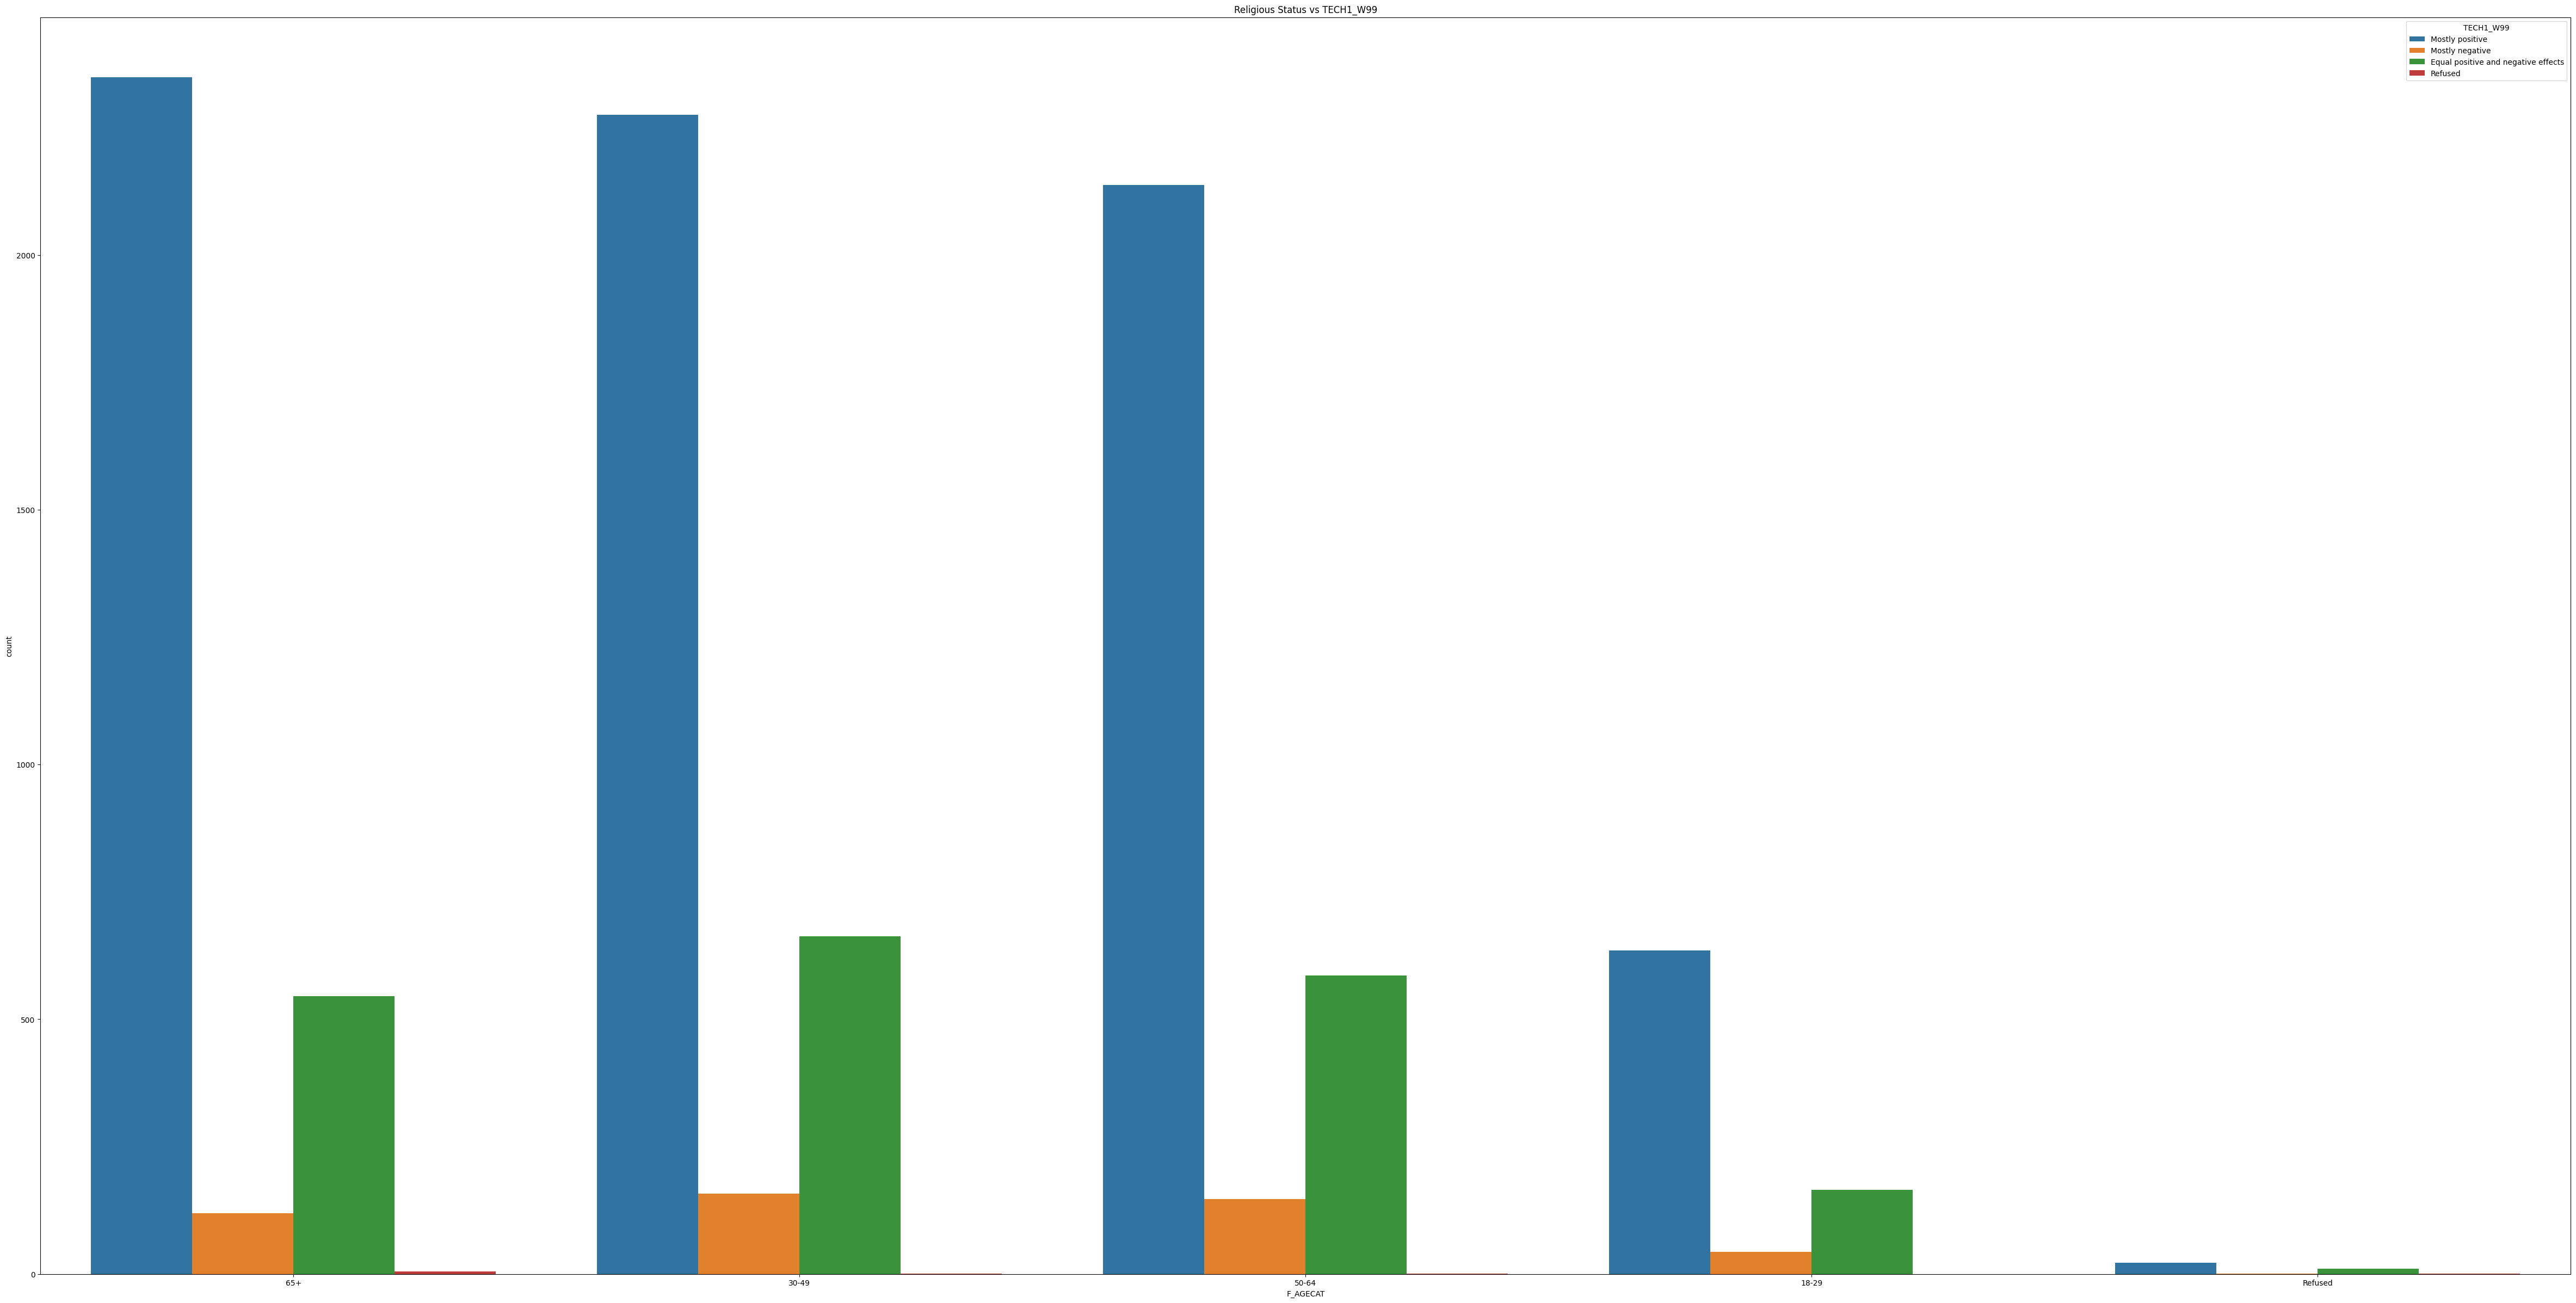

In [31]:
#create a displot of tech1_w99 and the categorical vars
#visualisation of the religous status and tech1_w99
plt.figure(figsize=(60, 30))
sns.countplot(data=df_dropped, x='F_AGECAT', hue='TECH1_W99')
plt.title("Religious Status vs TECH1_W99")
plt.show()

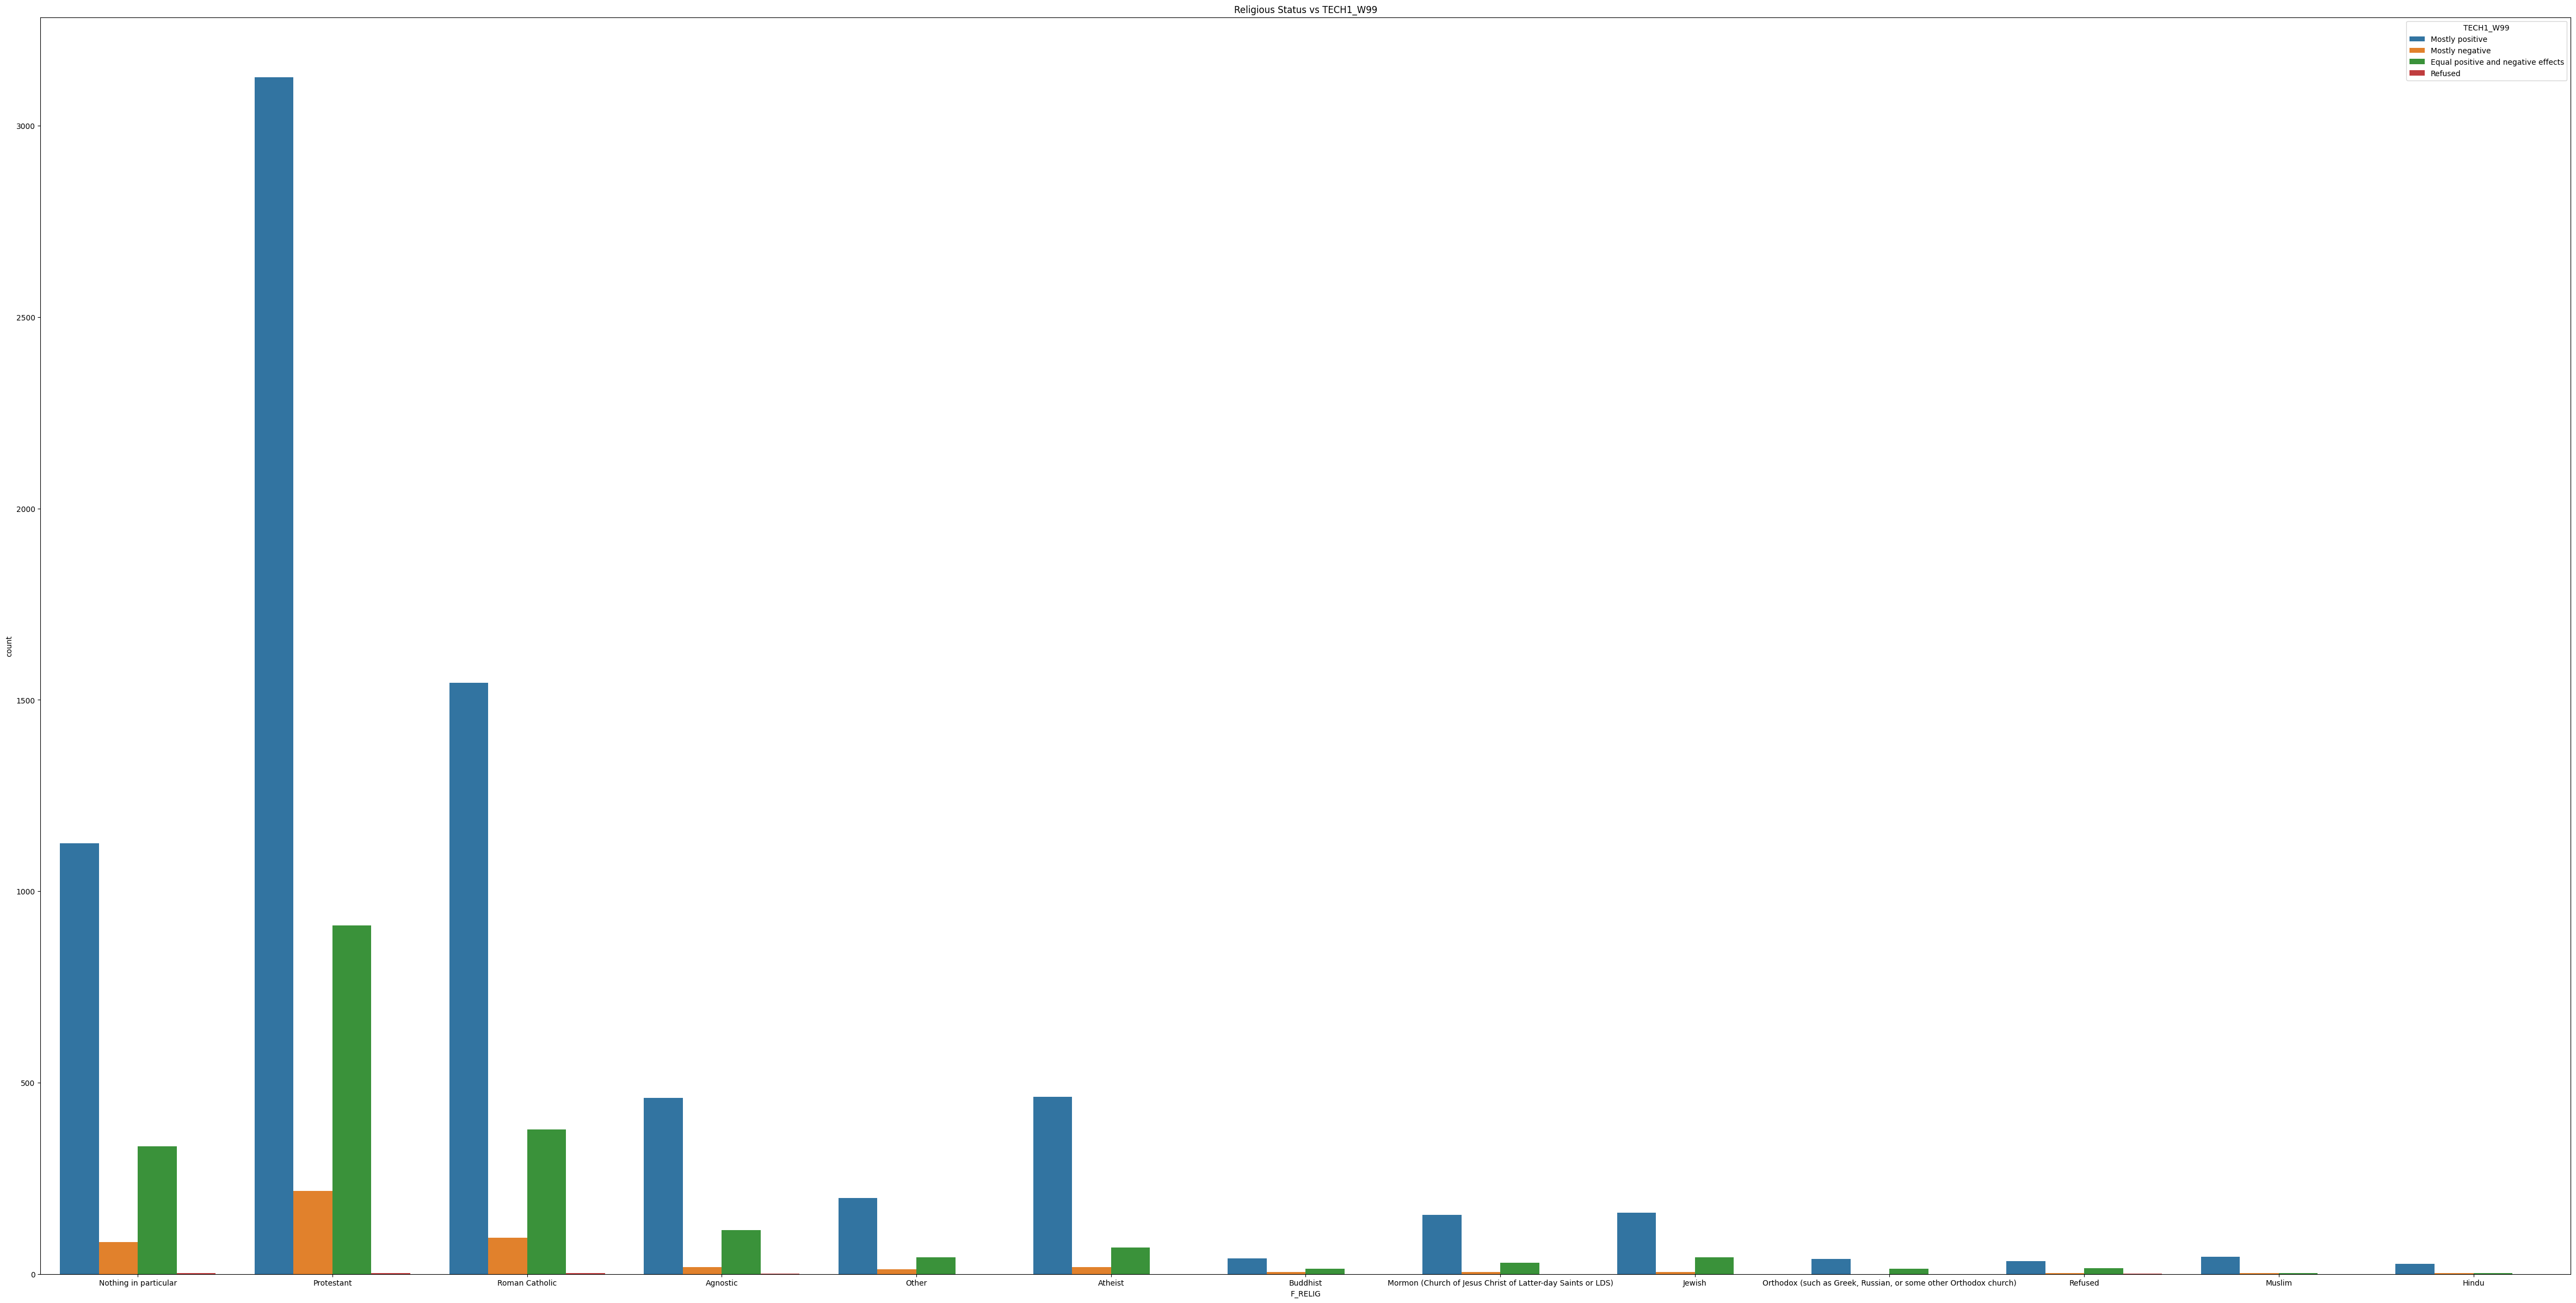

In [32]:
#visualisation of the religous status and tech1_w99
plt.figure(figsize=(60, 30))
sns.countplot(data=df_dropped, x='F_RELIG', hue='TECH1_W99')
plt.title("Religious Status vs TECH1_W99")
plt.show()

In [48]:
df_filtered = df_dropped[df_dropped['F_AGECAT'] != 'Refused']

# List of columns to categorize
dcars_columns = [col for col in df_filtered.columns if col.startswith('DCARS')]
# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG','F_RACETHNMOD','F_CITIZEN','F_EDUCCAT2','F_MARITAL','F_PARTY_FINAL']



# Create a summary of DCARS responses by demographic groups
summary = df_filtered.groupby(demographic_columns)[dcars_columns].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
print(summary)

                                                                                                                                                                                    DCARS1_W99  \
F_AGECAT F_GENDER F_INC_TIER2  F_REG                                              F_RACETHNMOD       F_CITIZEN F_EDUCCAT2                      F_MARITAL             F_PARTY_FINAL               
18-29    A man    Lower income Refused                                            White non-Hispanic Yes       Some college, no degree         Never been married    Democrat         A little   
                               You are ABSOLUTELY CERTAIN that you are registe... Asian non-Hispanic Yes       Associate's degree              Married               Democrat         A little   
                                                                                                                                               Never been married    Democrat         A little   
                              

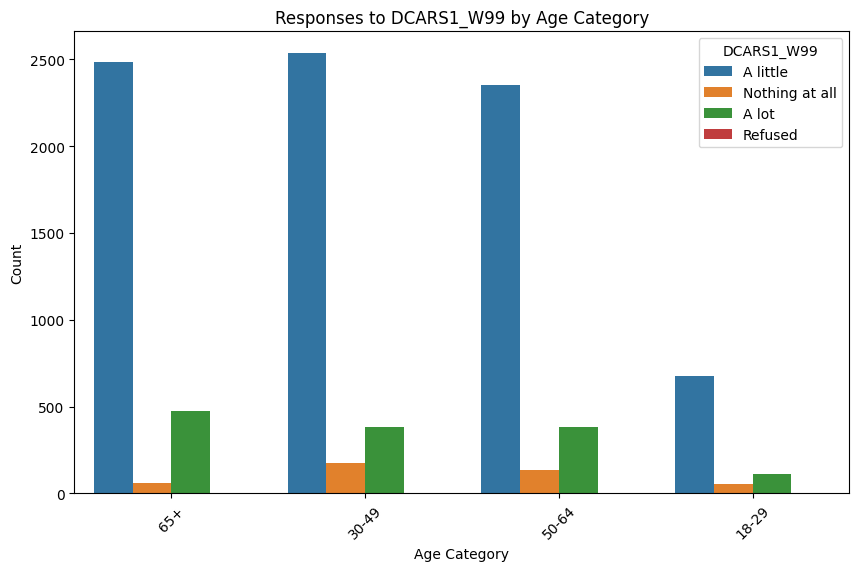

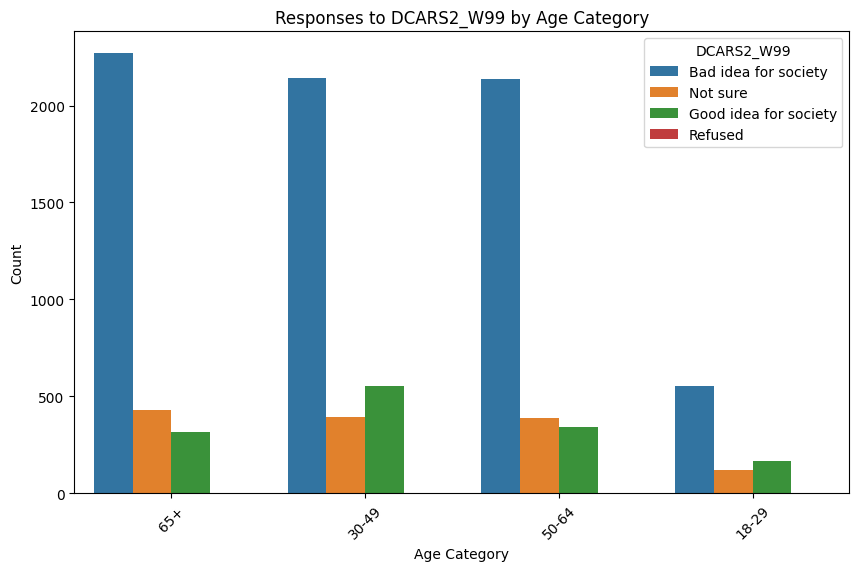

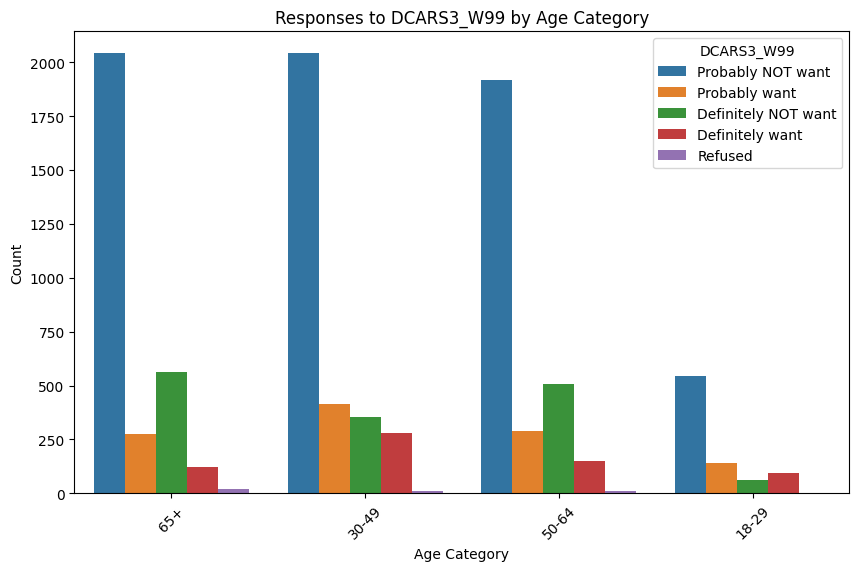

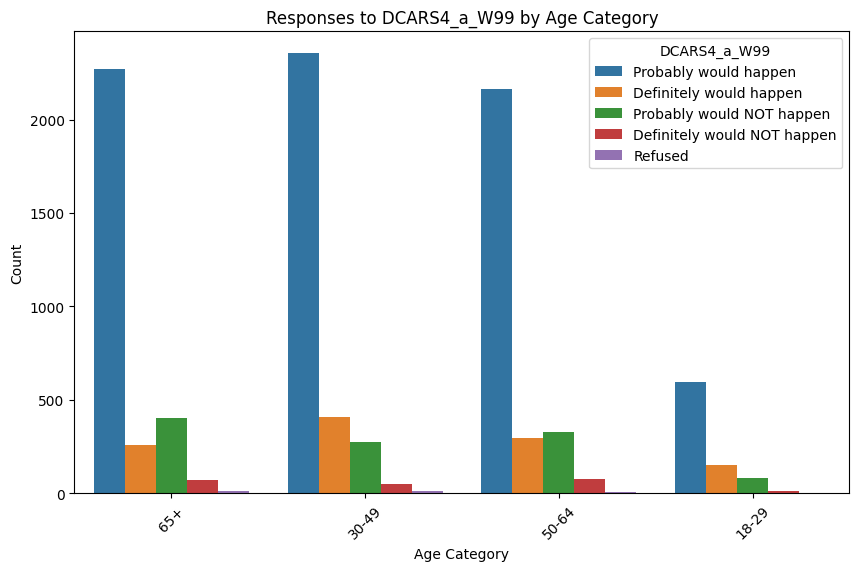

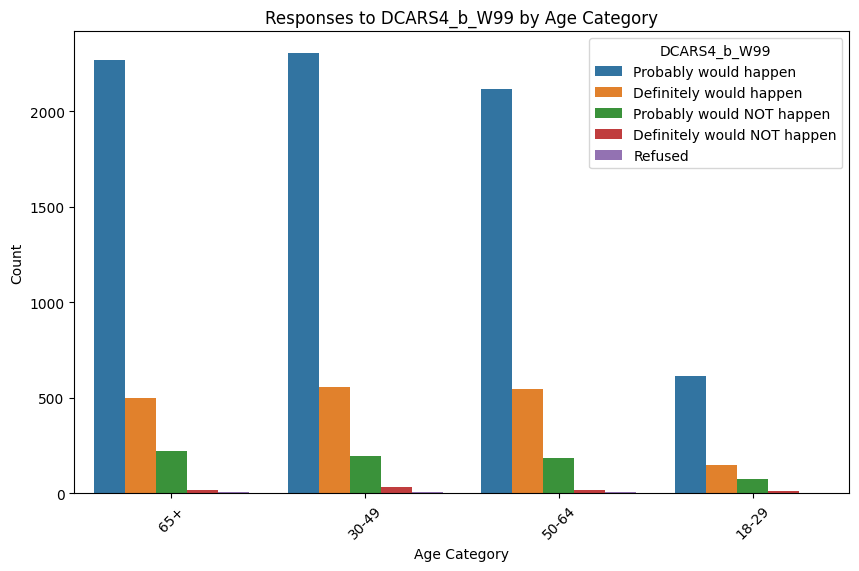

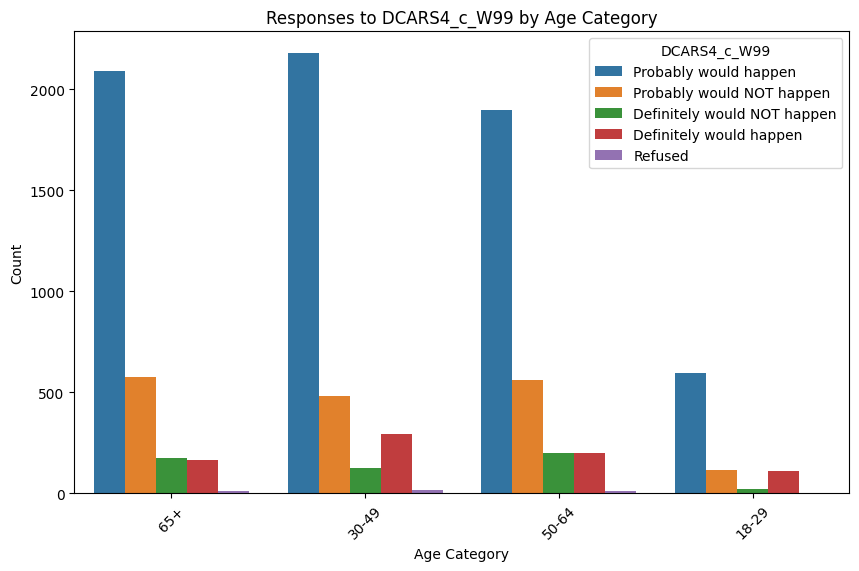

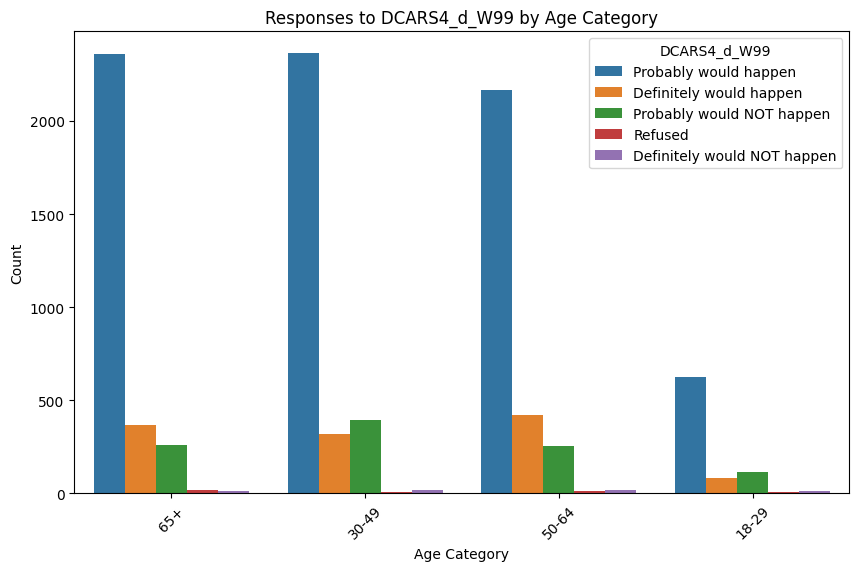

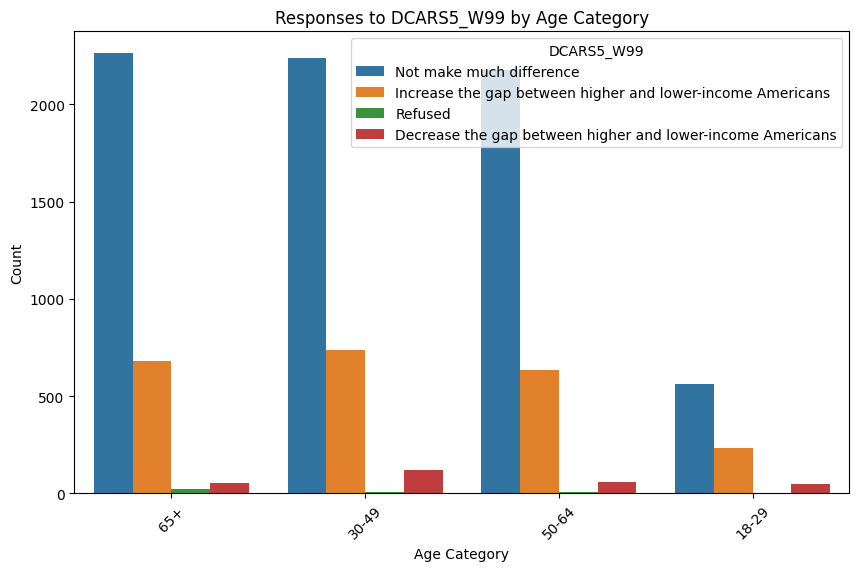

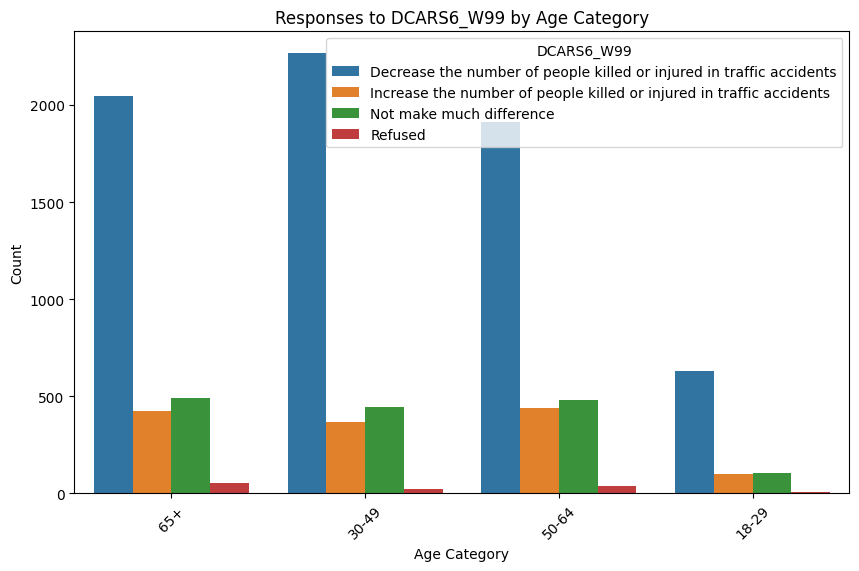

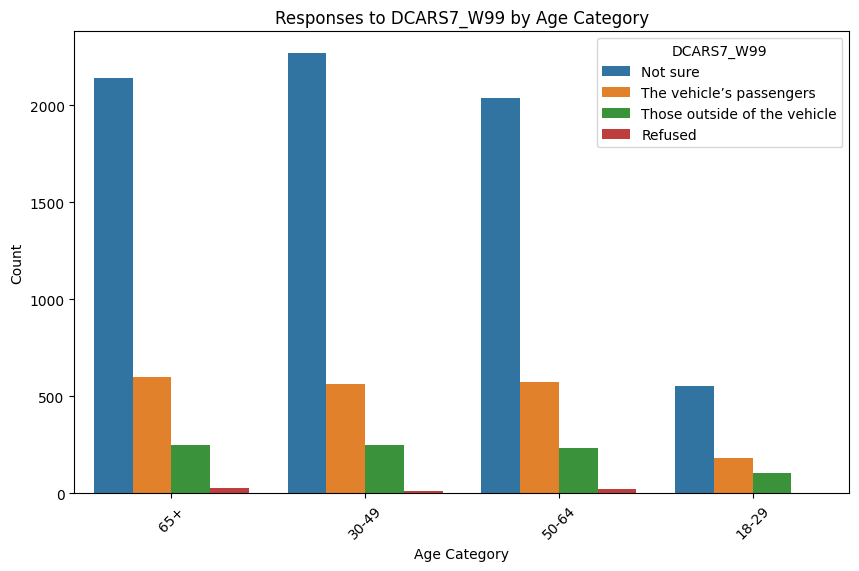

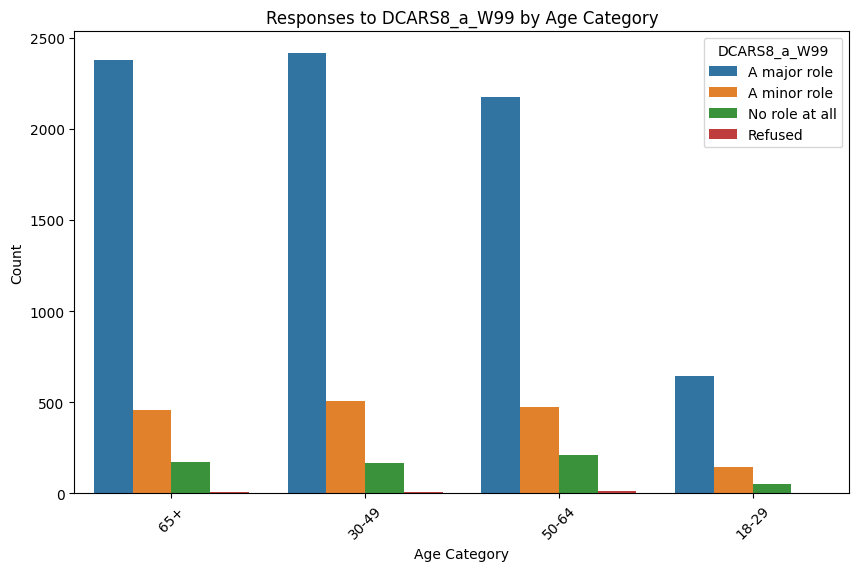

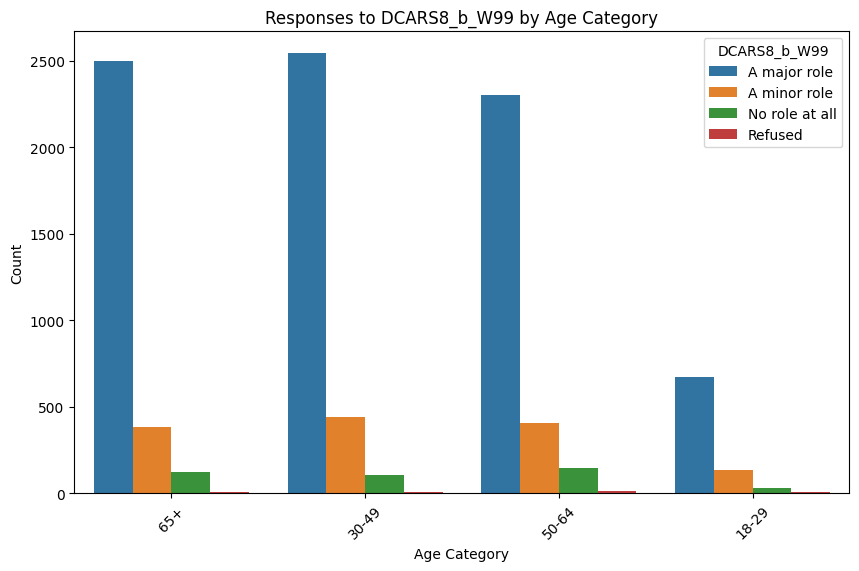

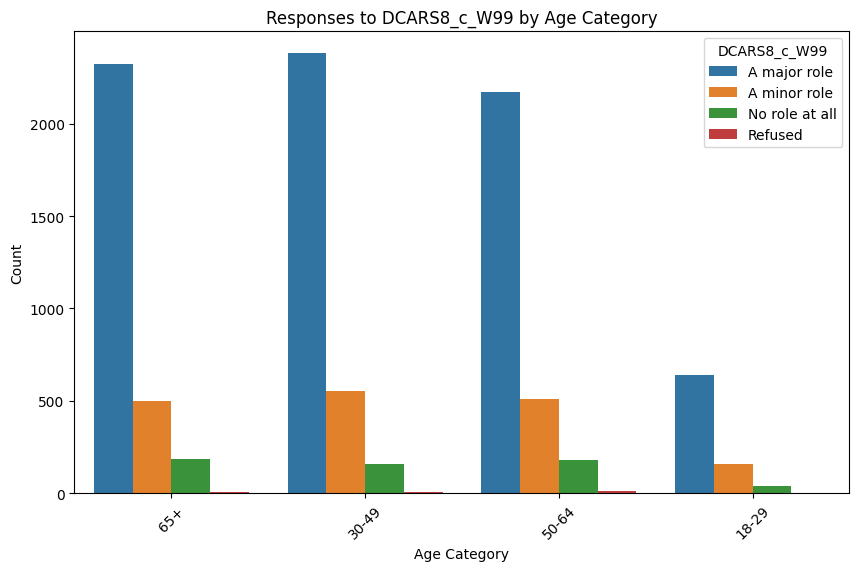

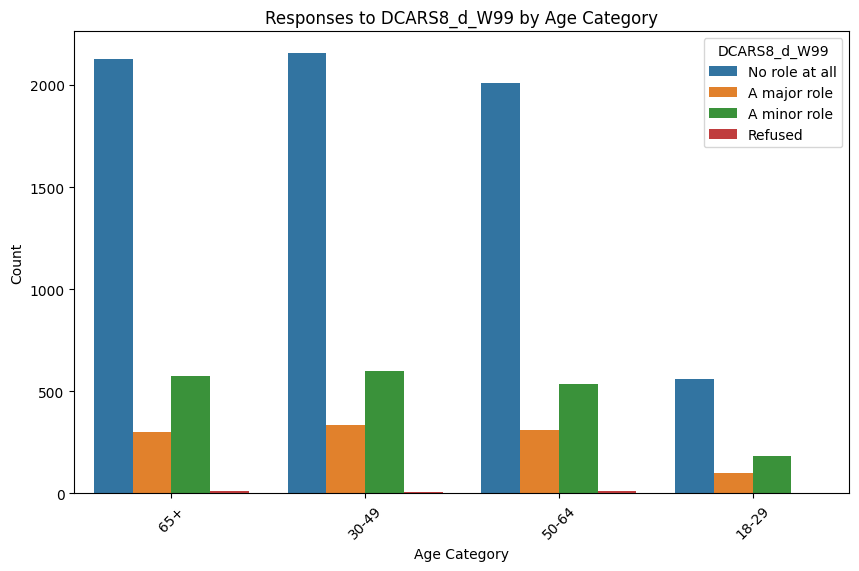

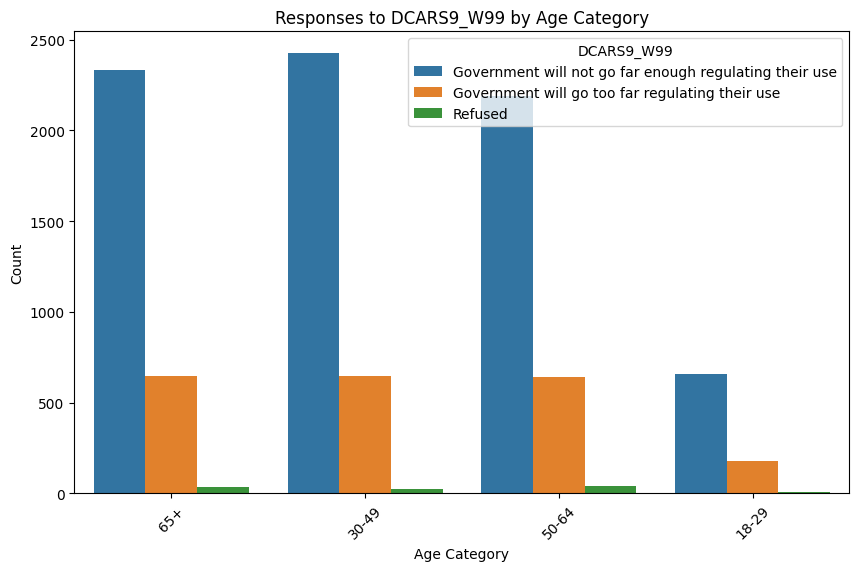

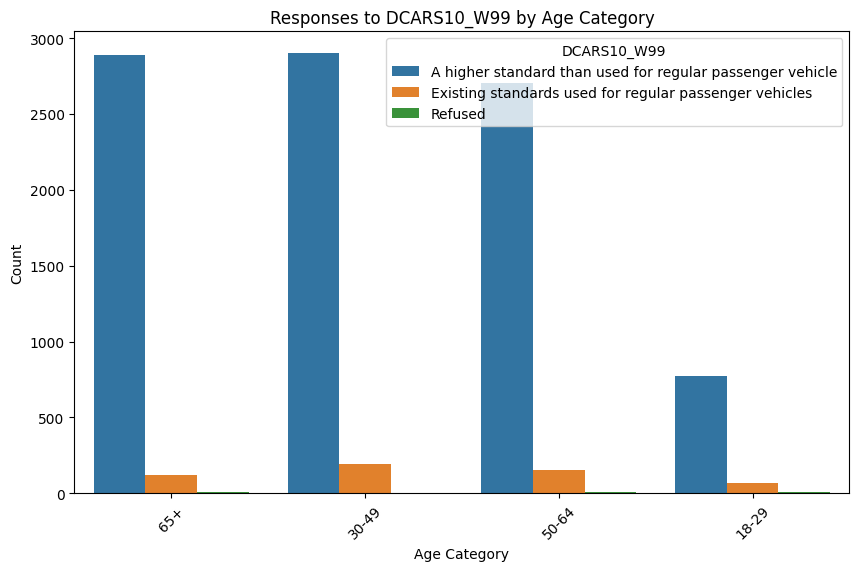

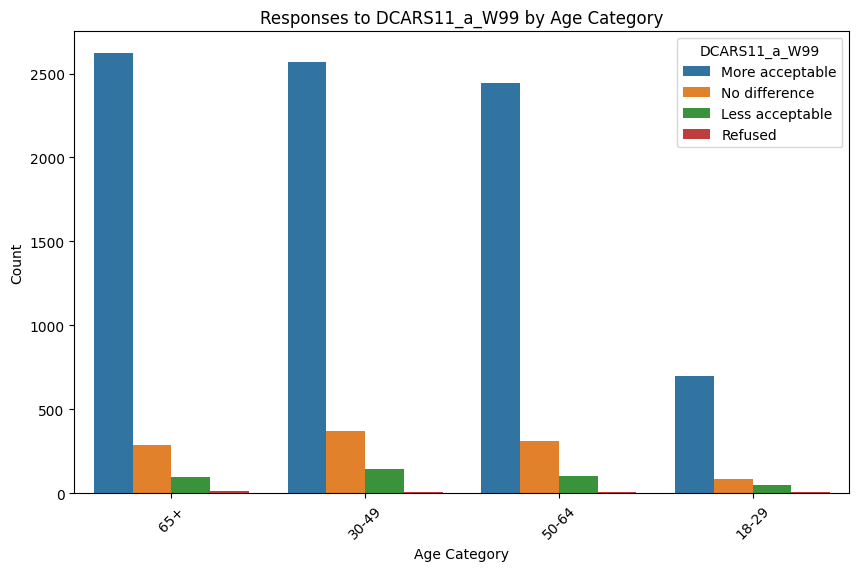

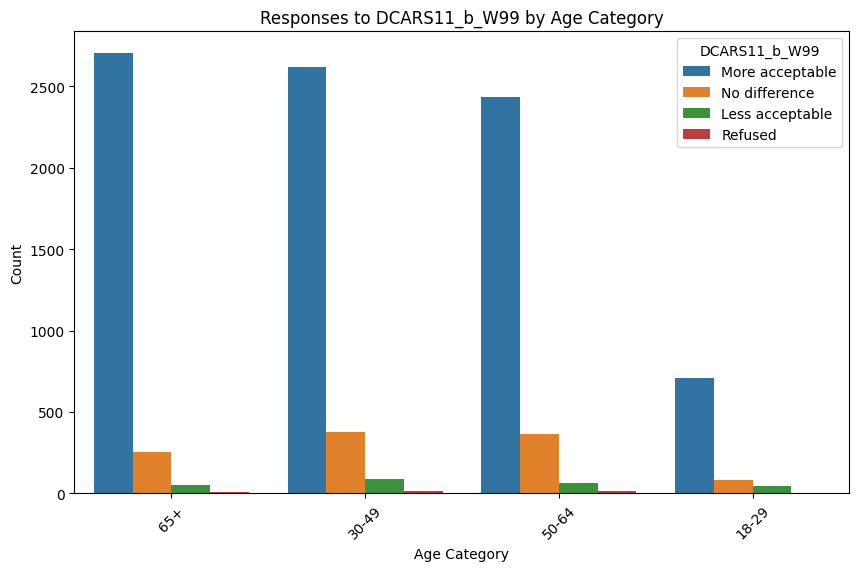

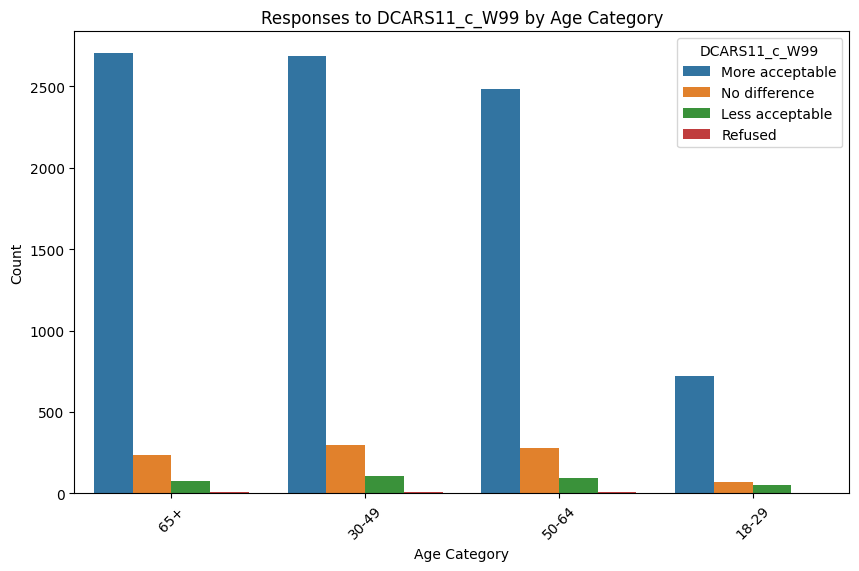

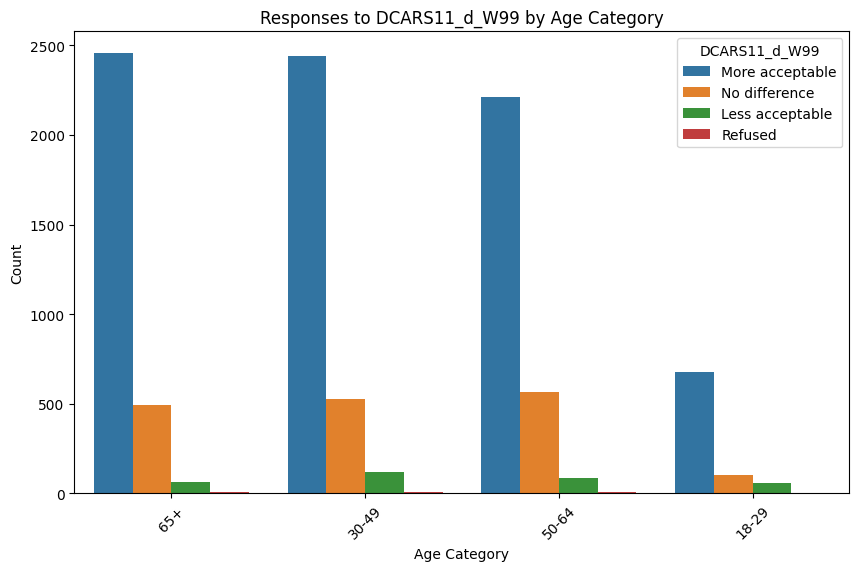

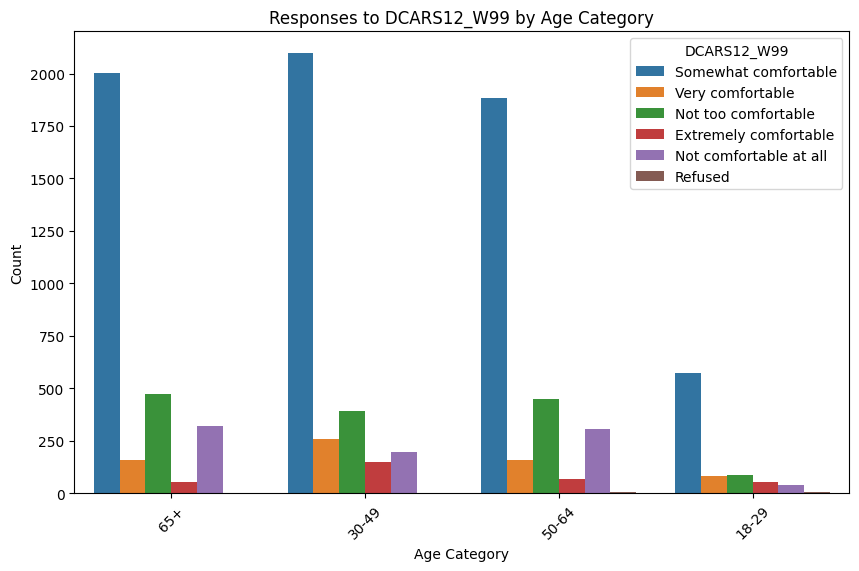

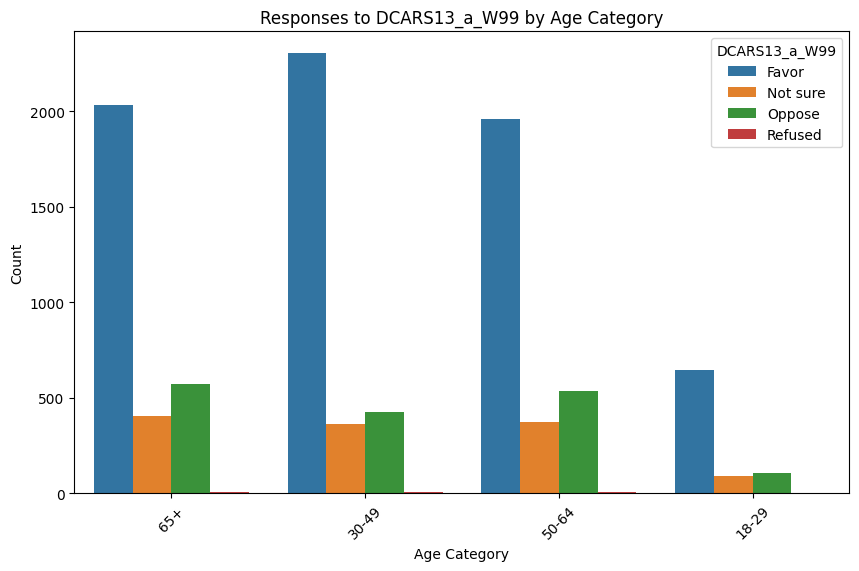

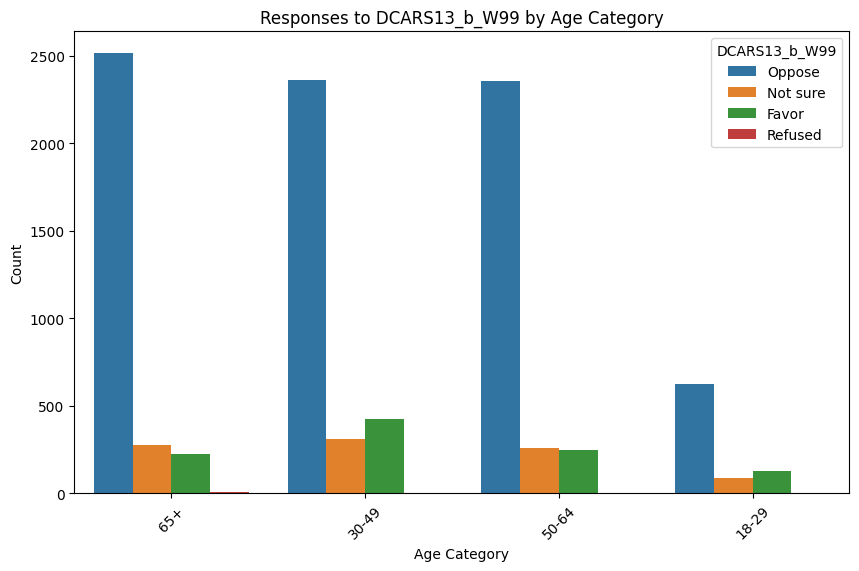

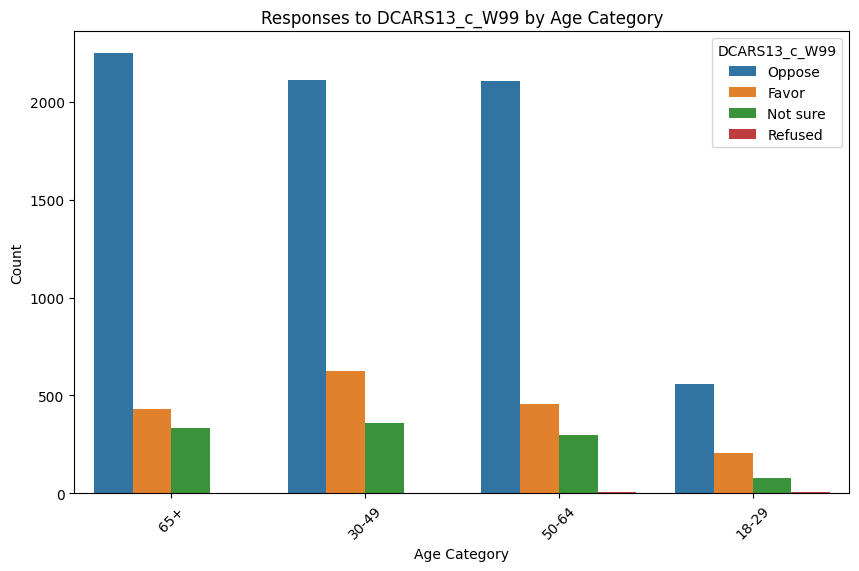

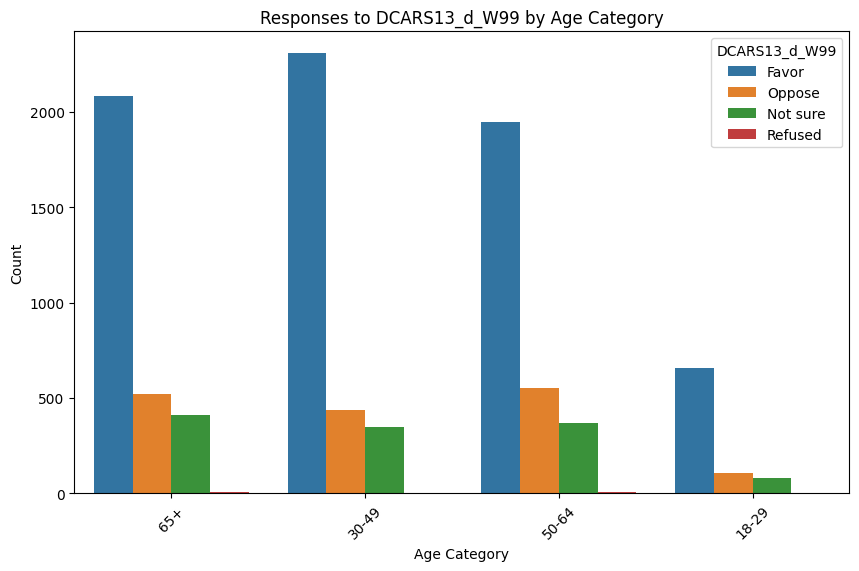

In [49]:
# List of columns to categorize
dcars_columns = [col for col in df_filtered.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x='F_AGECAT', hue=col)
    plt.title(f'Responses to {col} by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


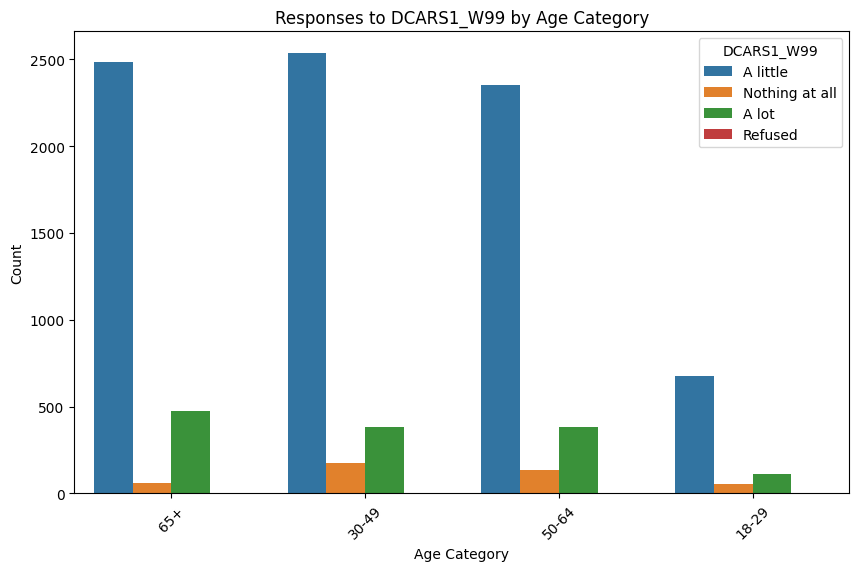

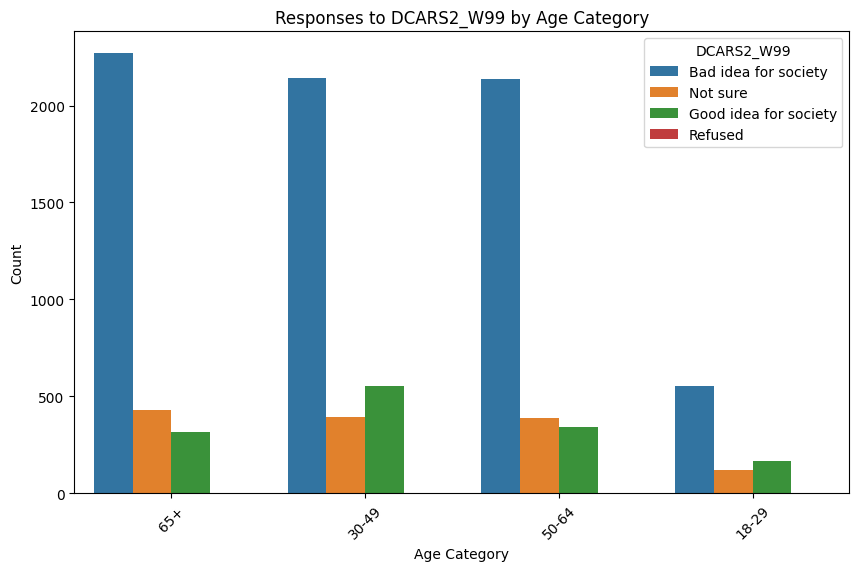

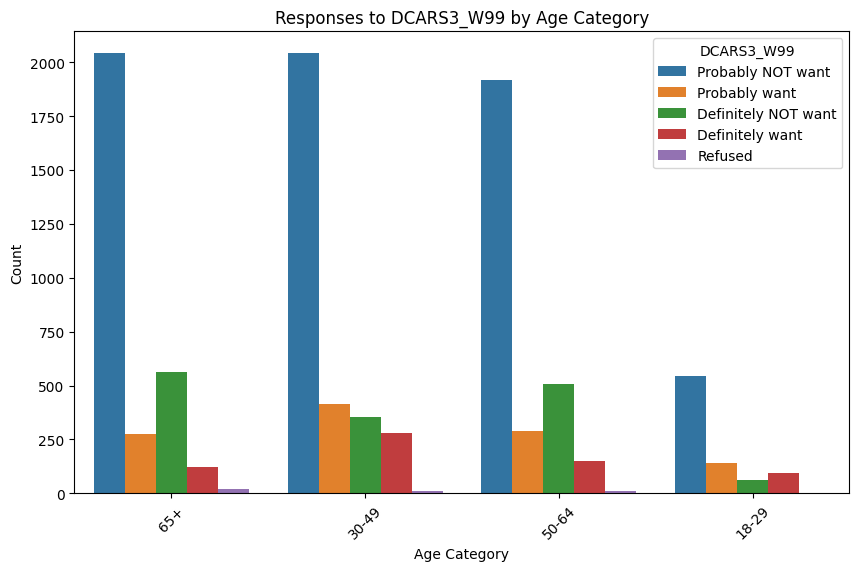

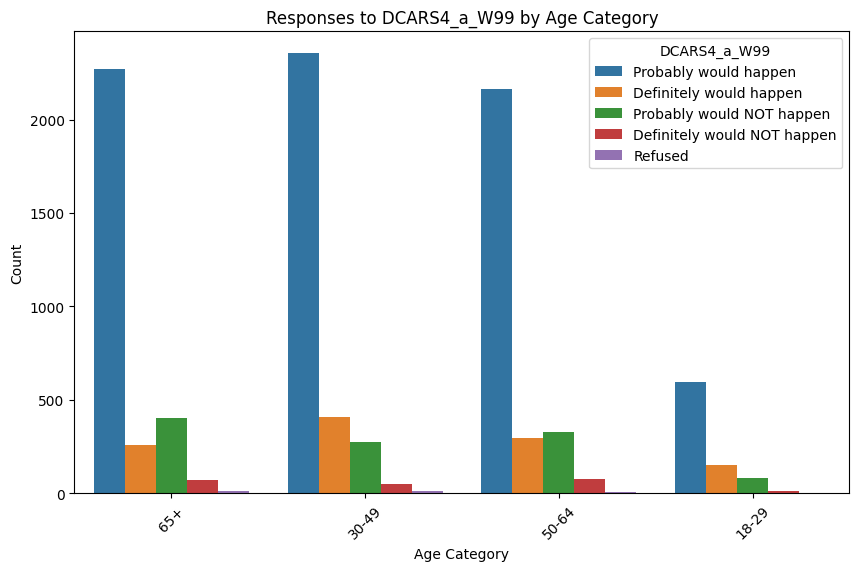

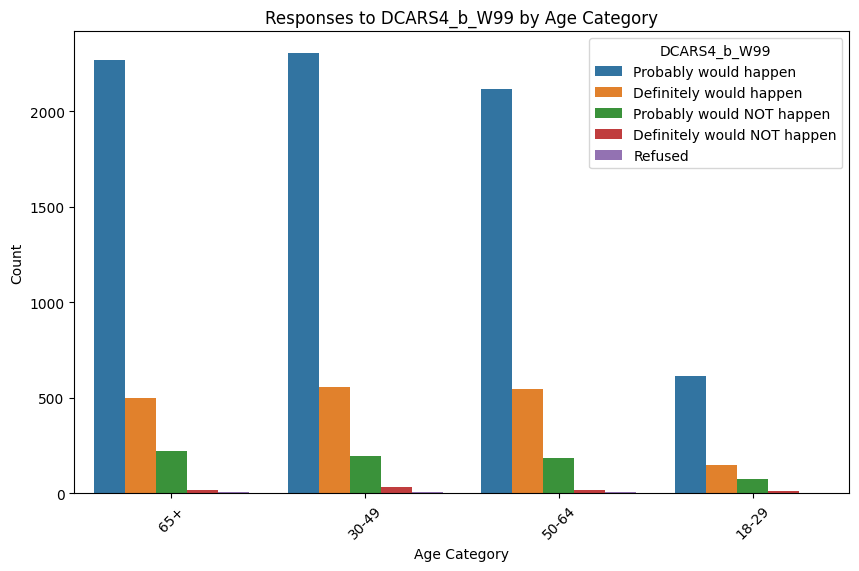

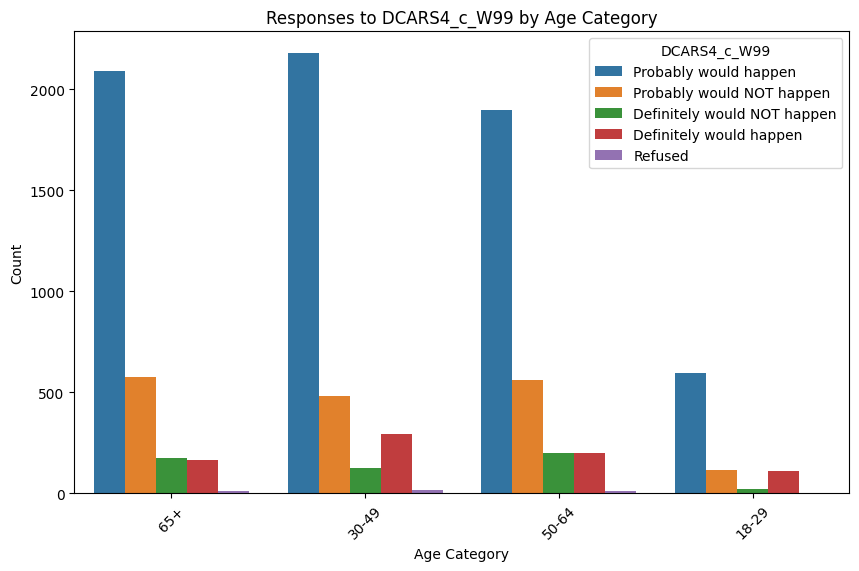

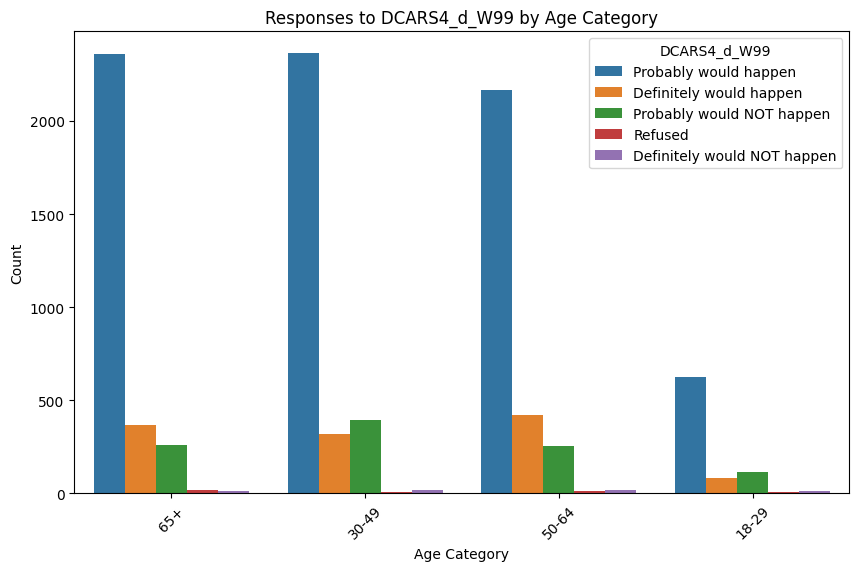

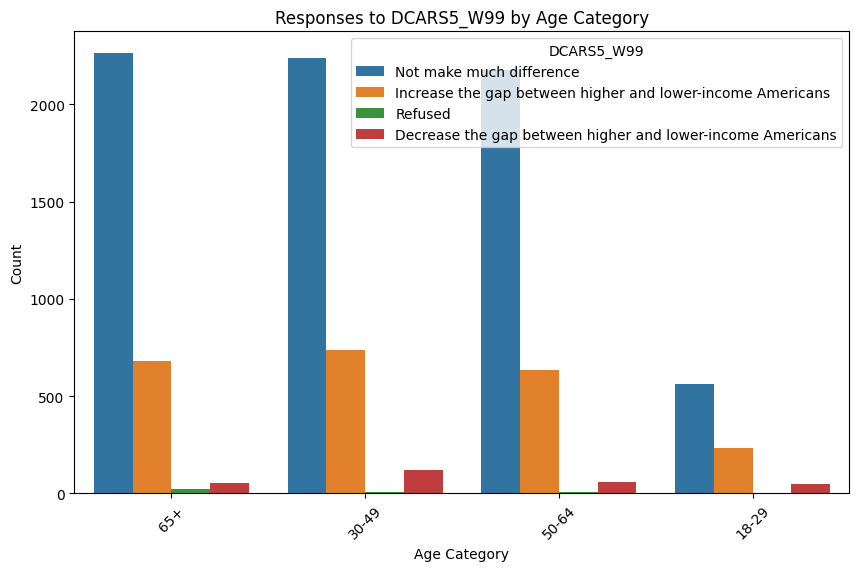

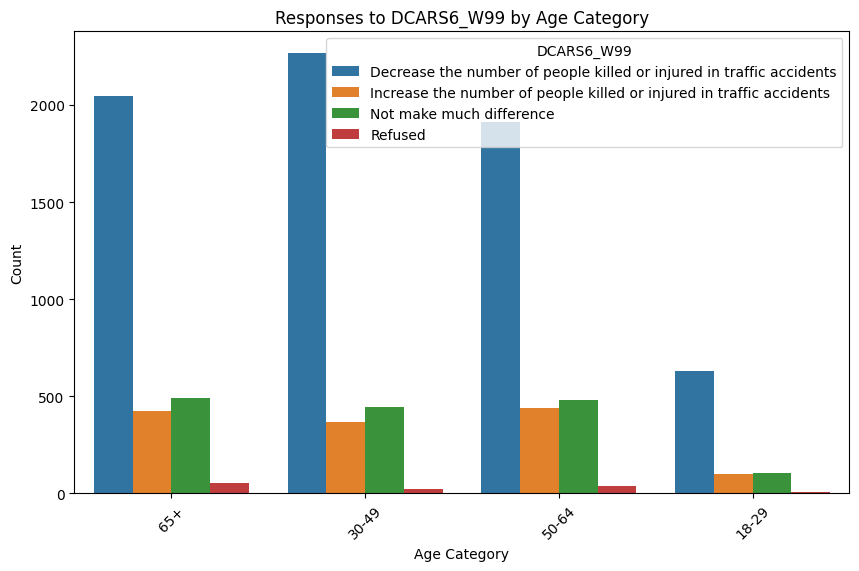

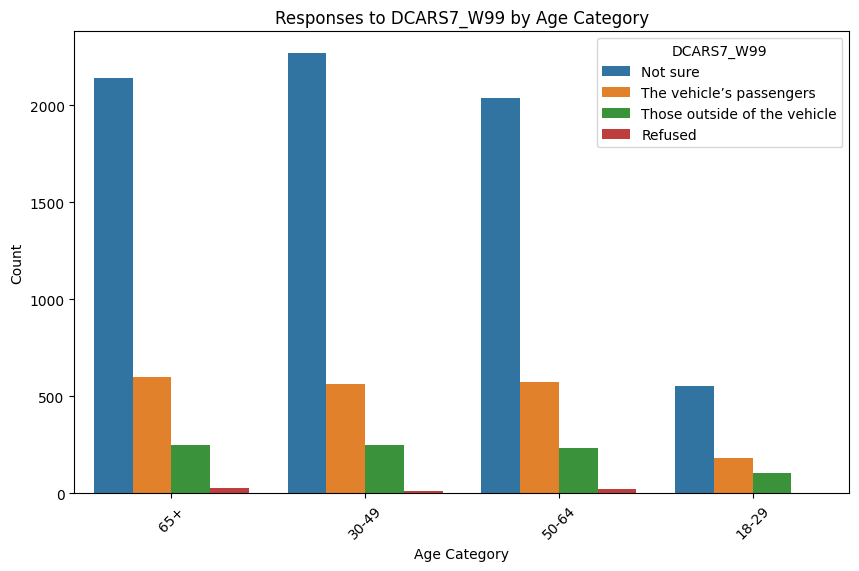

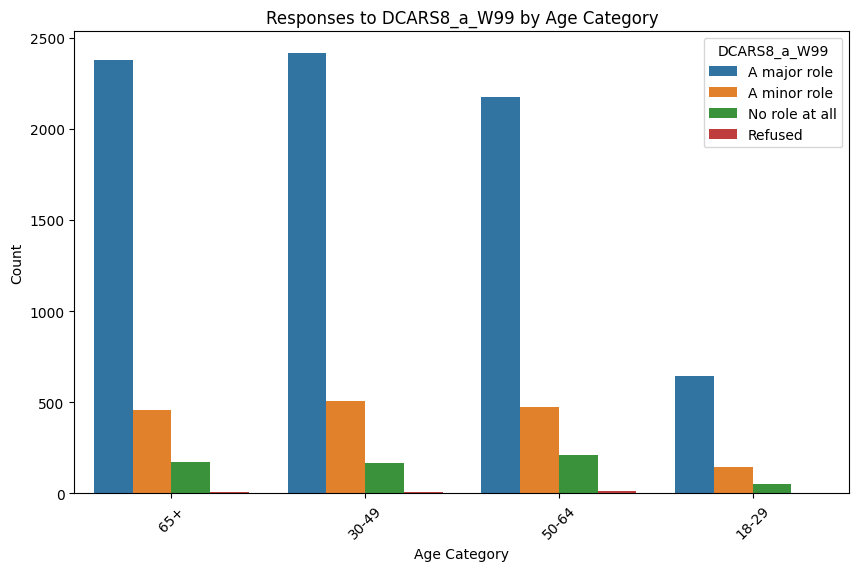

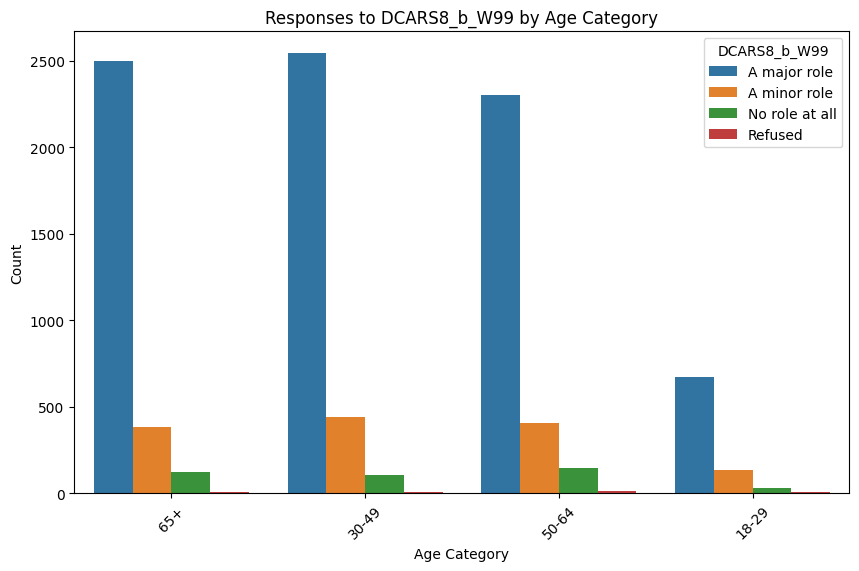

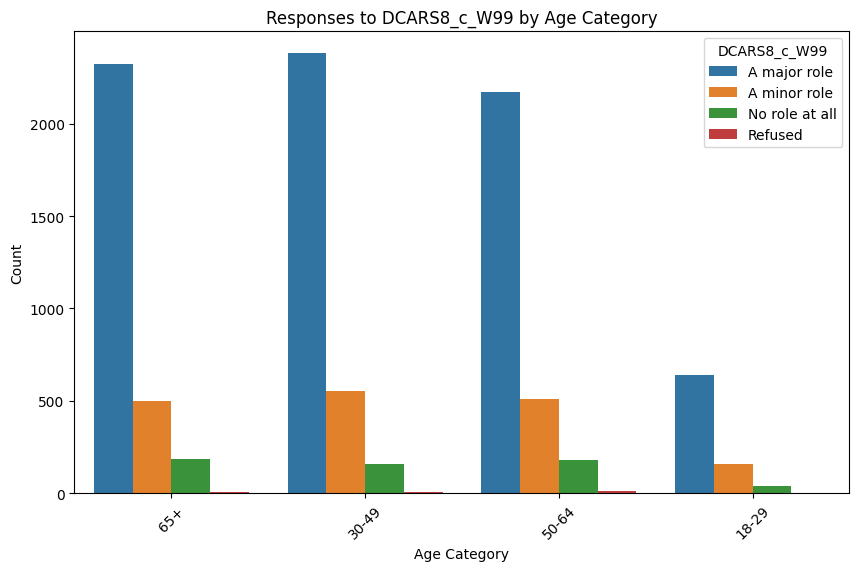

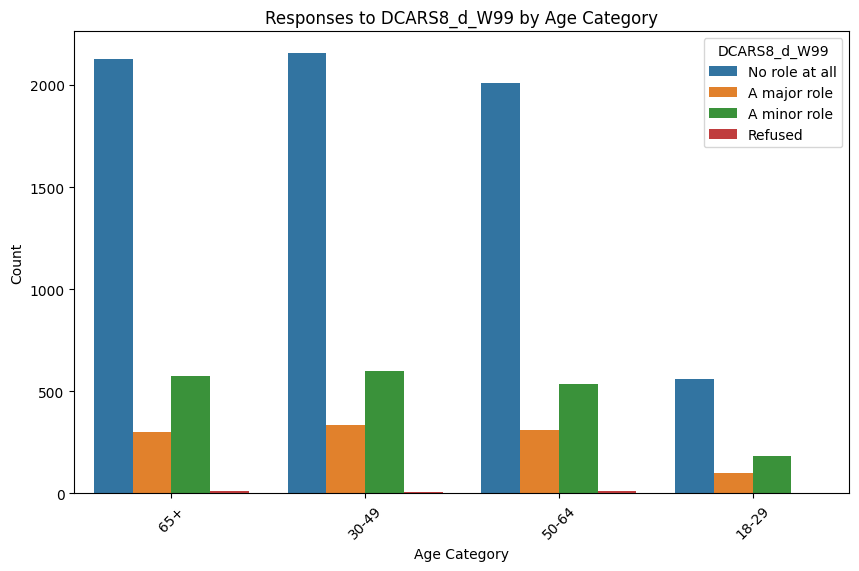

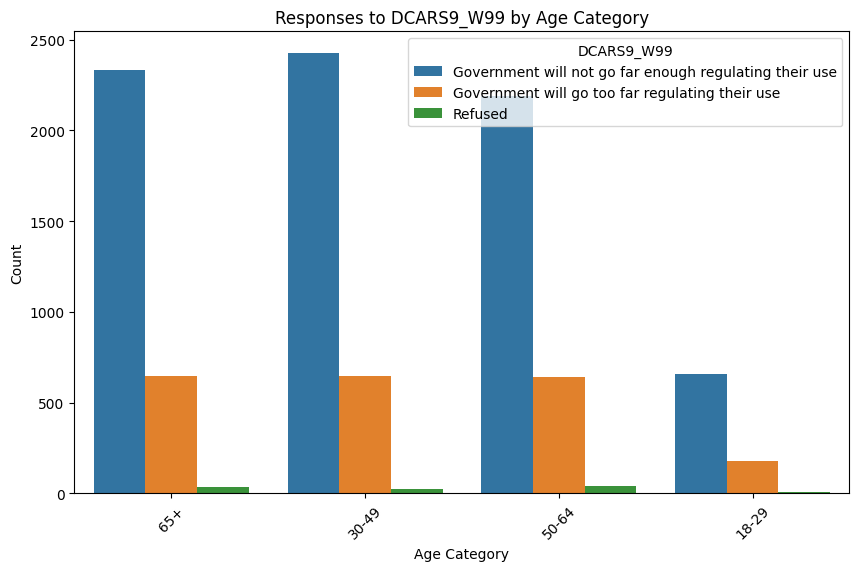

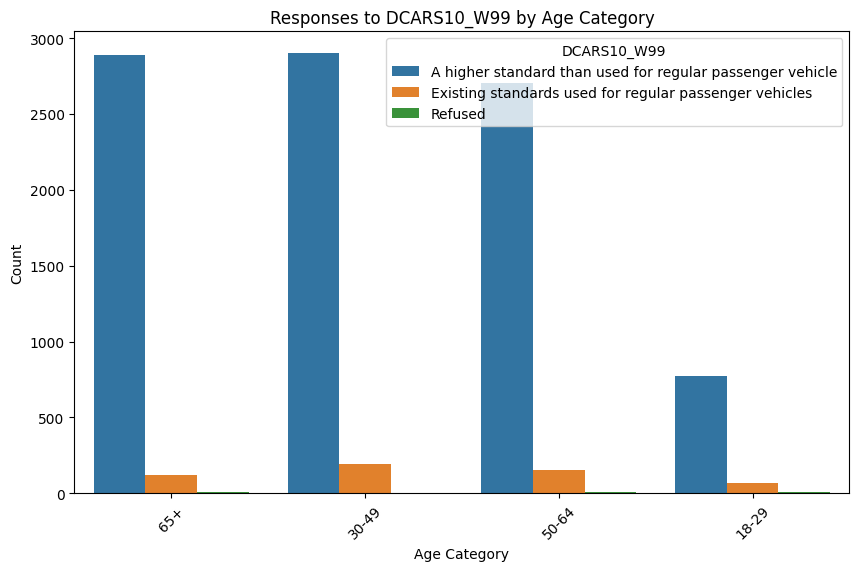

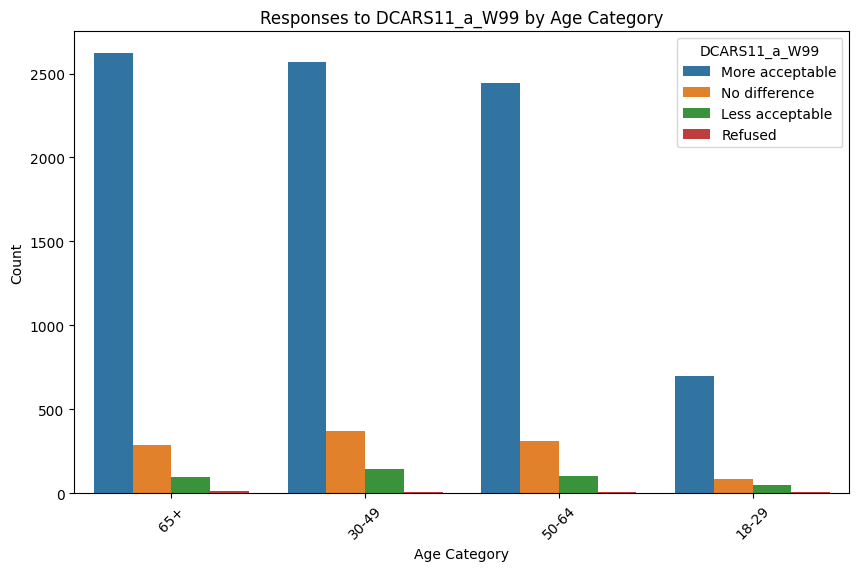

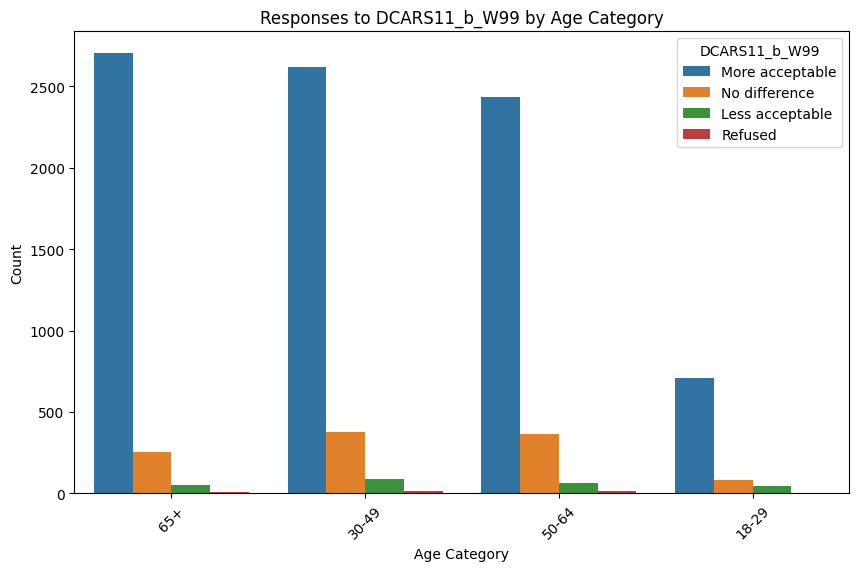

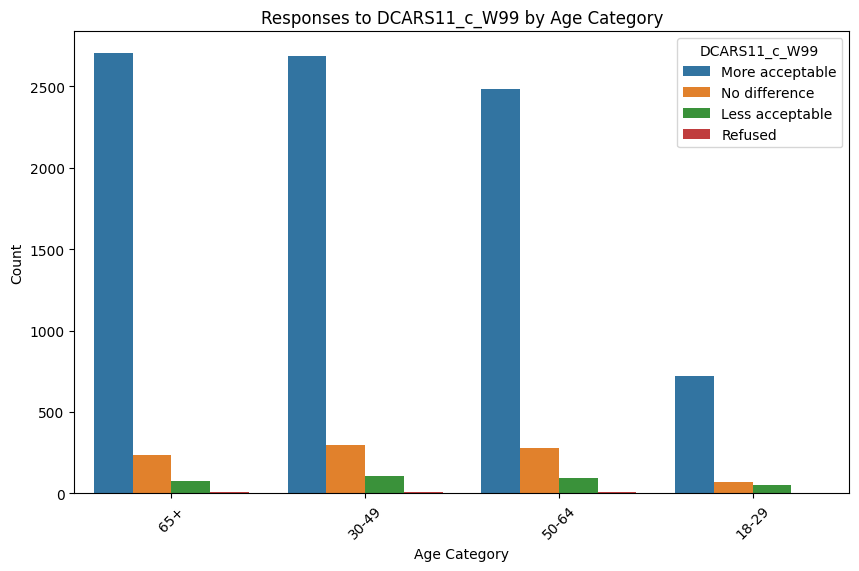

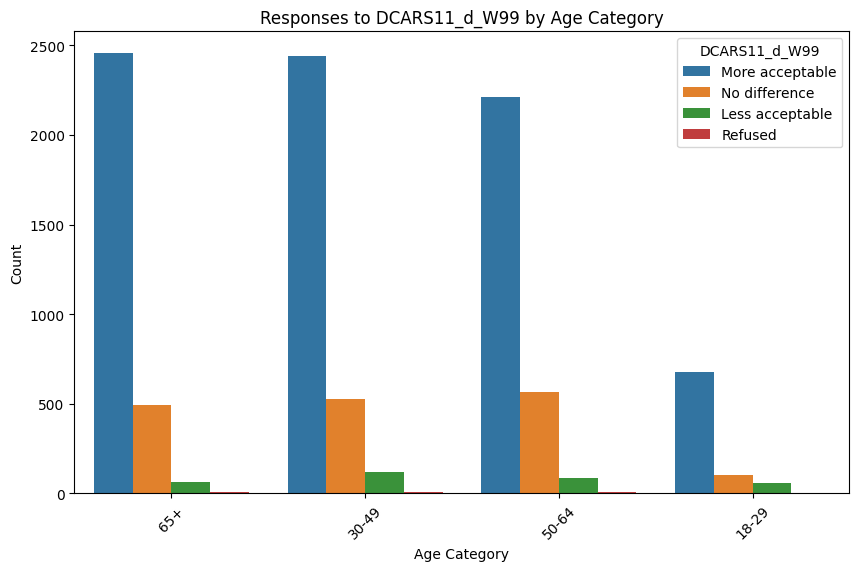

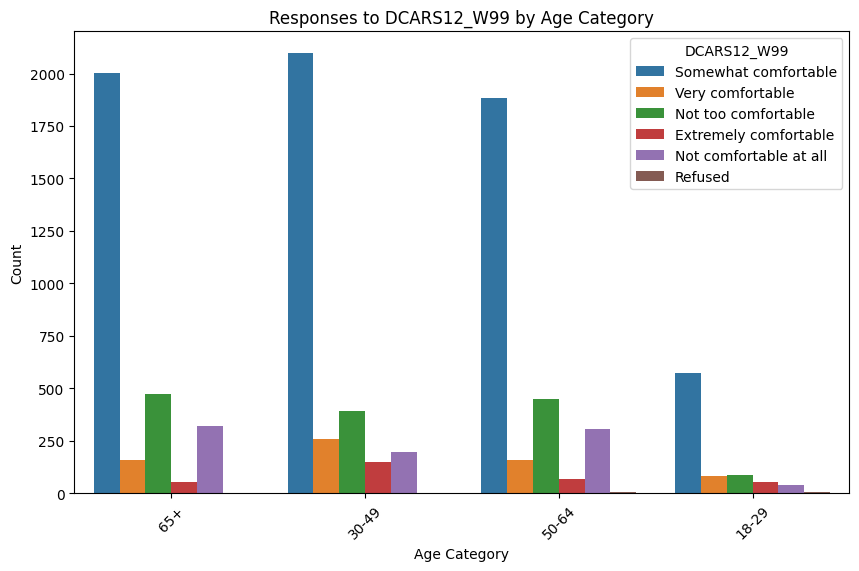

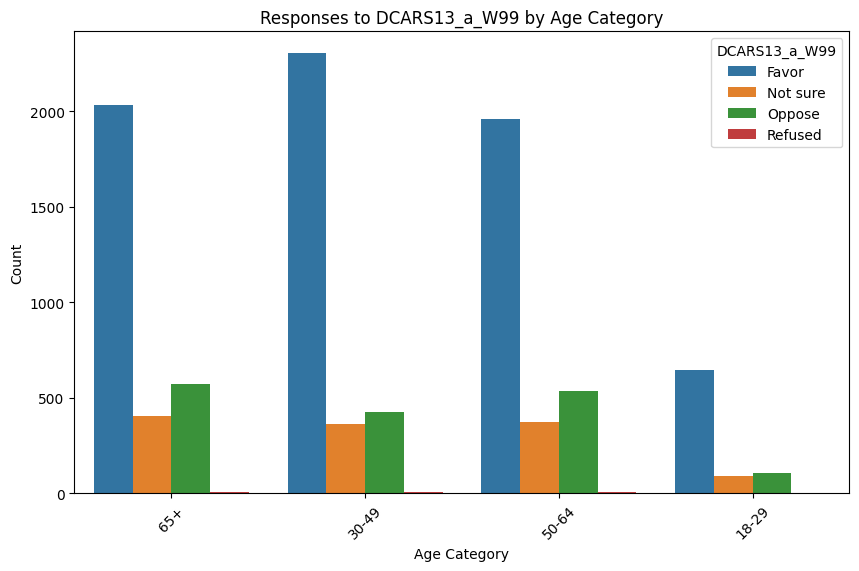

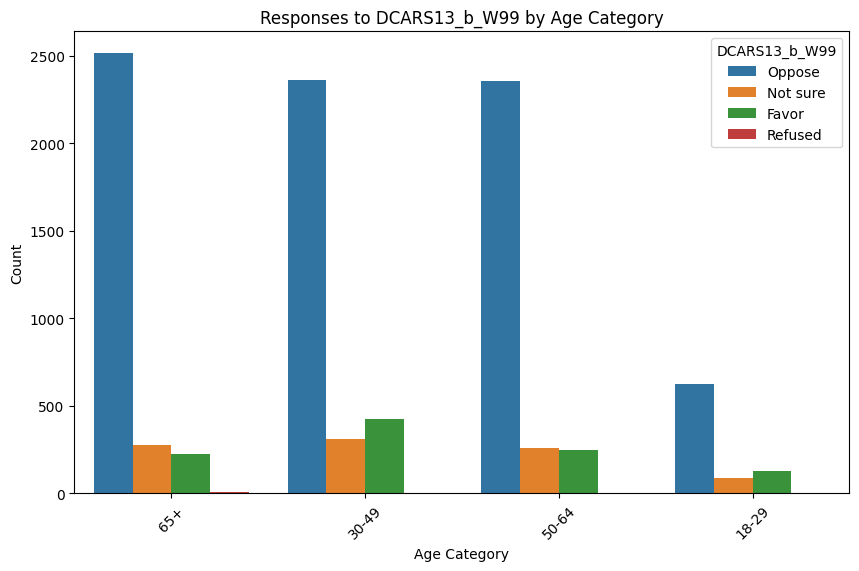

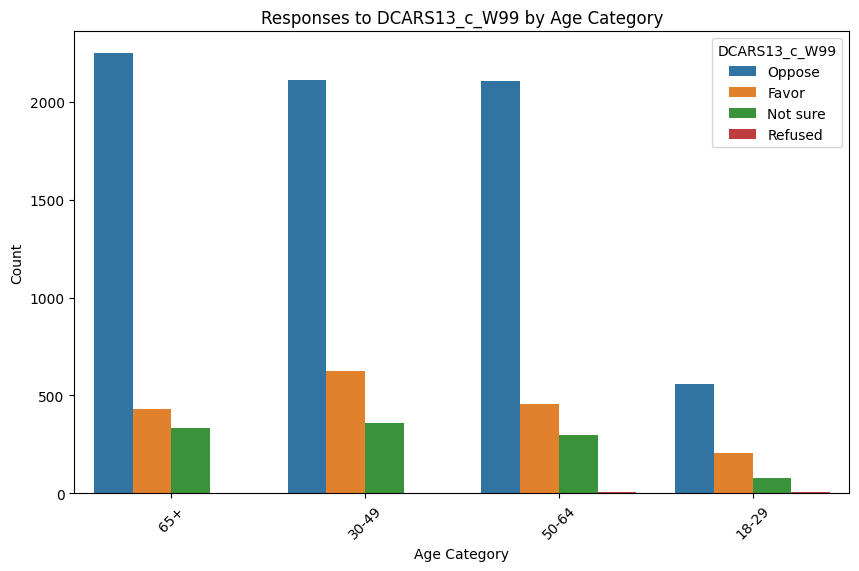

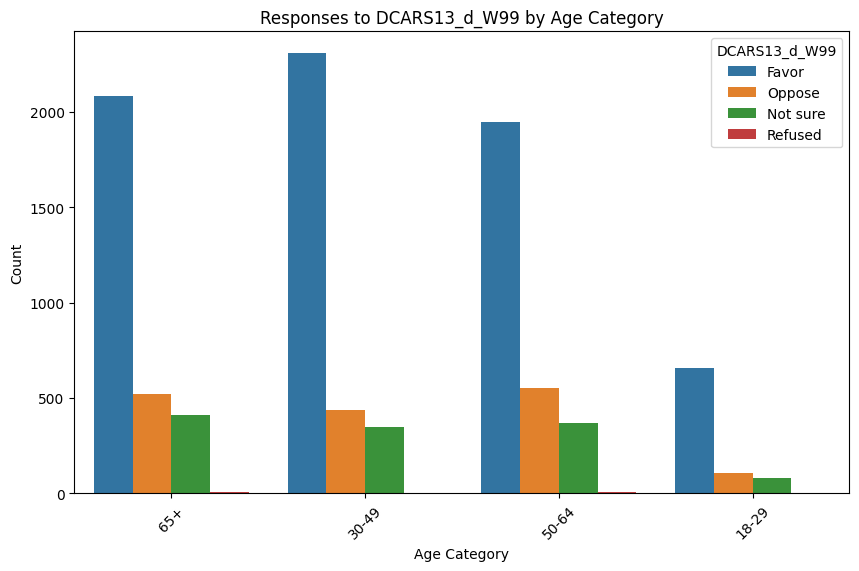

In [50]:
for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_filtered, x='F_AGECAT', hue=col)
    plt.title(f'Responses to {col} by Age Category')
    plt.xlabel('Age Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


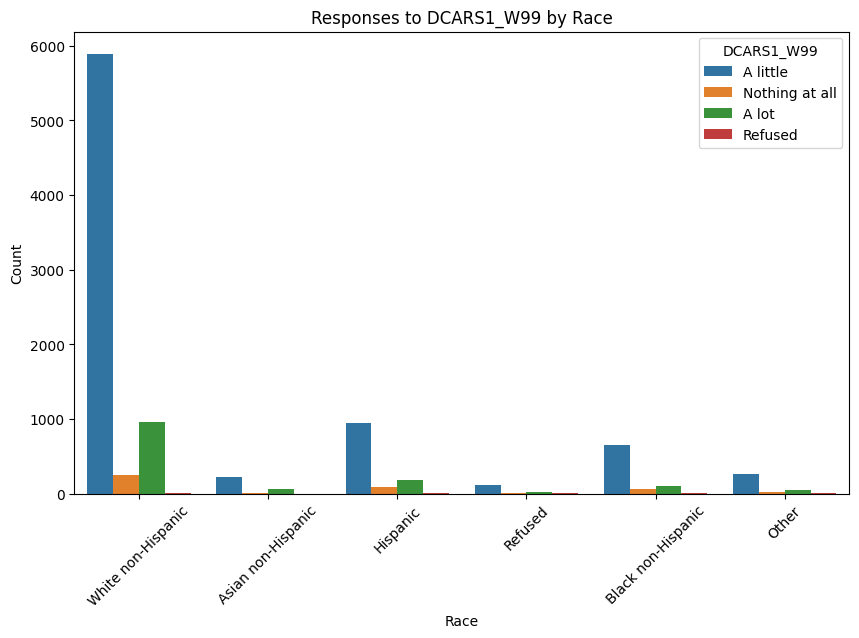

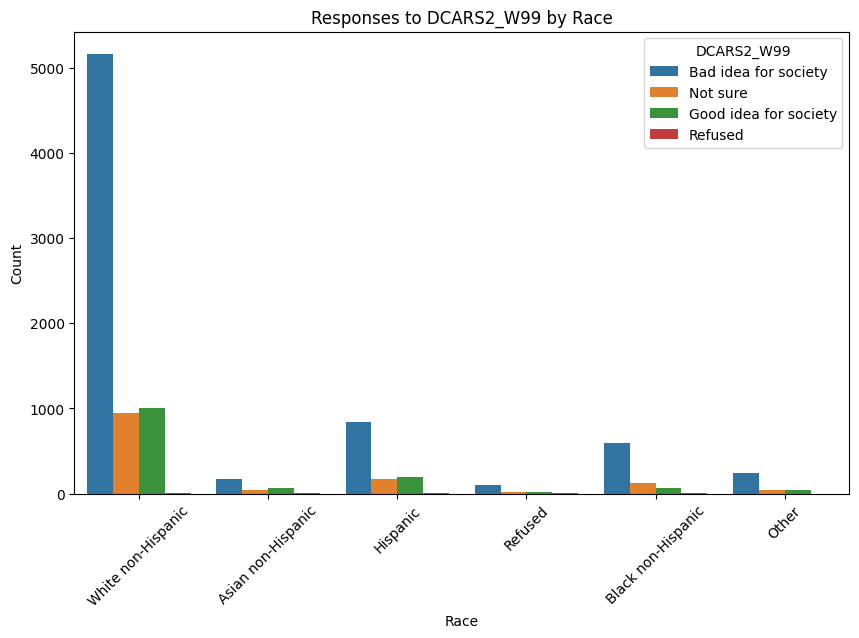

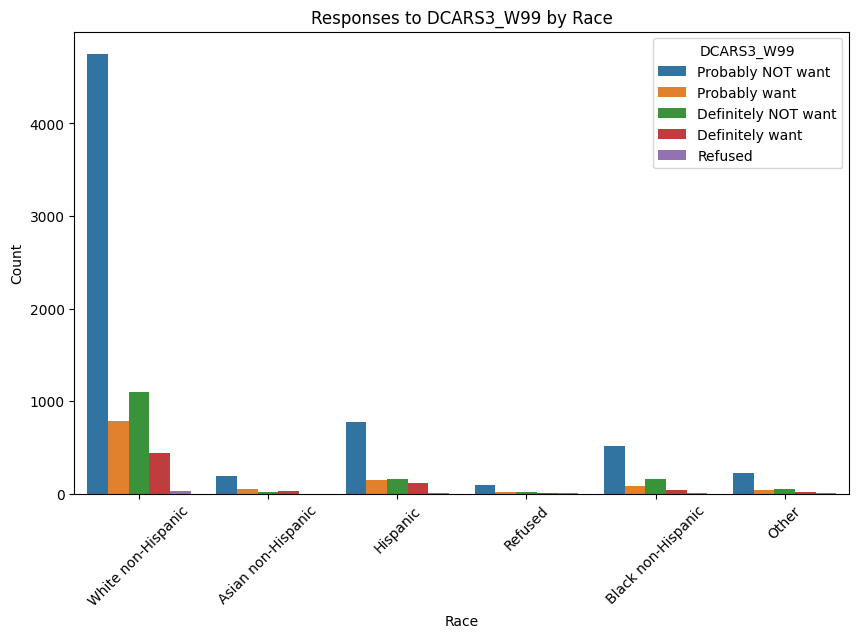

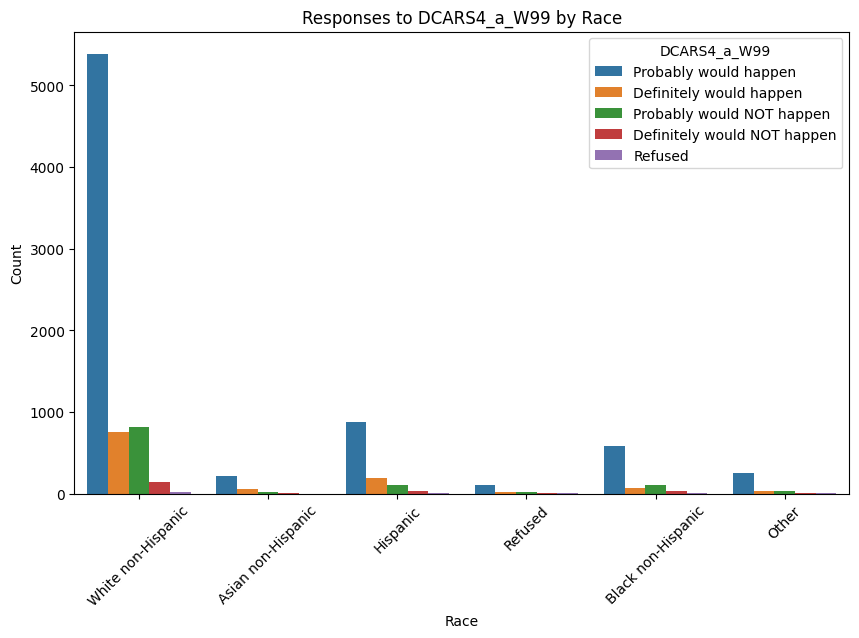

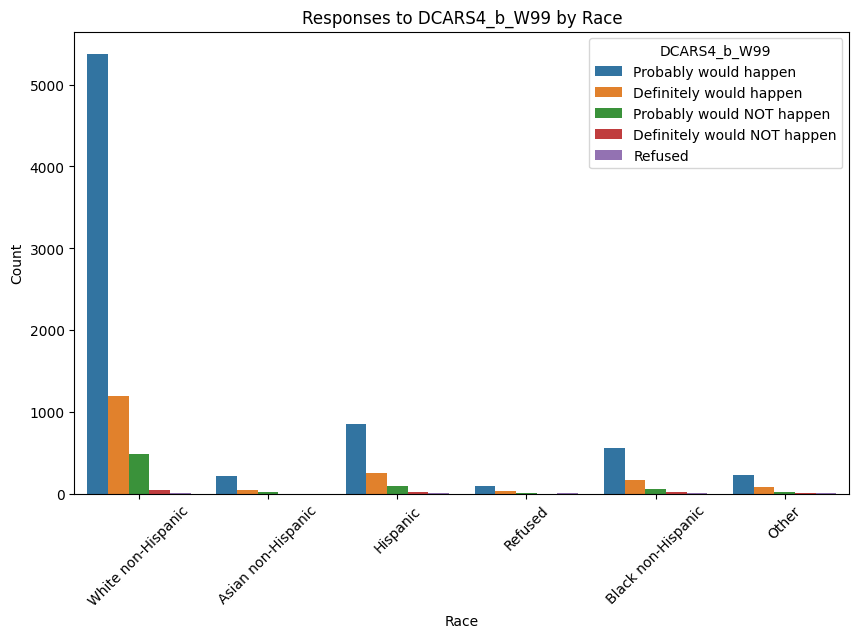

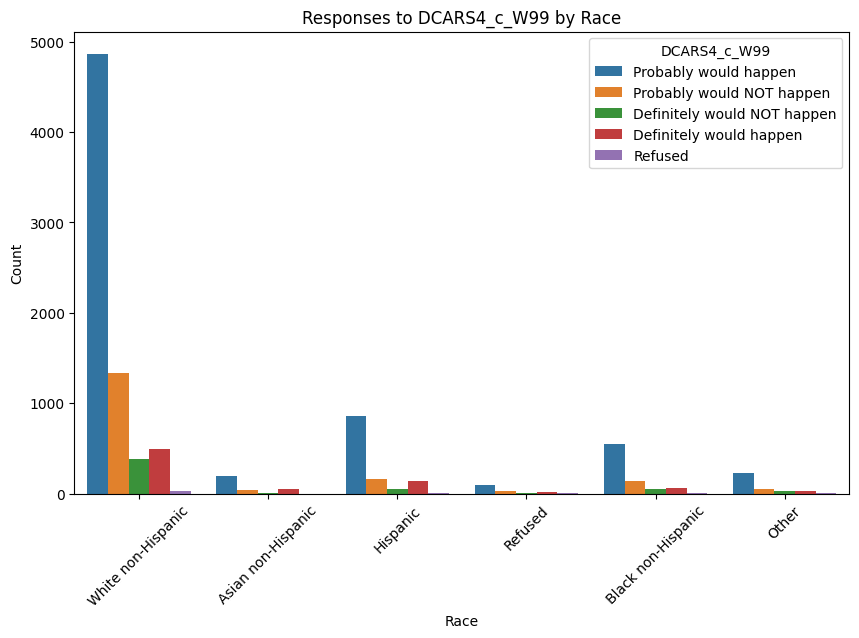

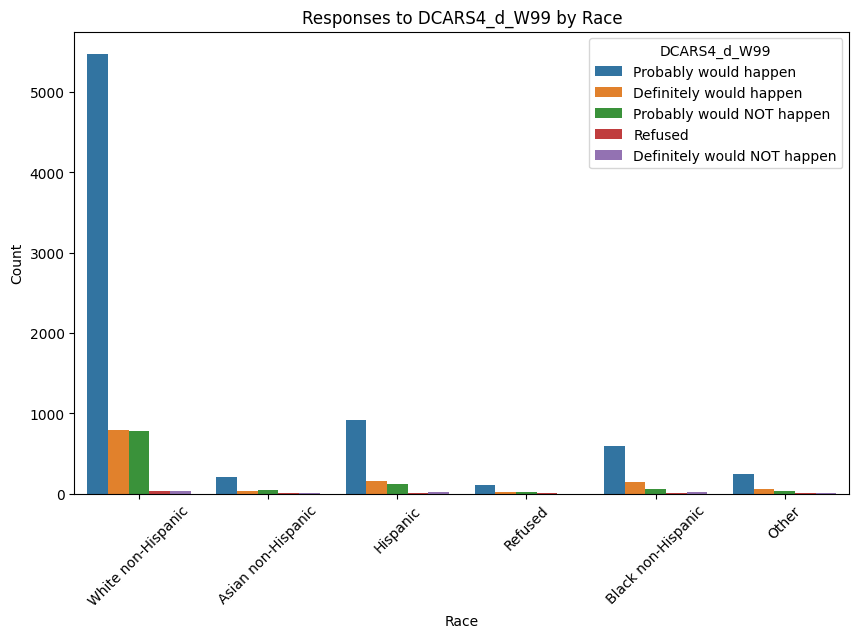

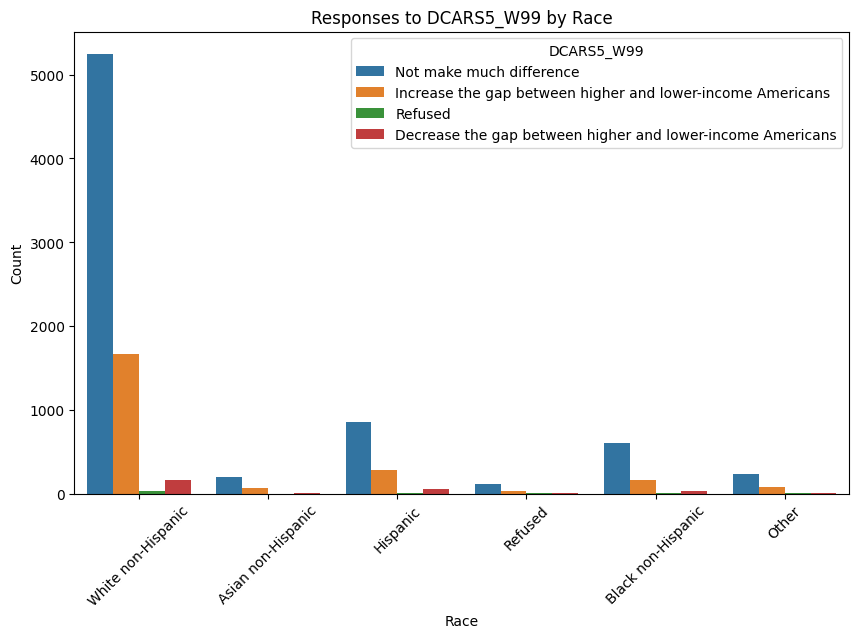

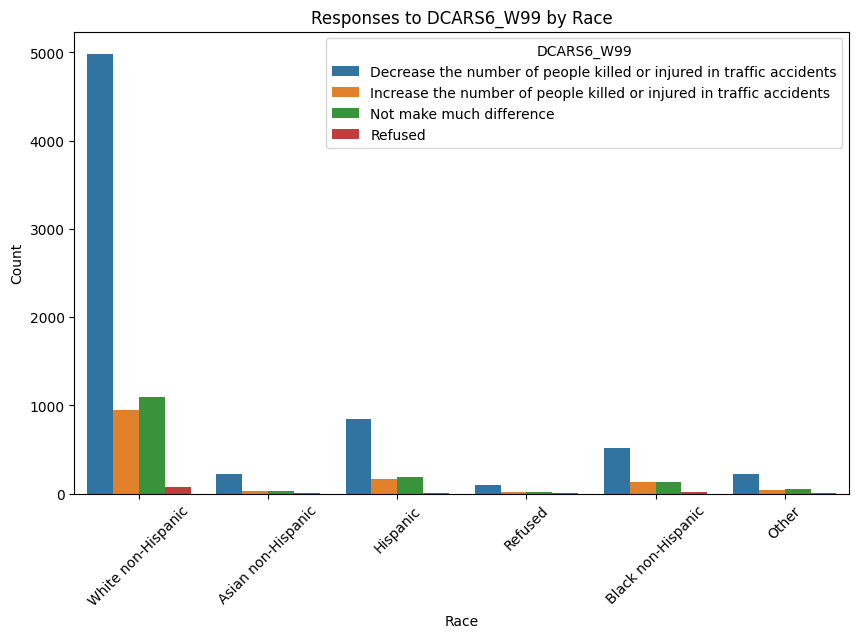

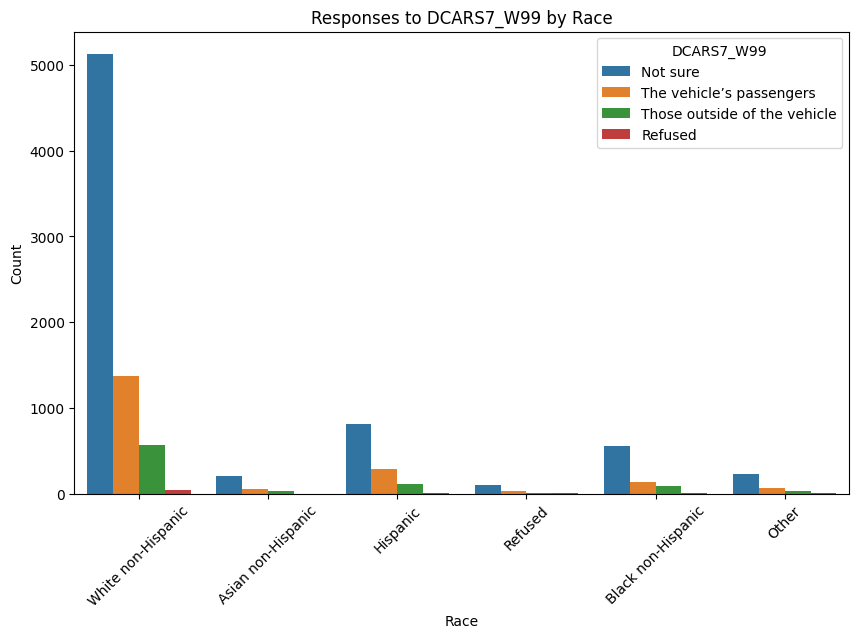

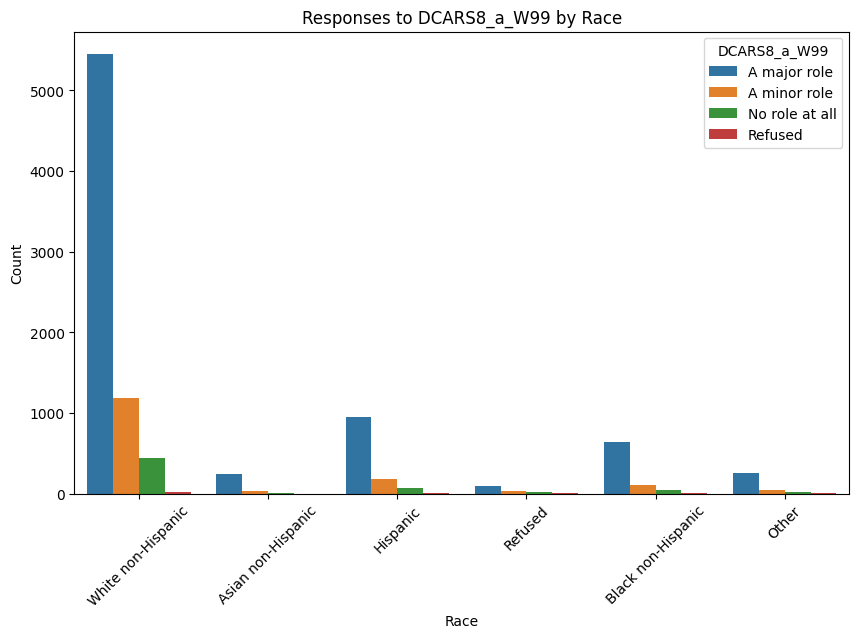

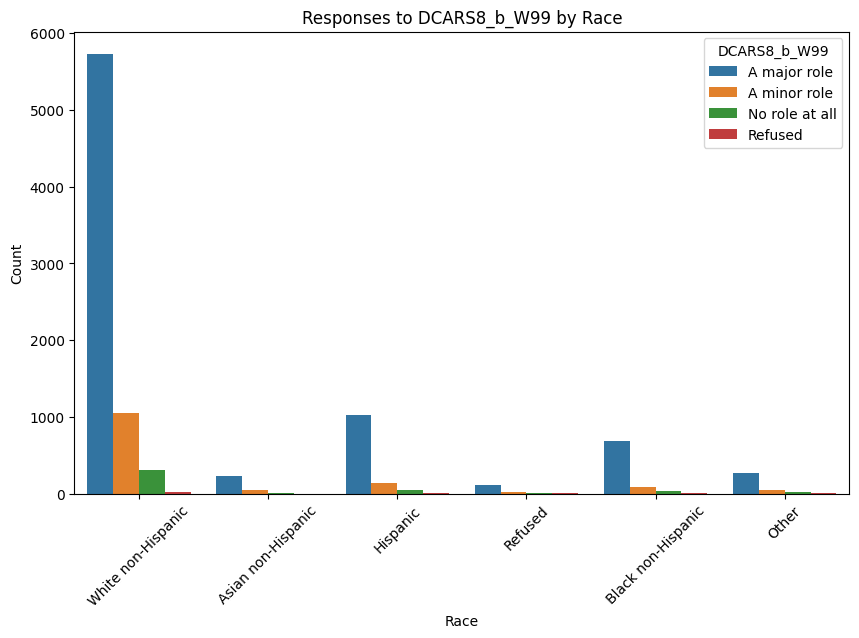

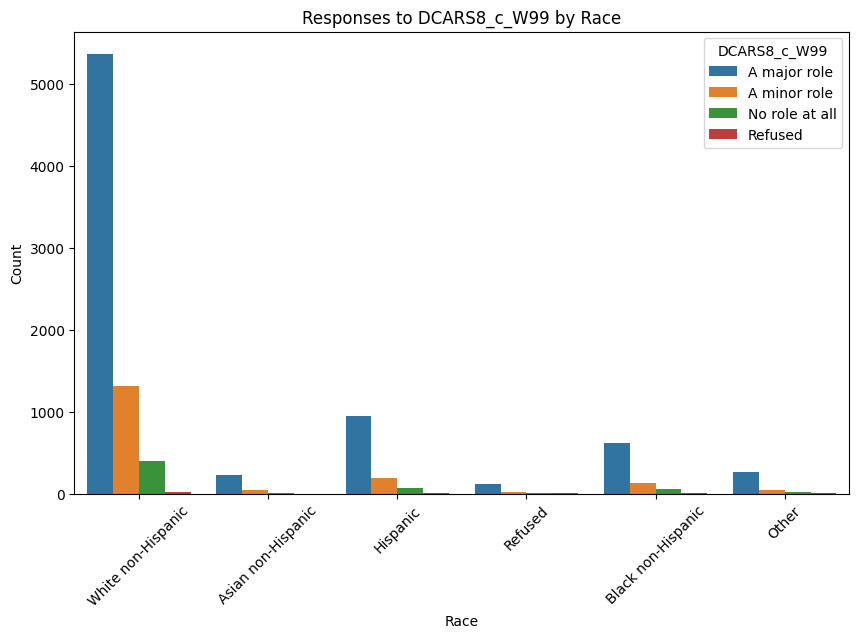

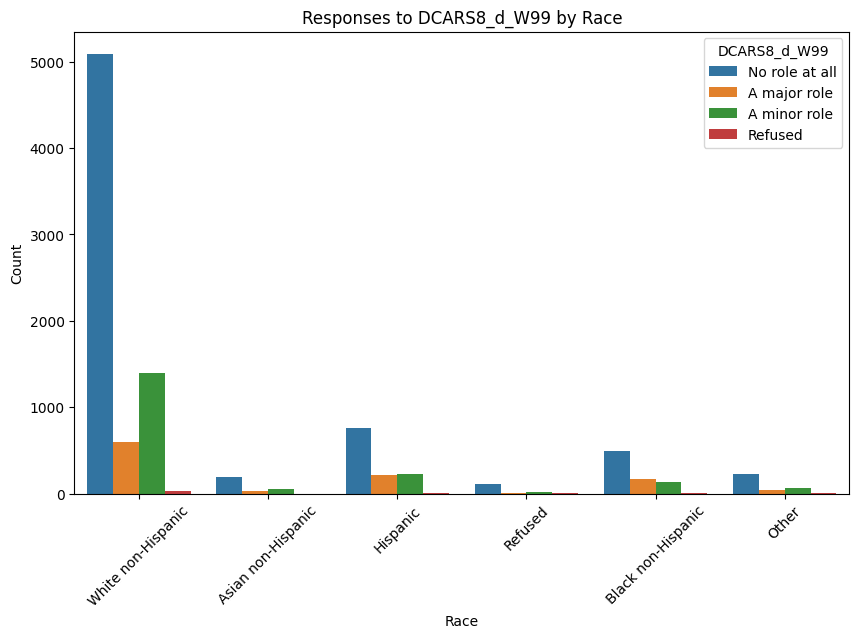

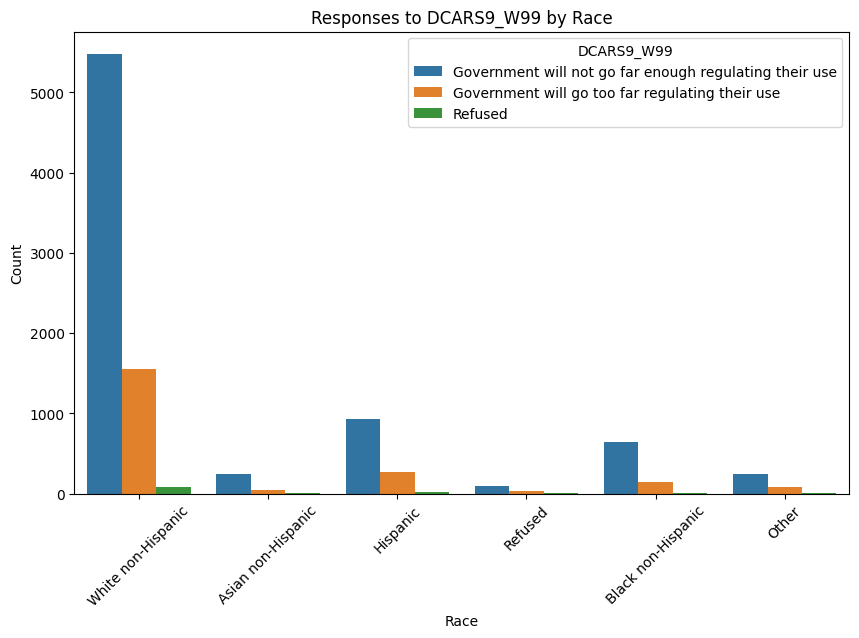

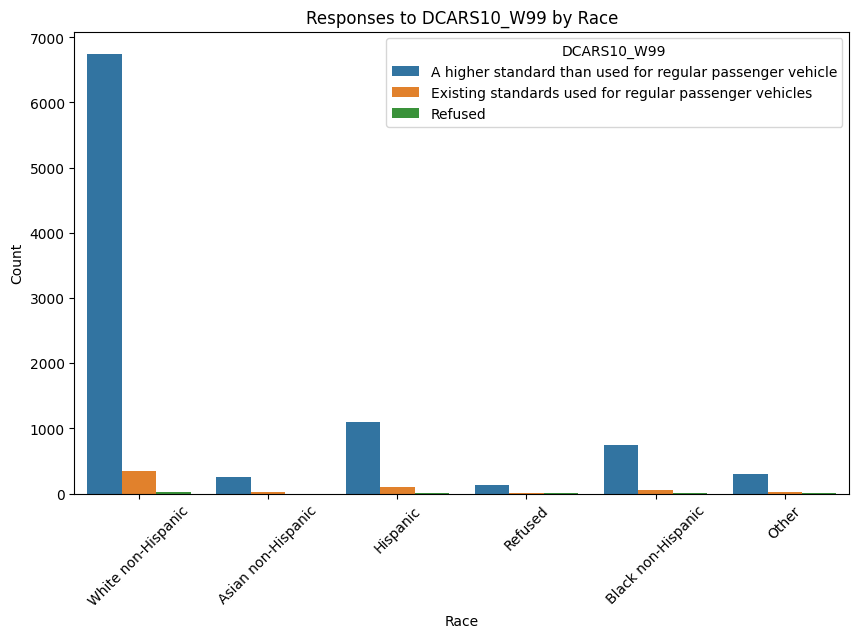

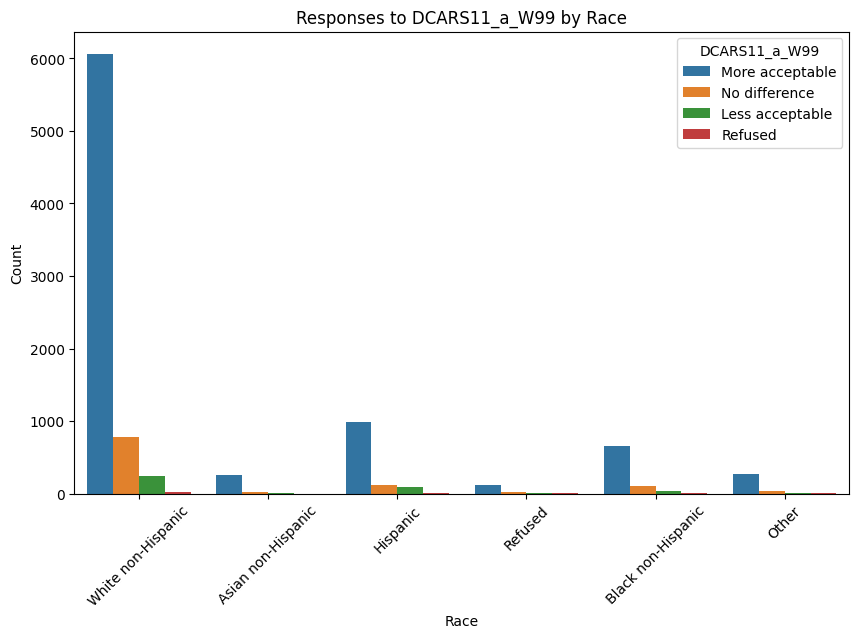

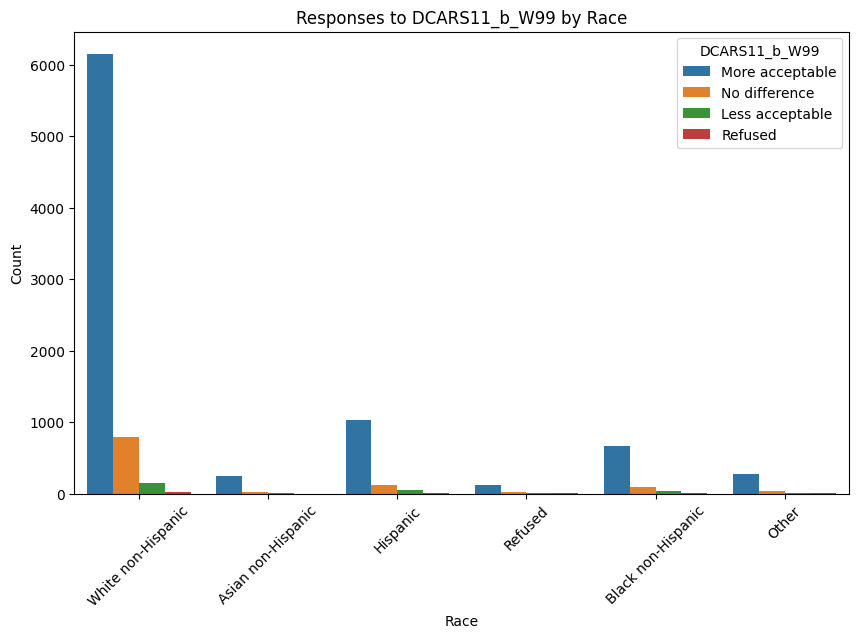

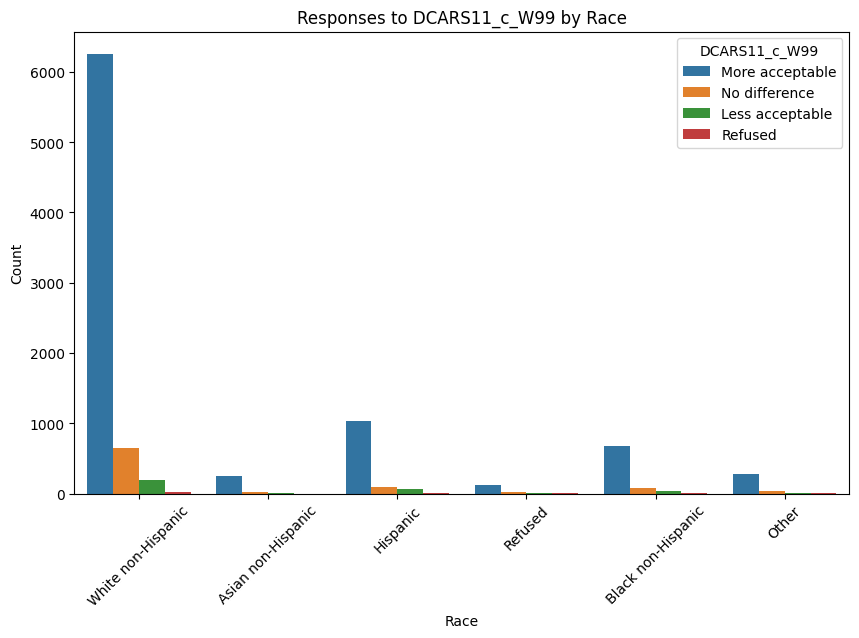

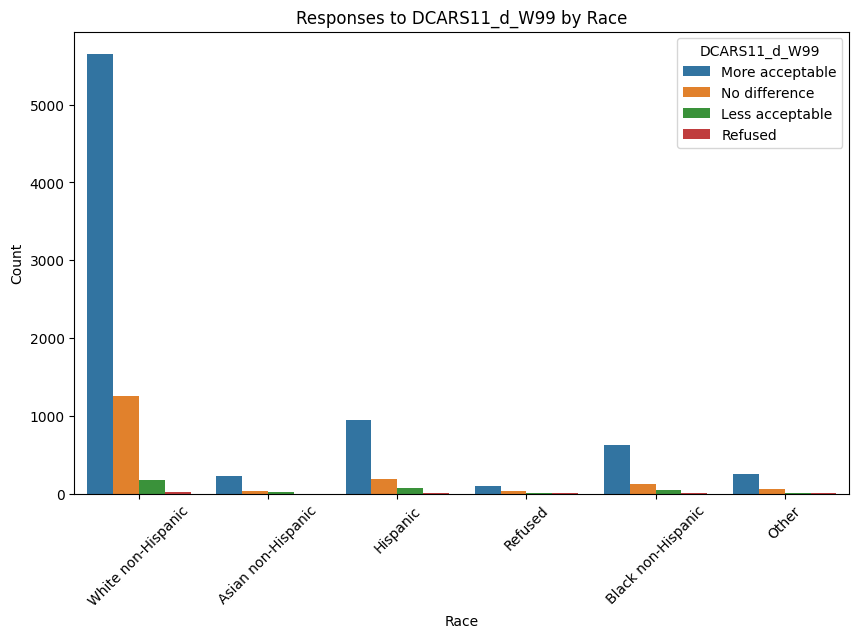

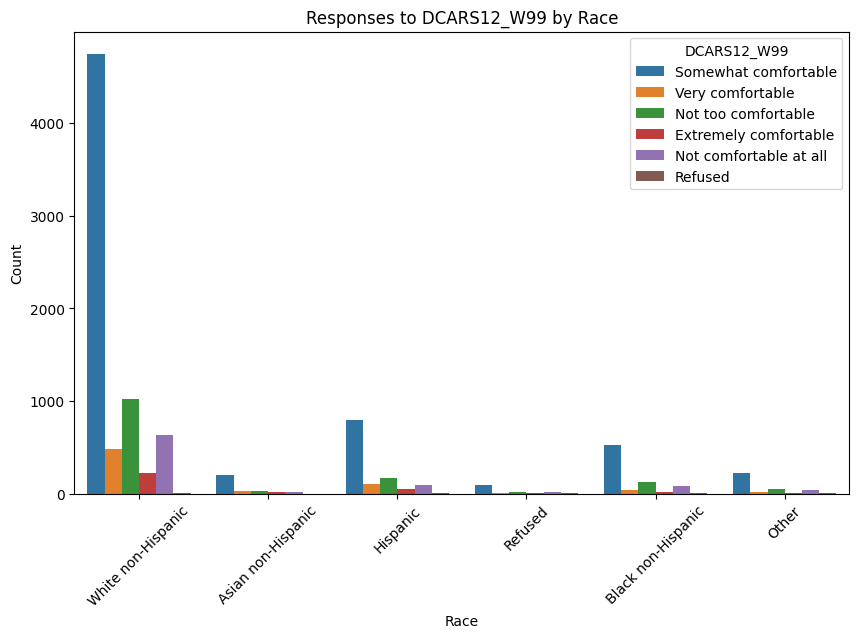

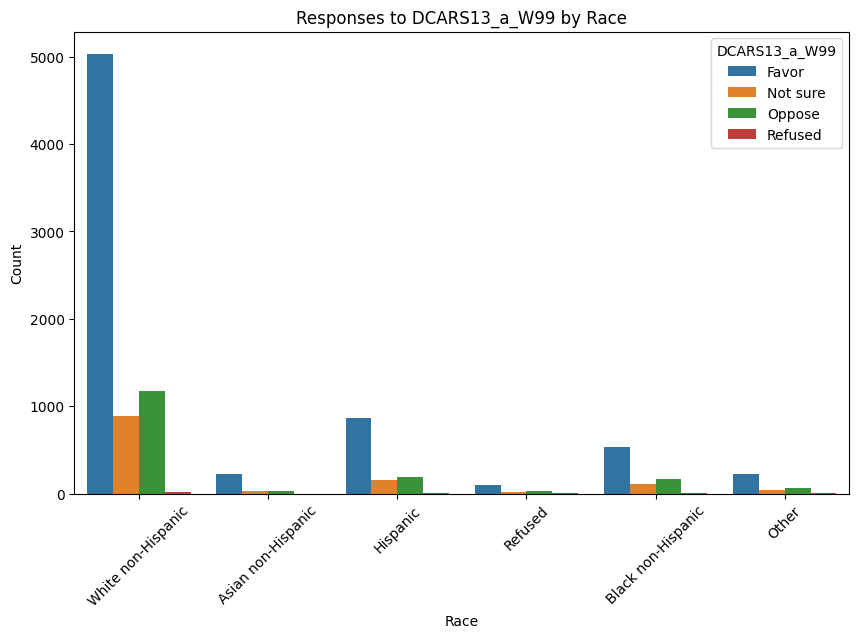

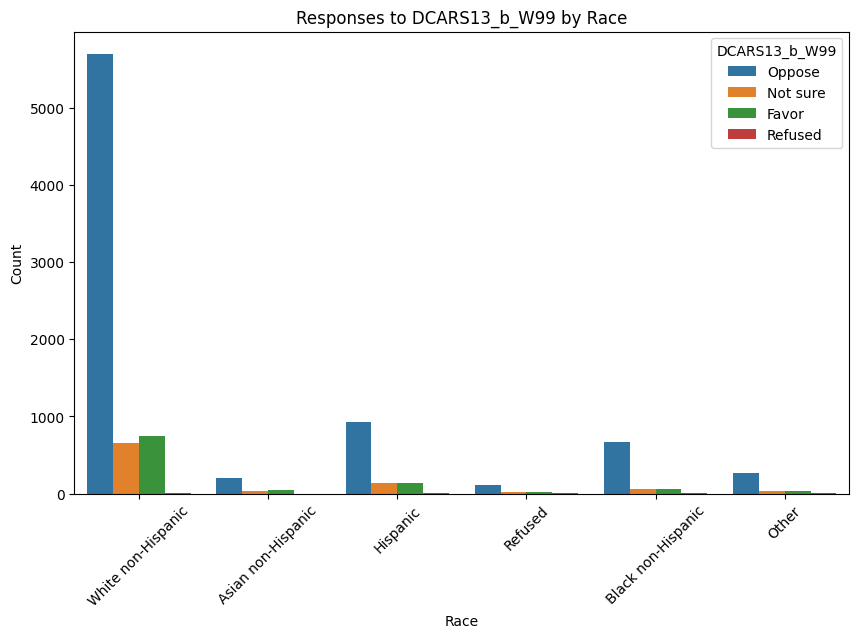

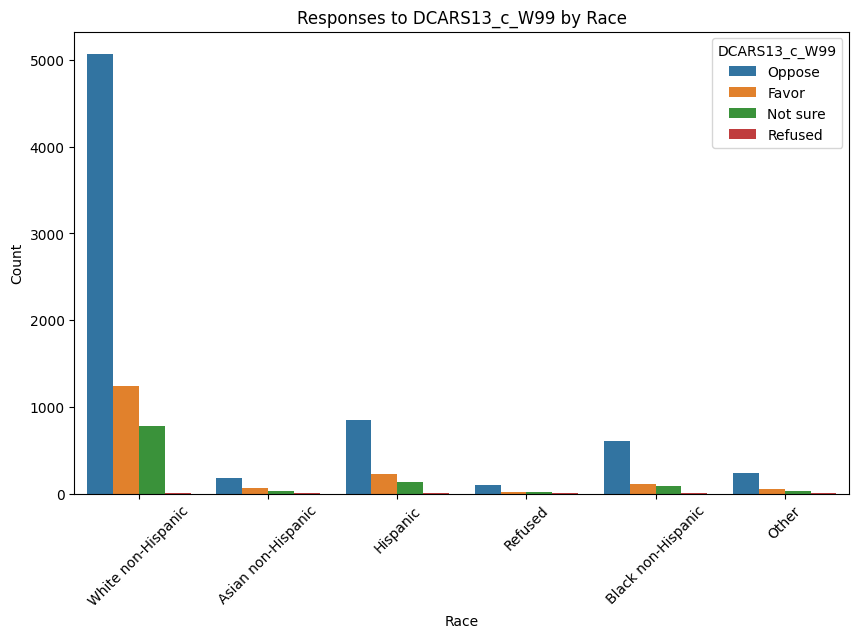

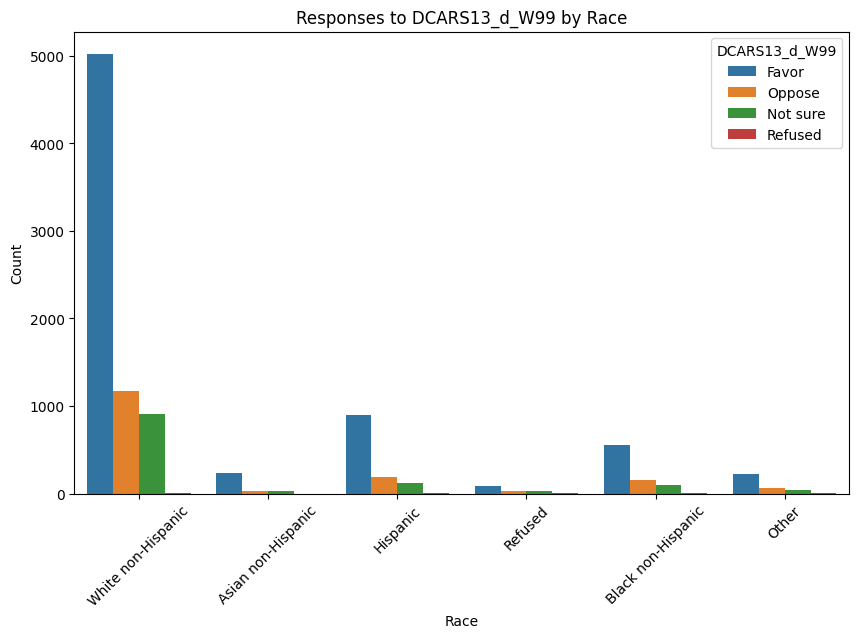

In [36]:

# List of columns to categorize
dcars_columns = [col for col in df_dropped.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_RACETHNMOD', hue=col)
    plt.title(f'Responses to {col} by Race')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


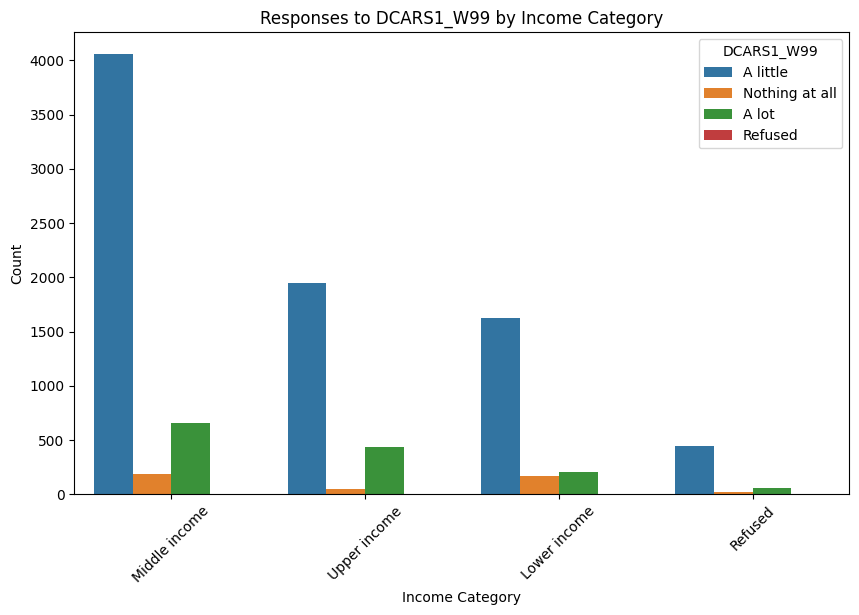

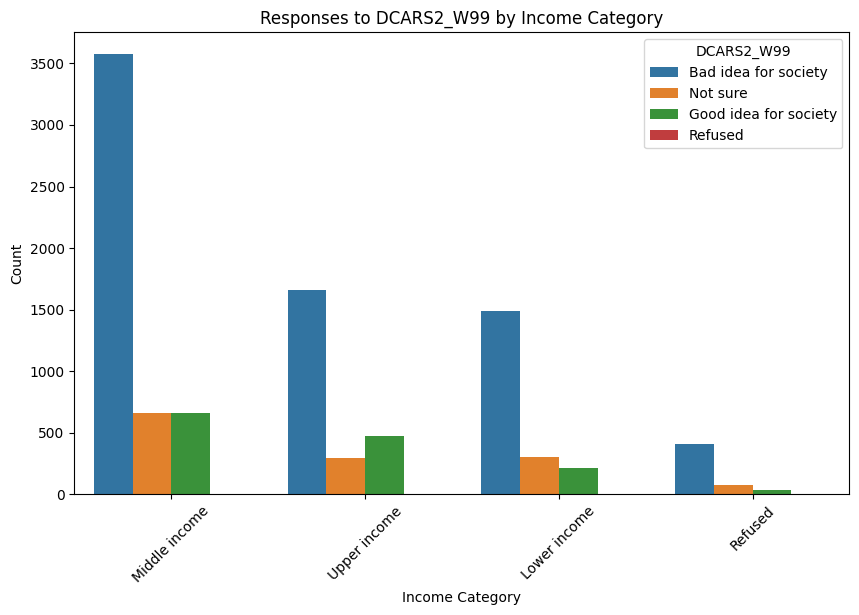

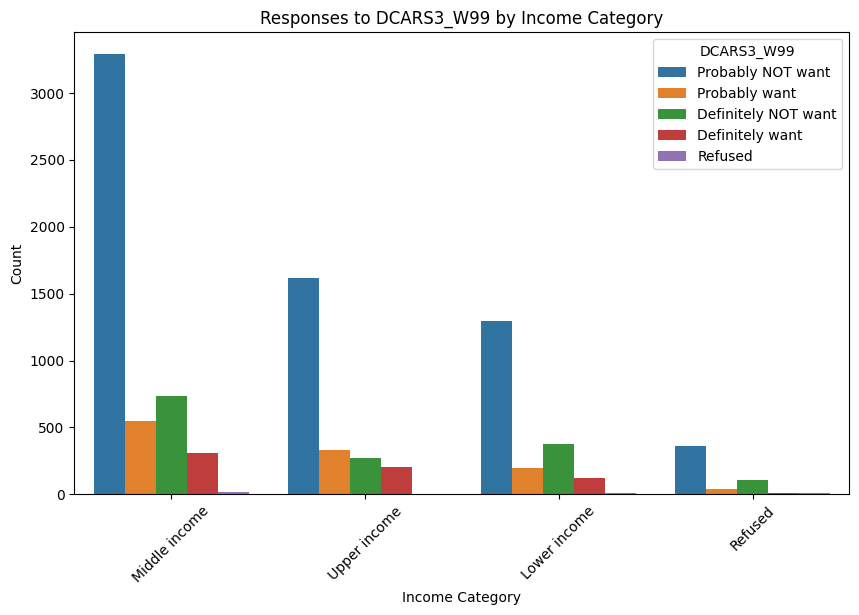

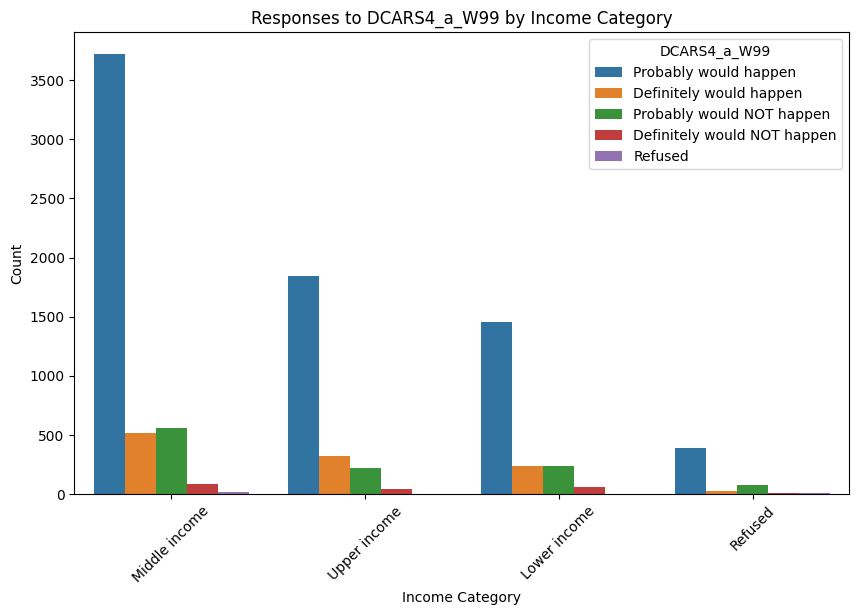

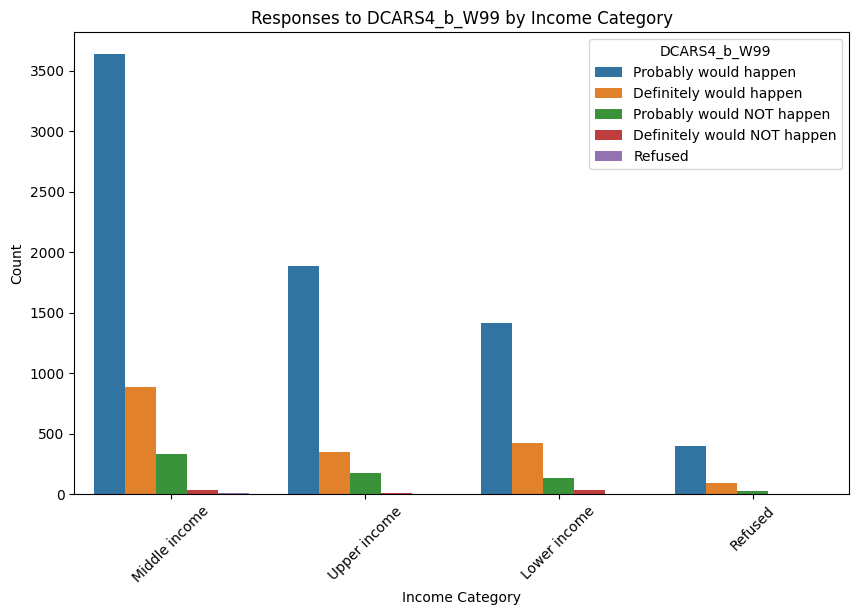

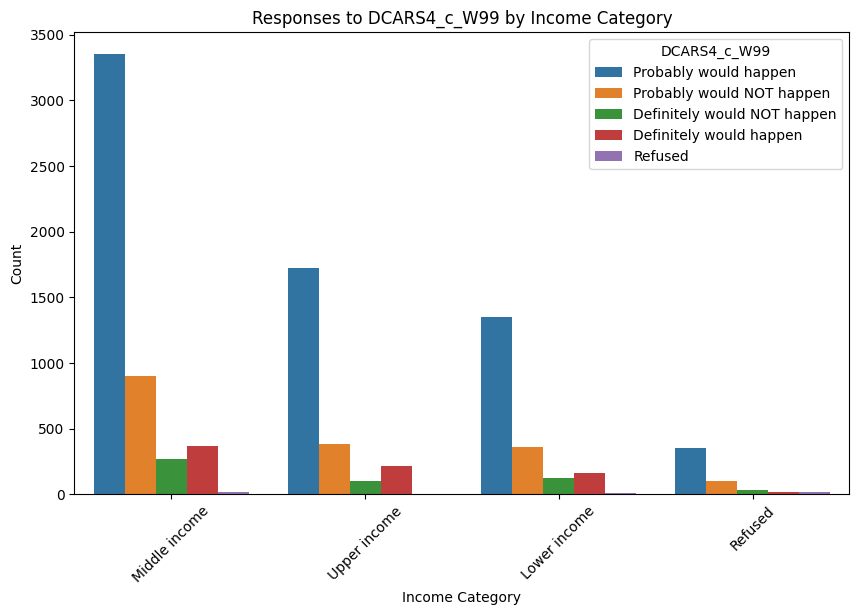

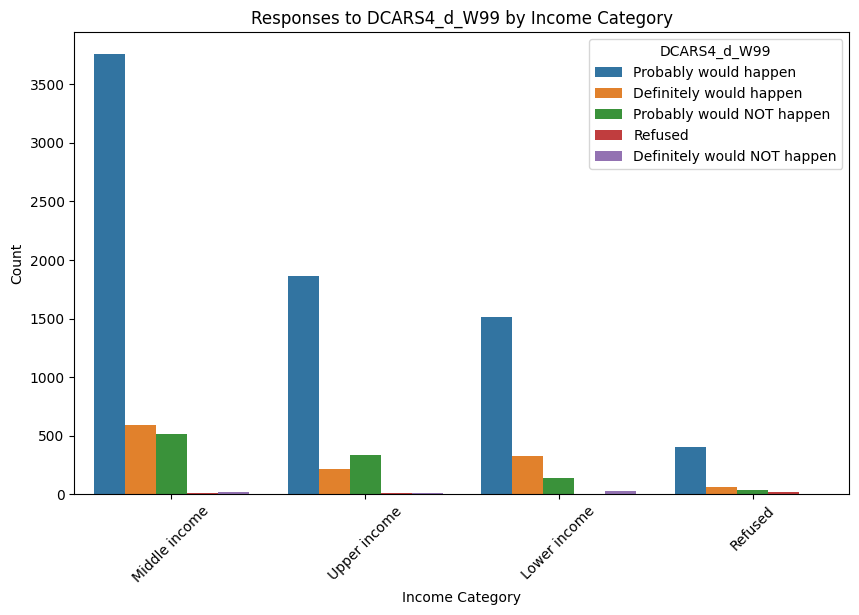

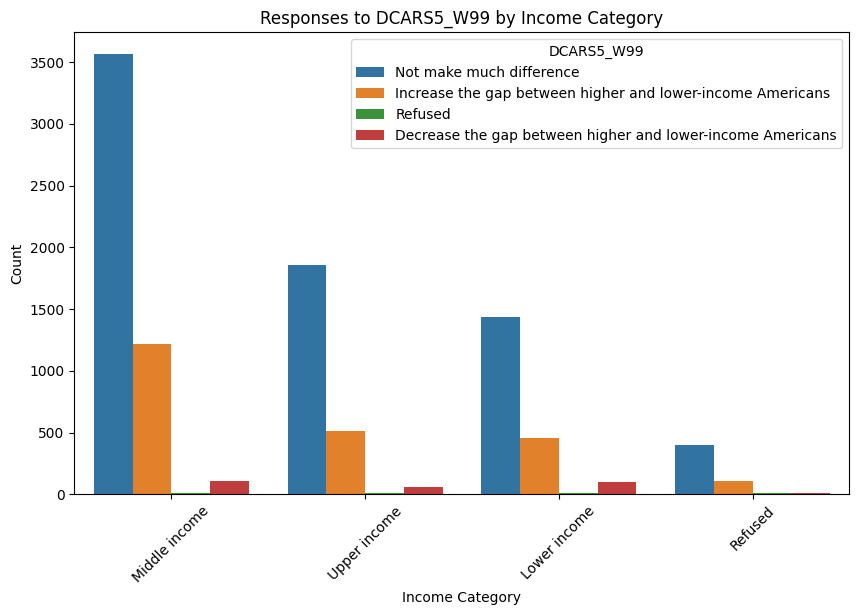

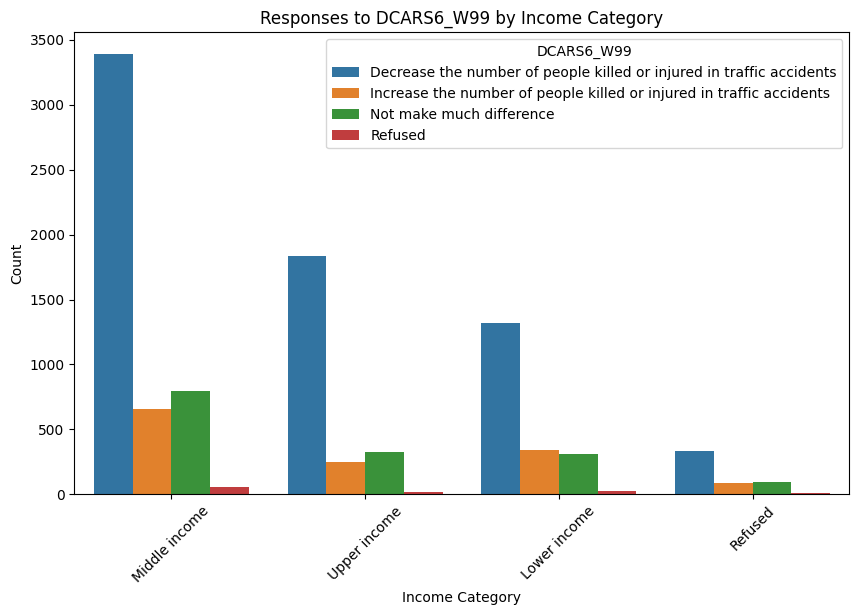

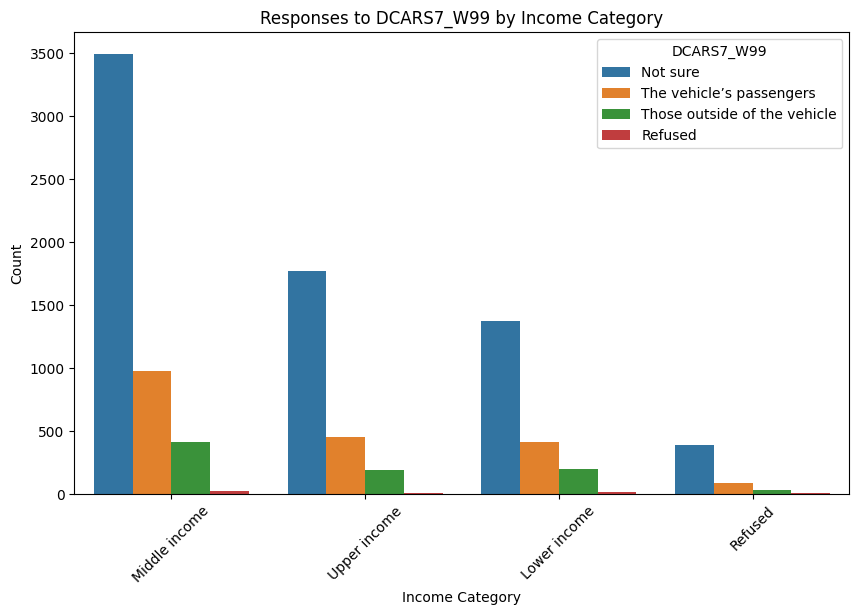

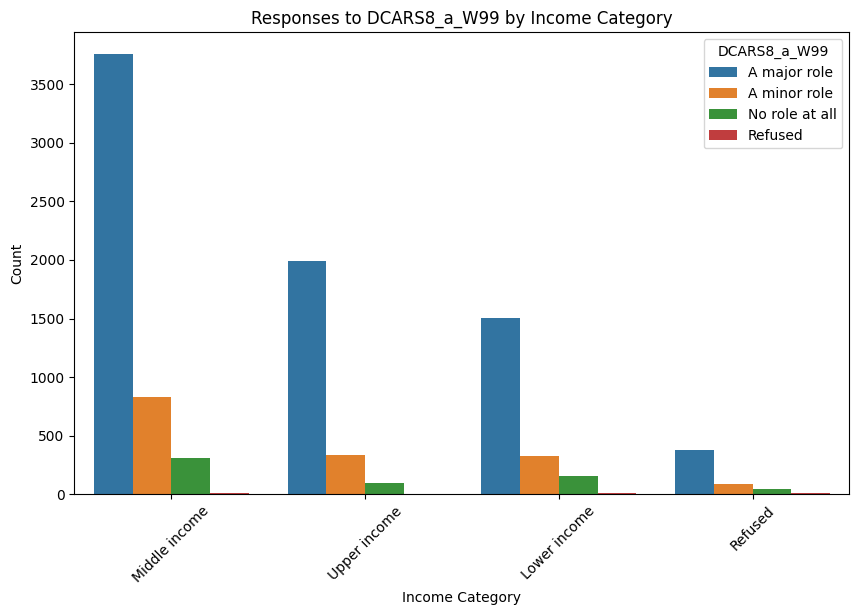

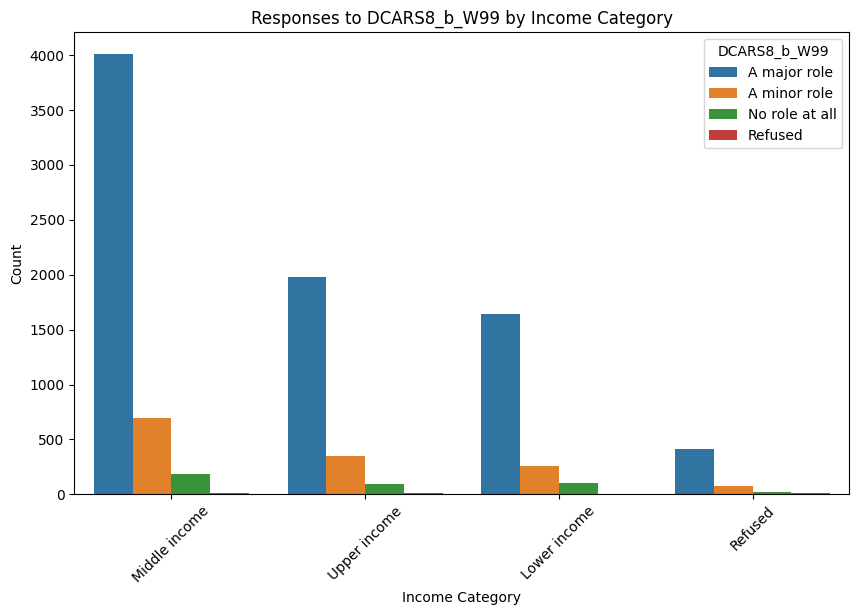

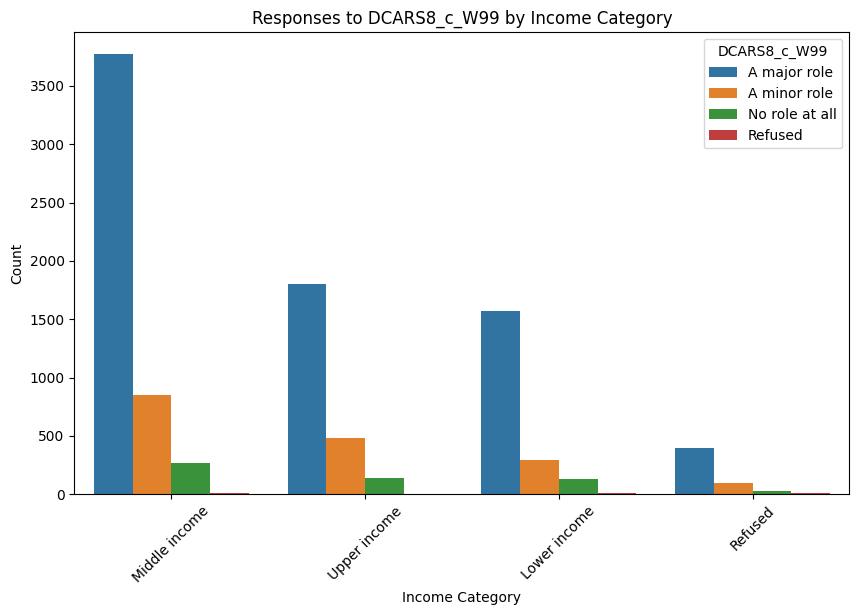

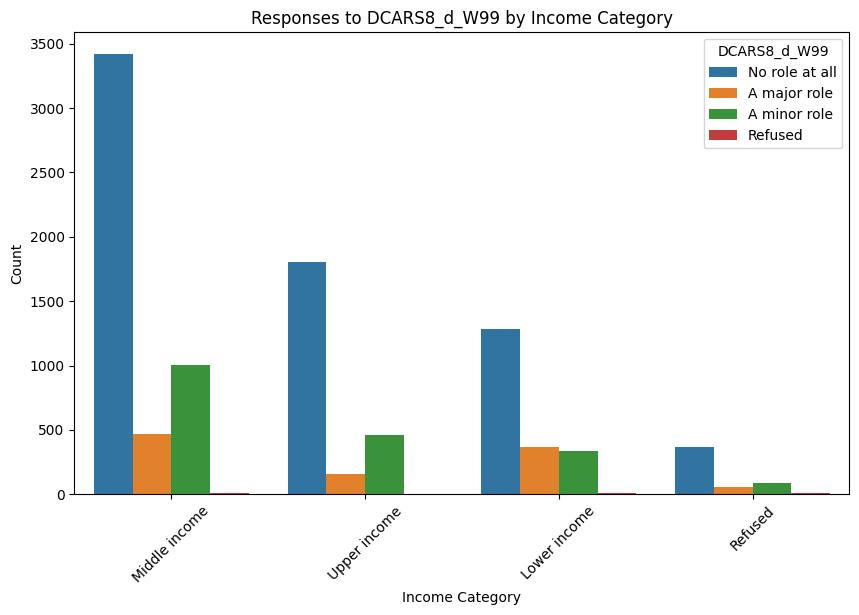

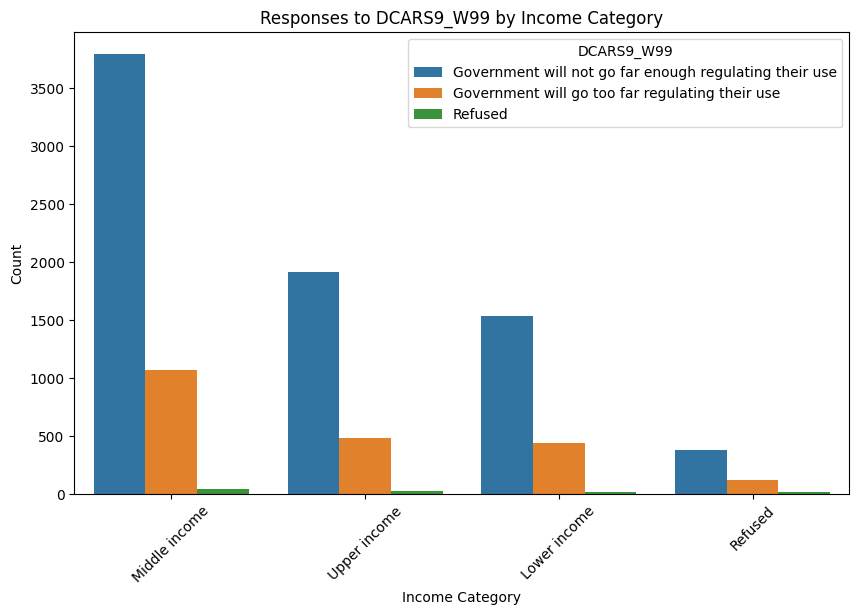

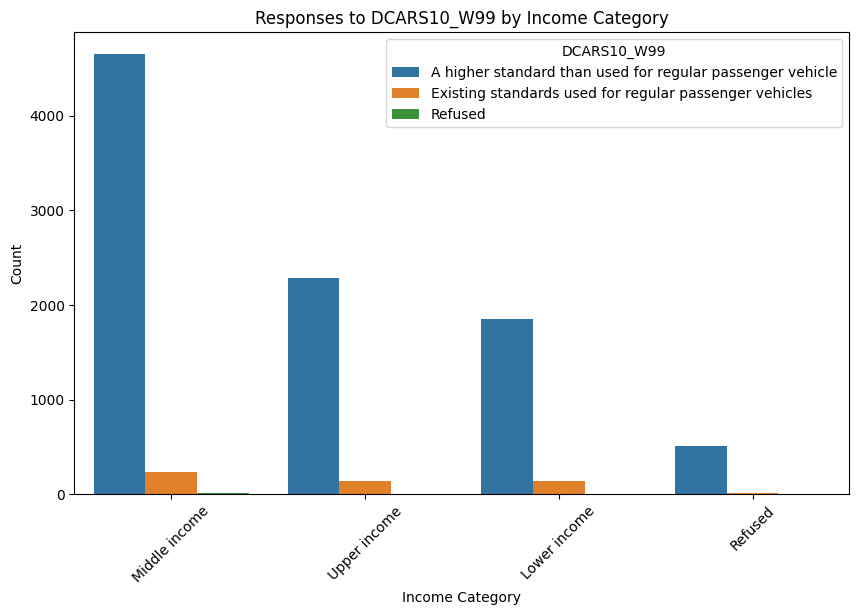

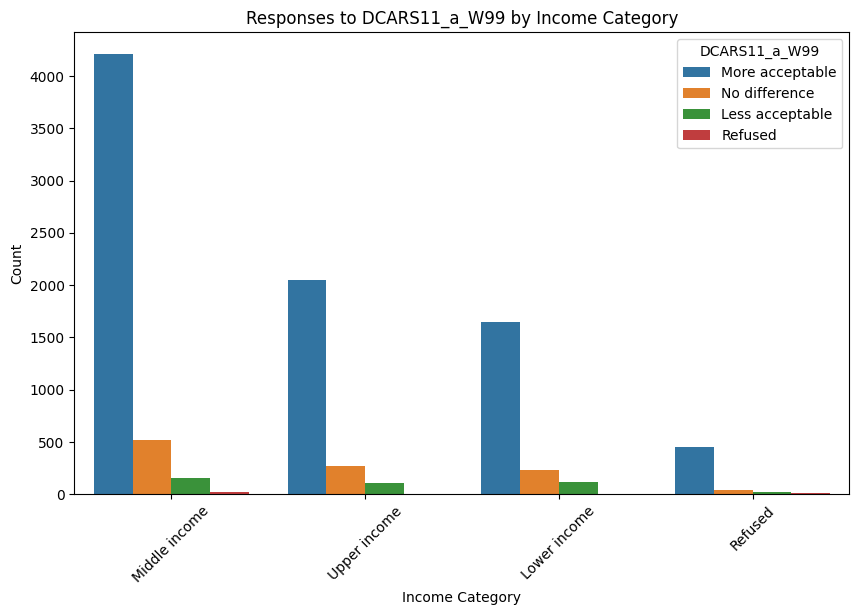

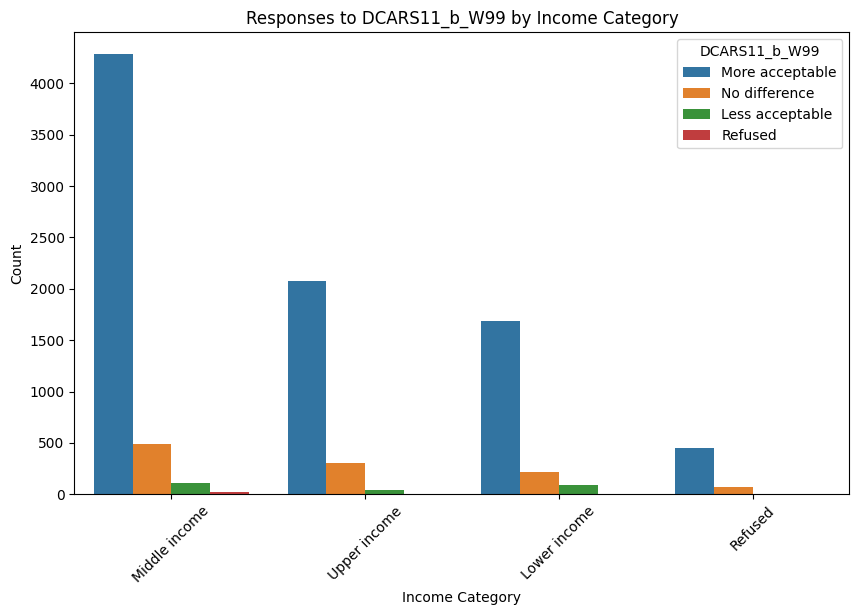

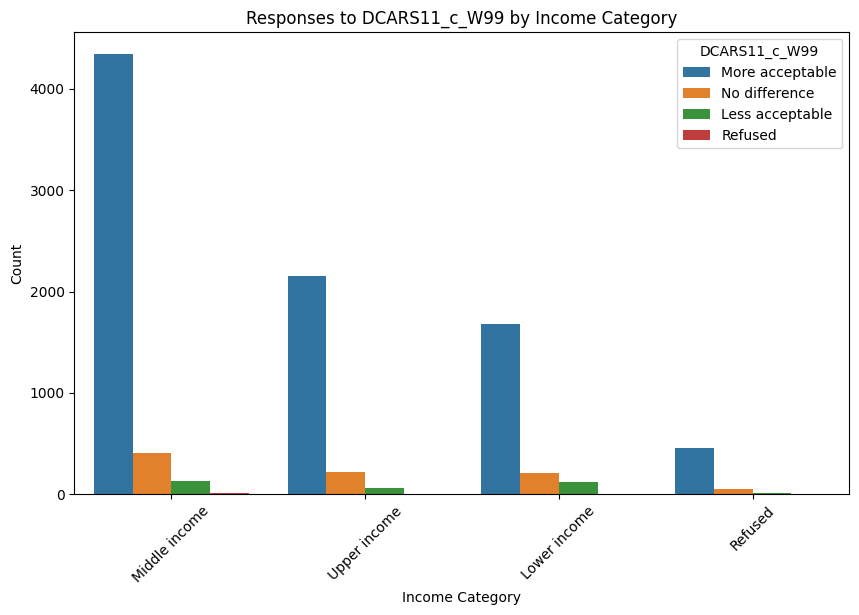

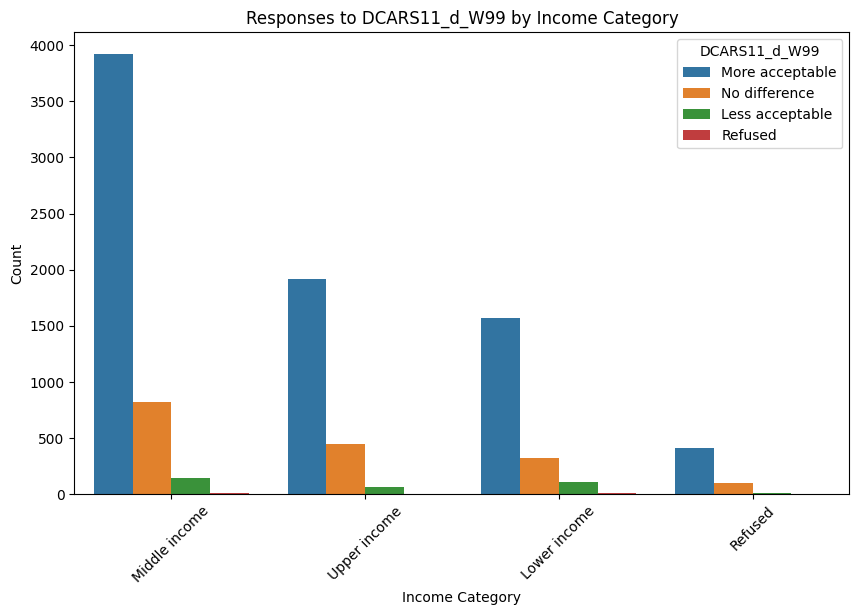

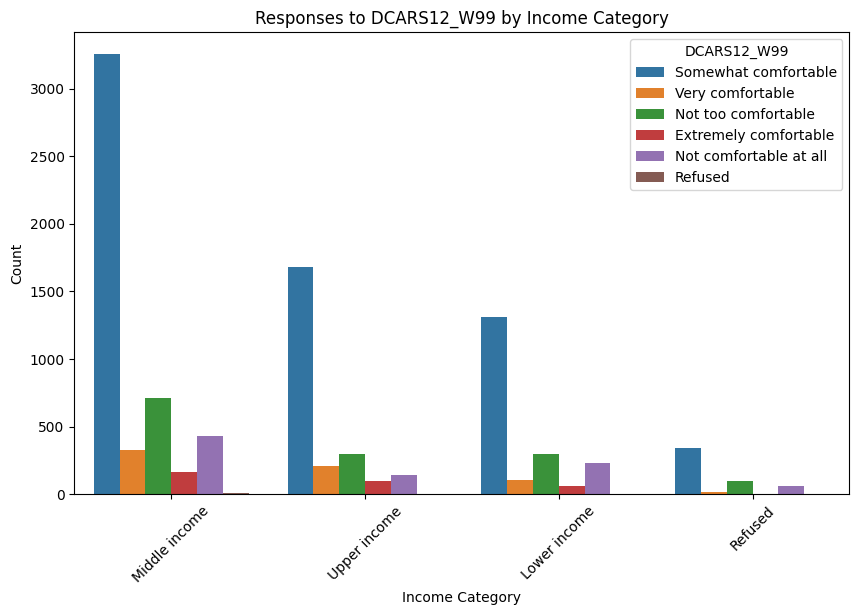

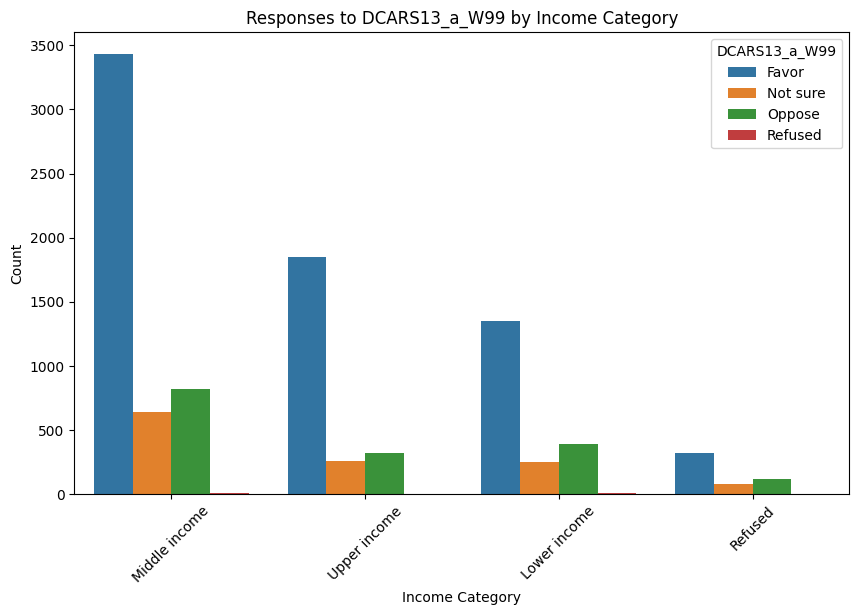

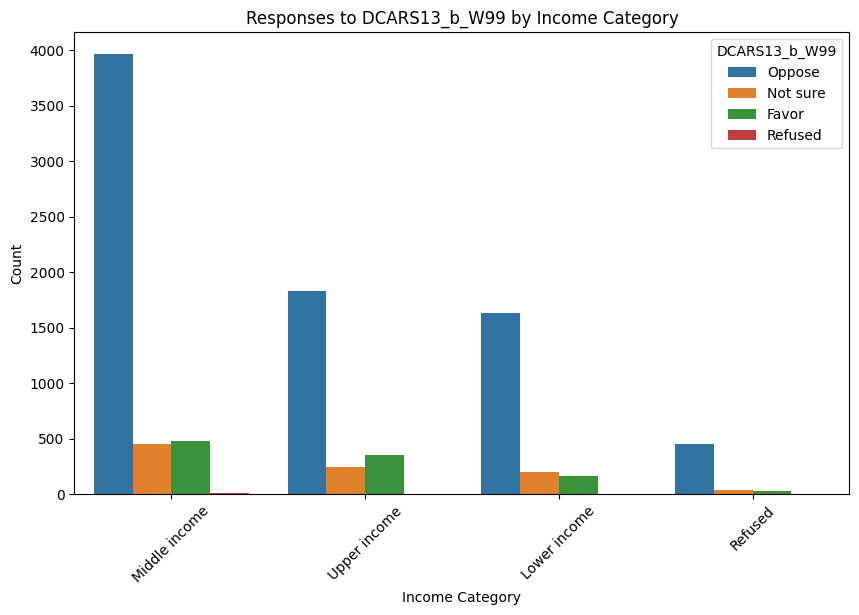

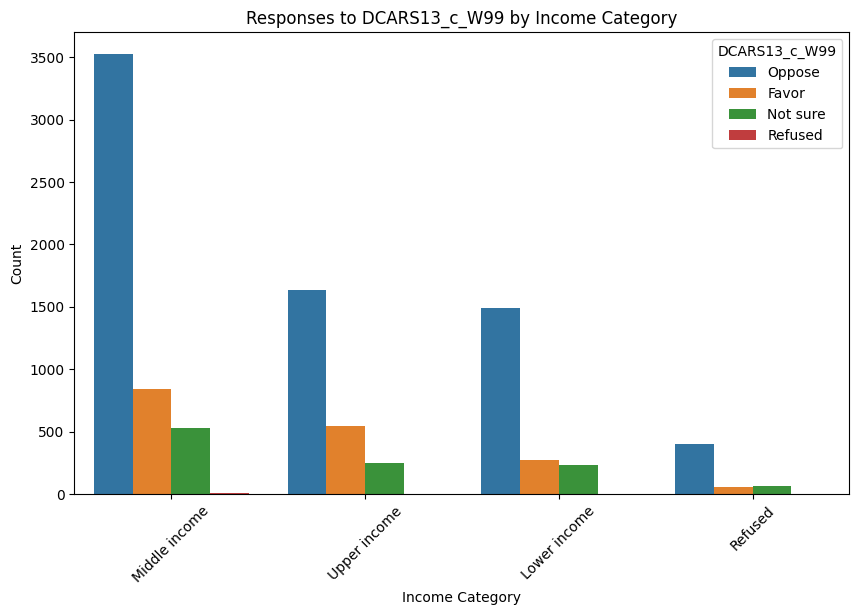

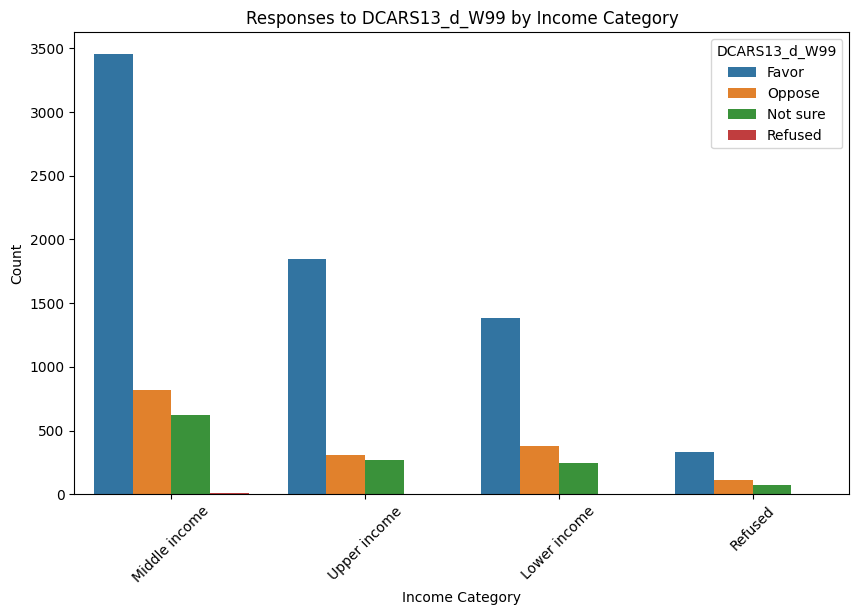

In [37]:
# List of columns to categorize
dcars_columns = [col for col in df_dropped.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_INC_TIER2', hue=col)
    plt.title(f'Responses to {col} by Income Category')
    plt.xlabel('Income Category')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


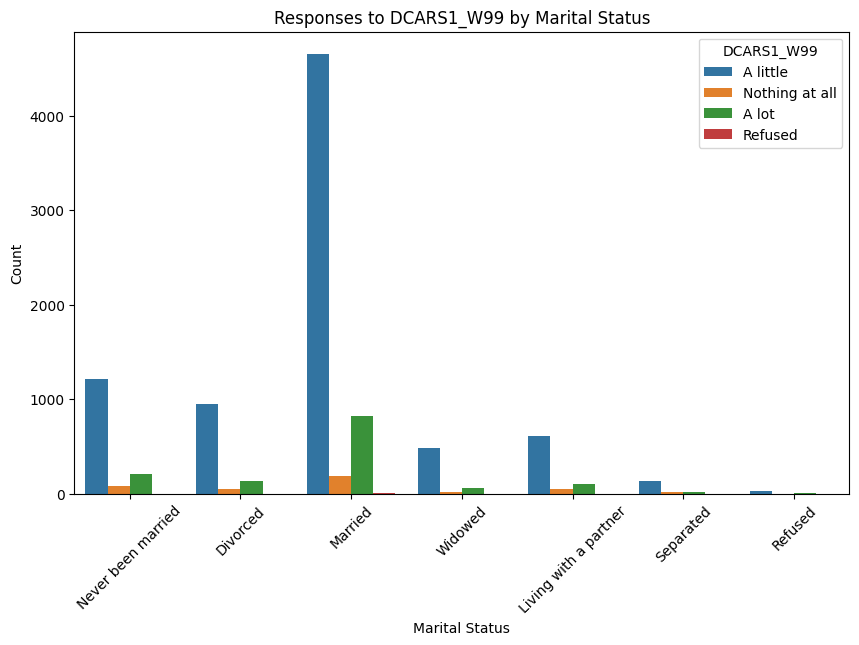

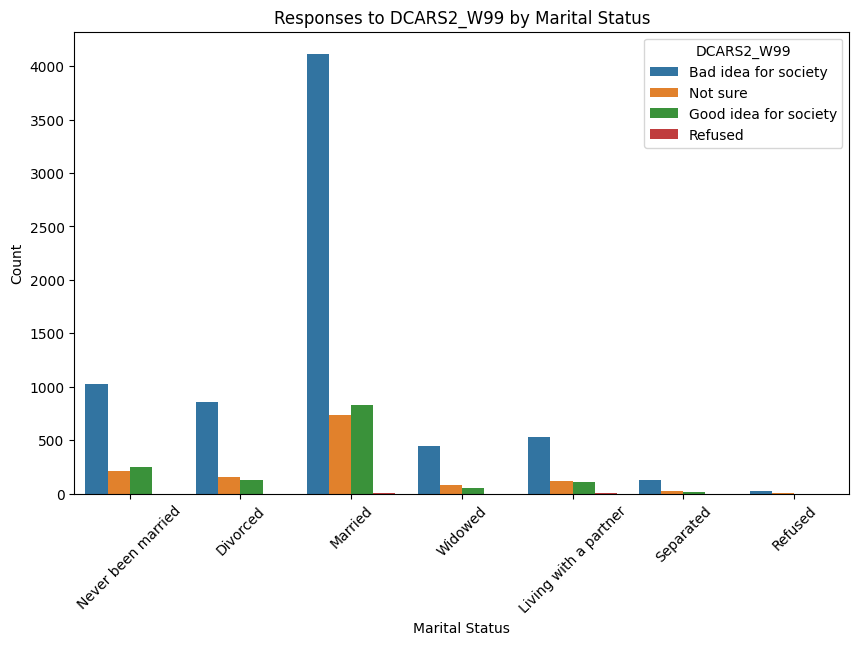

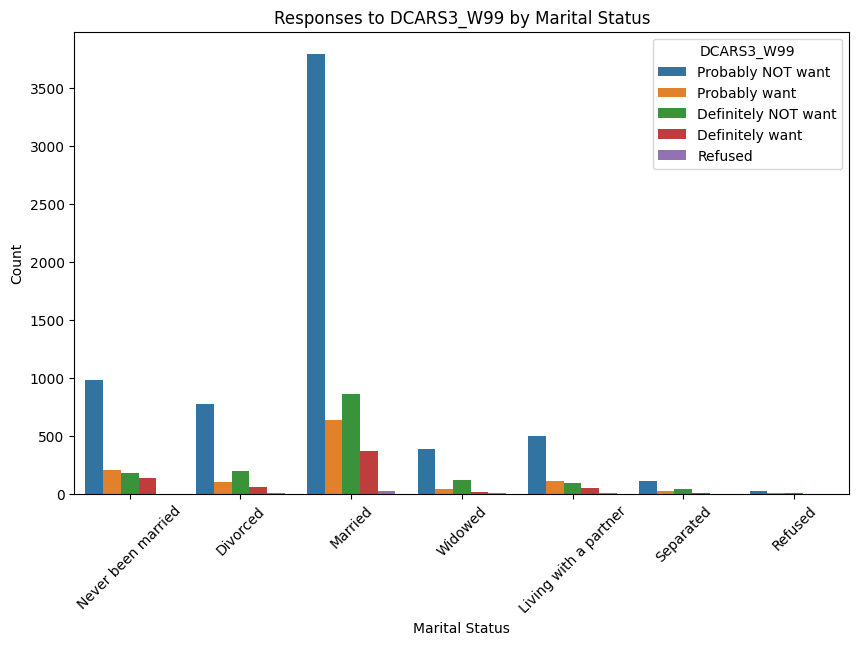

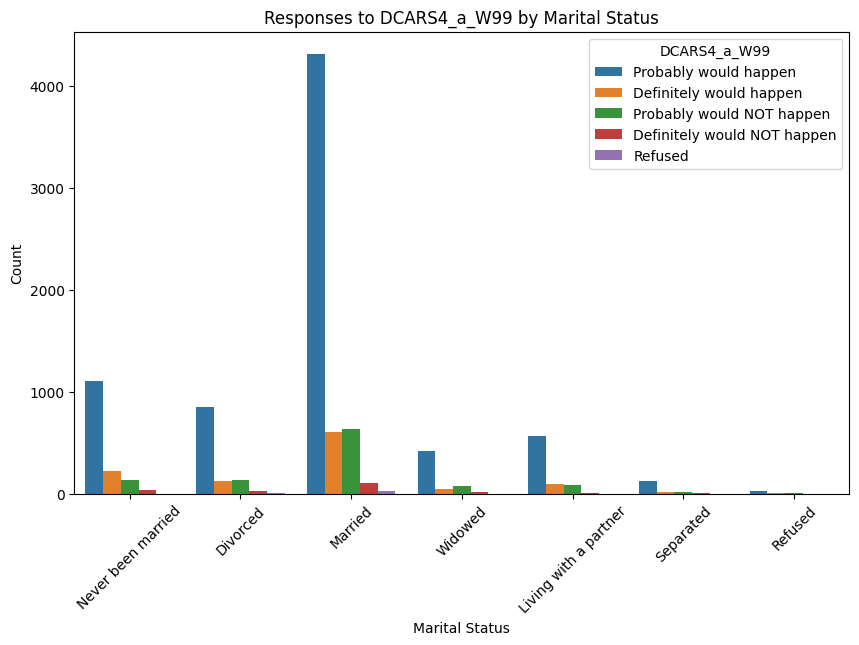

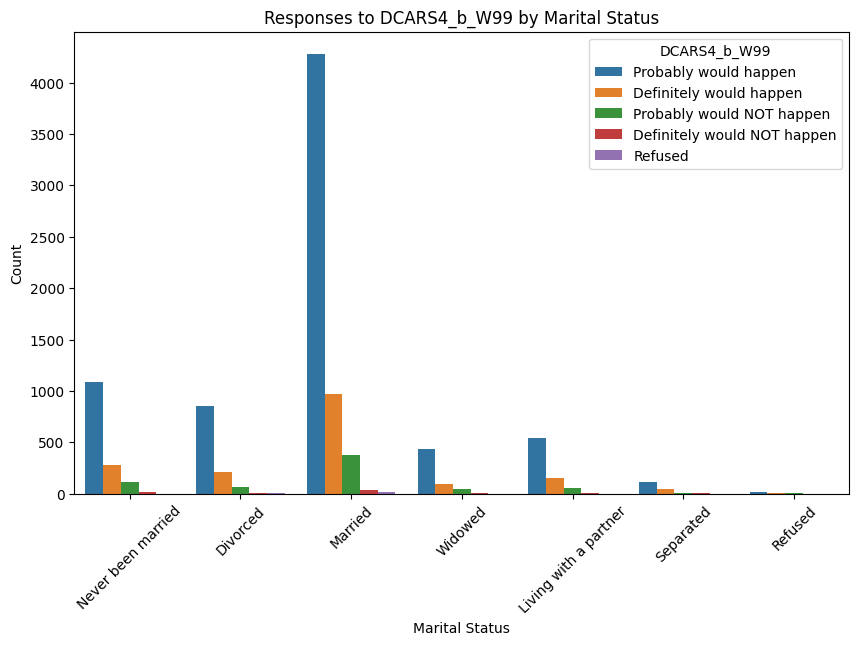

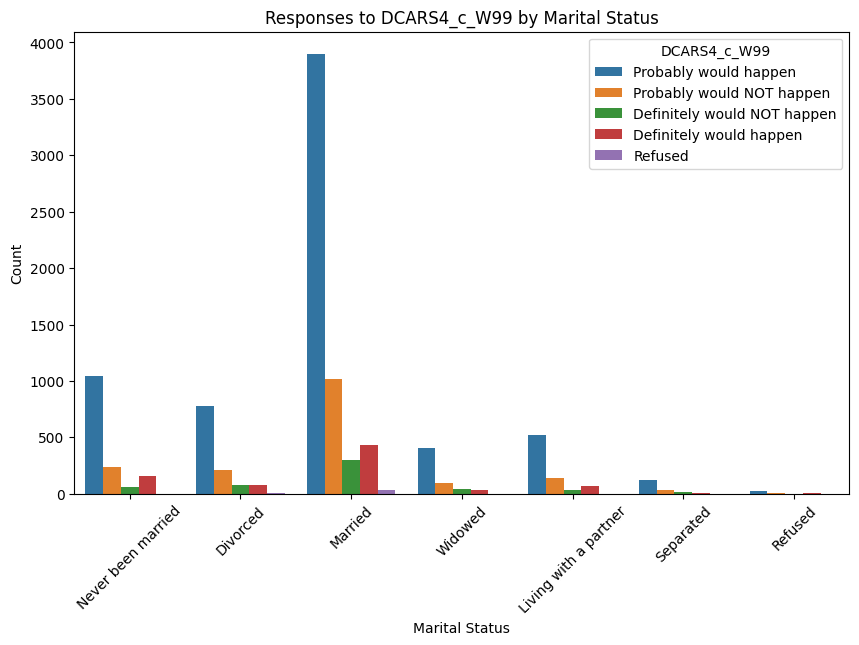

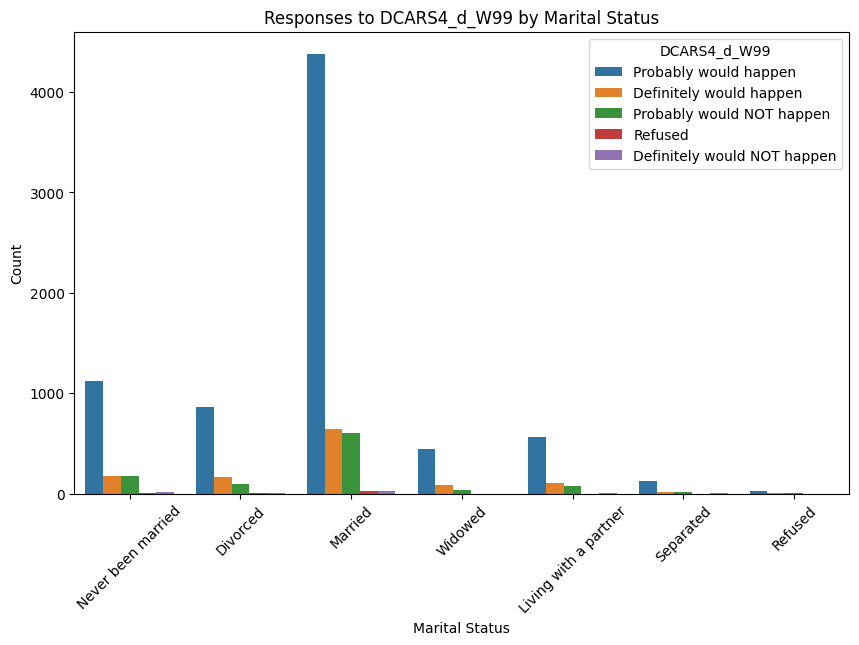

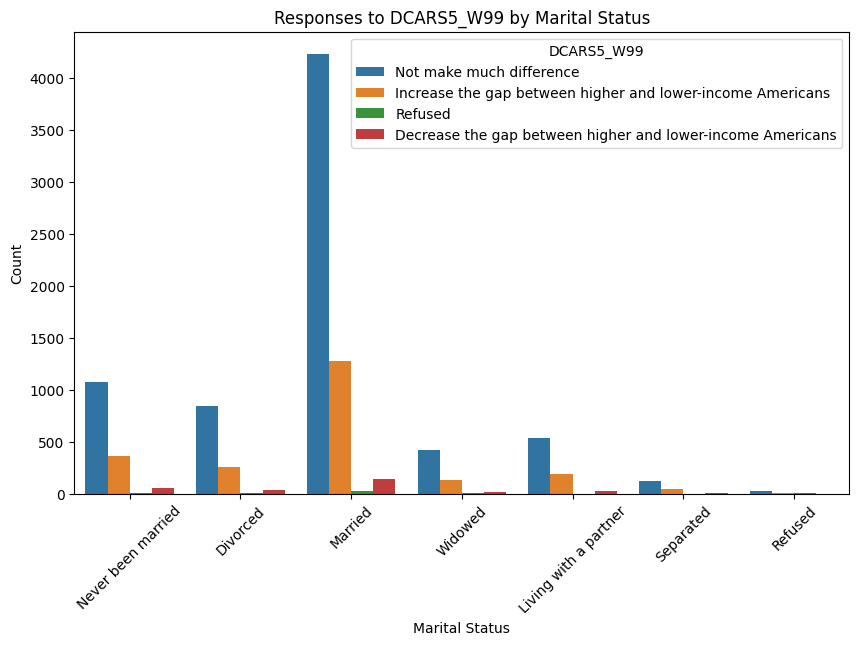

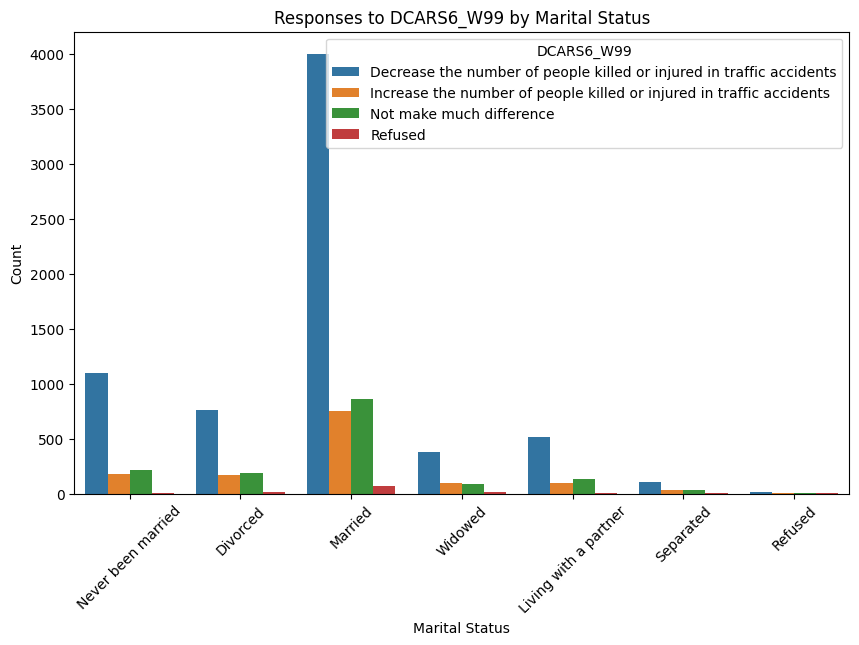

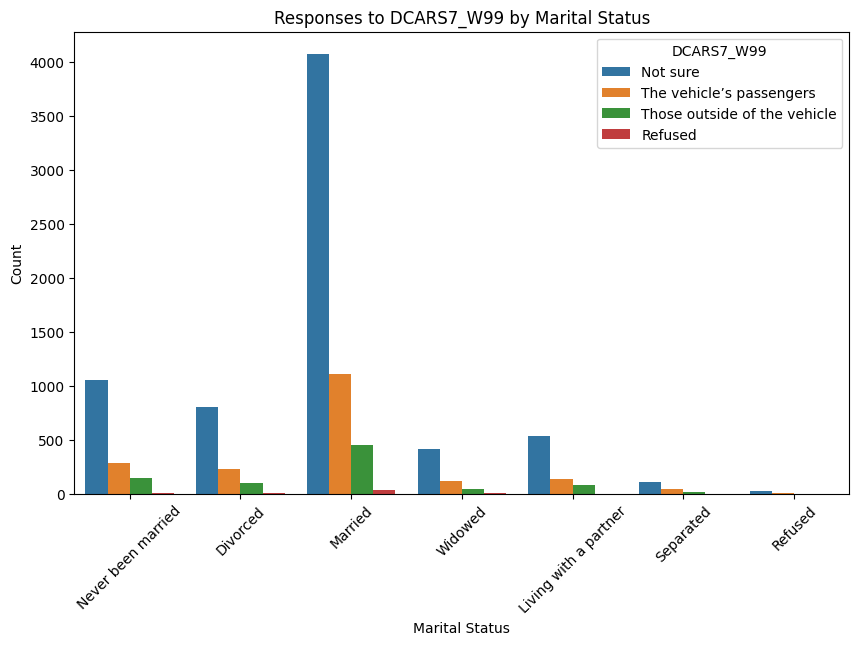

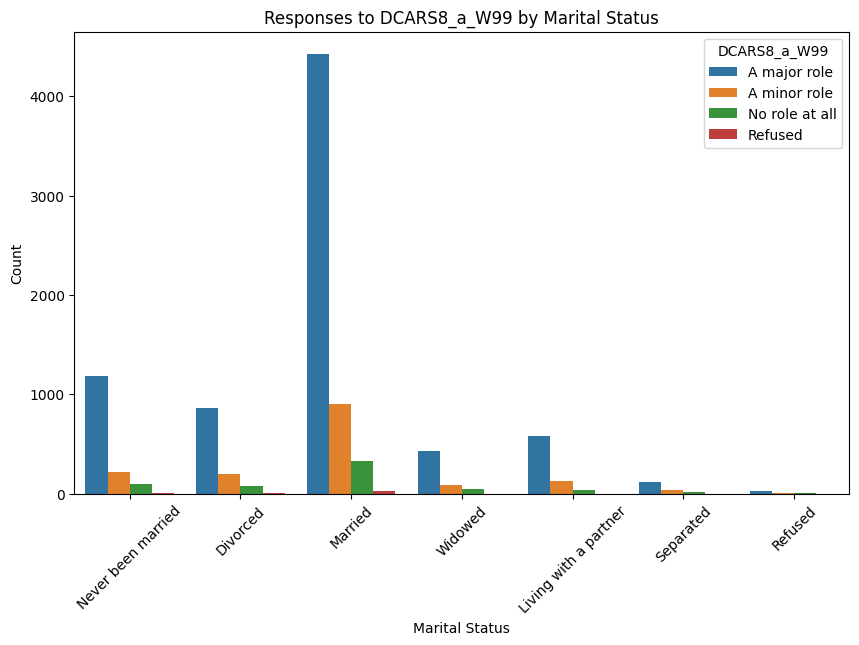

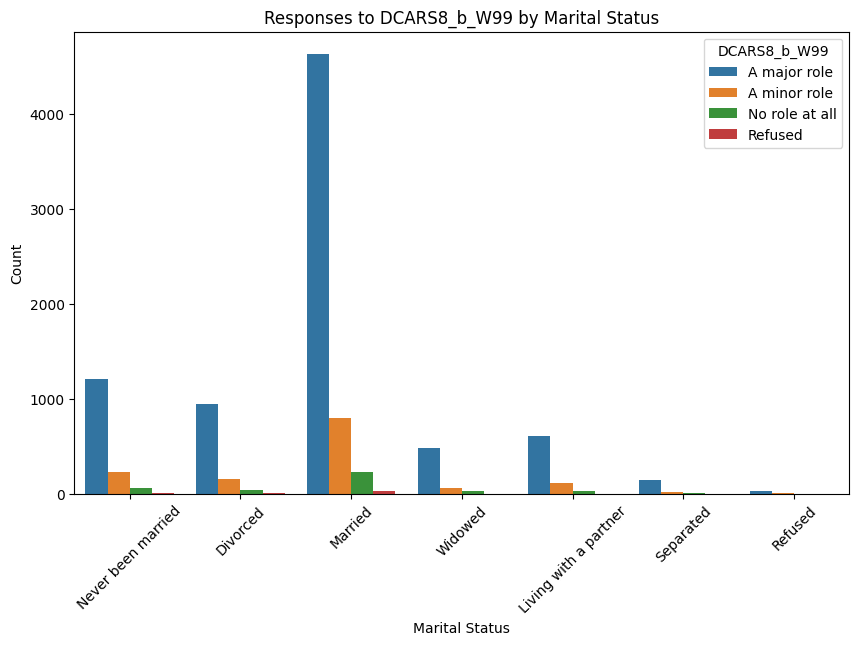

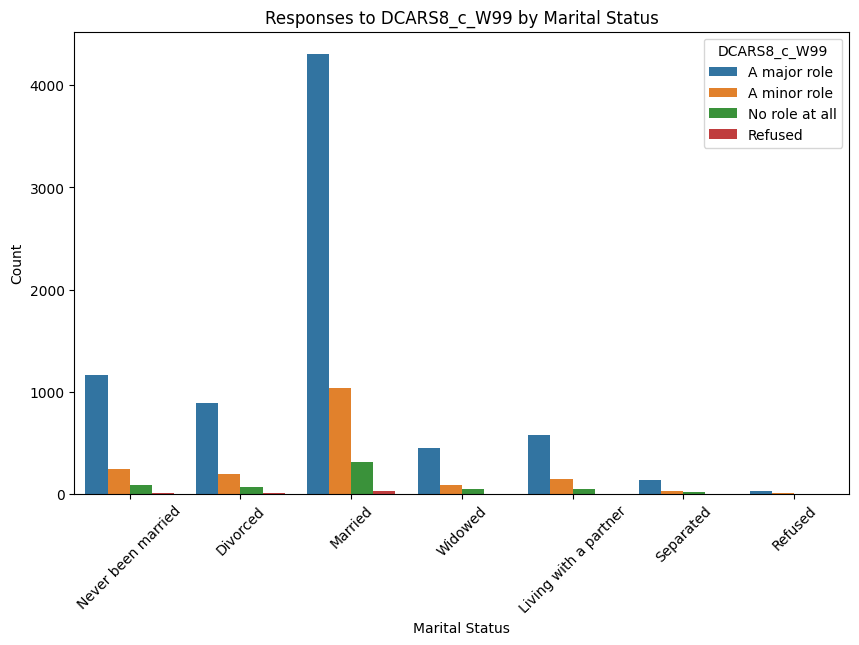

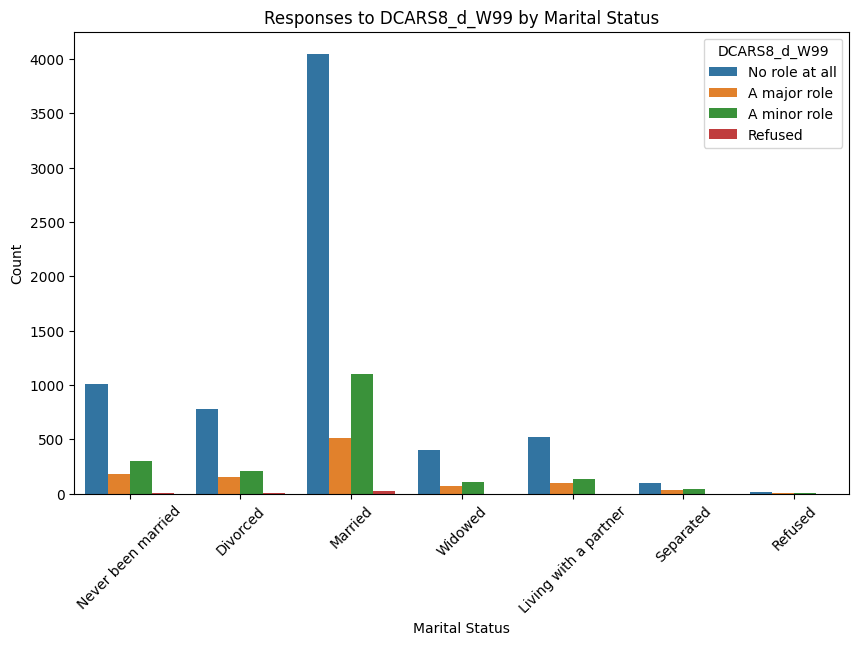

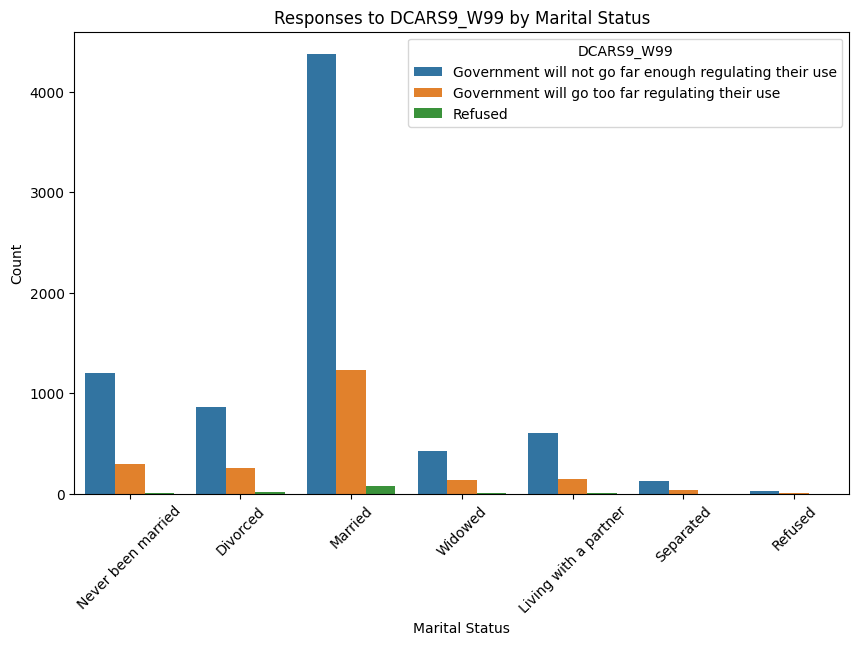

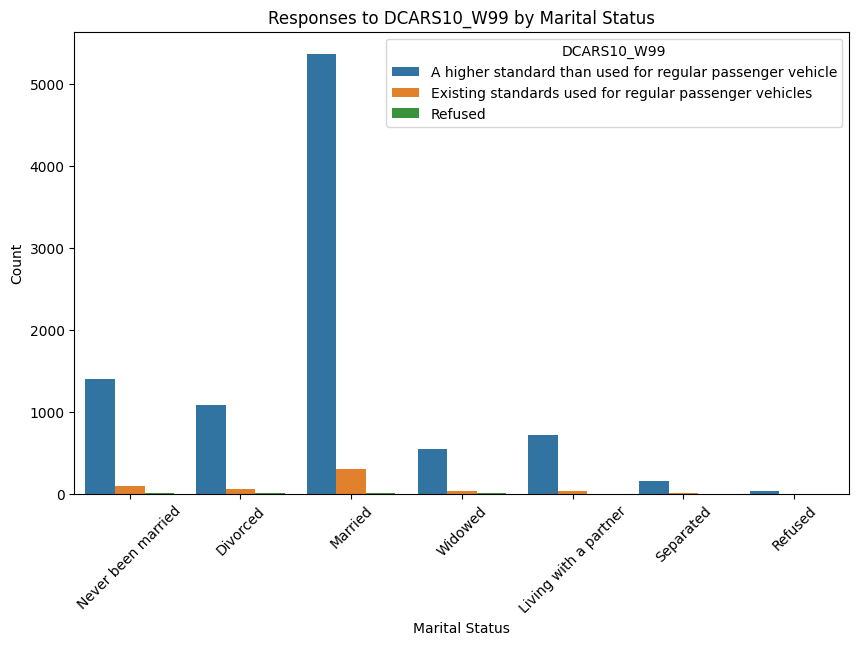

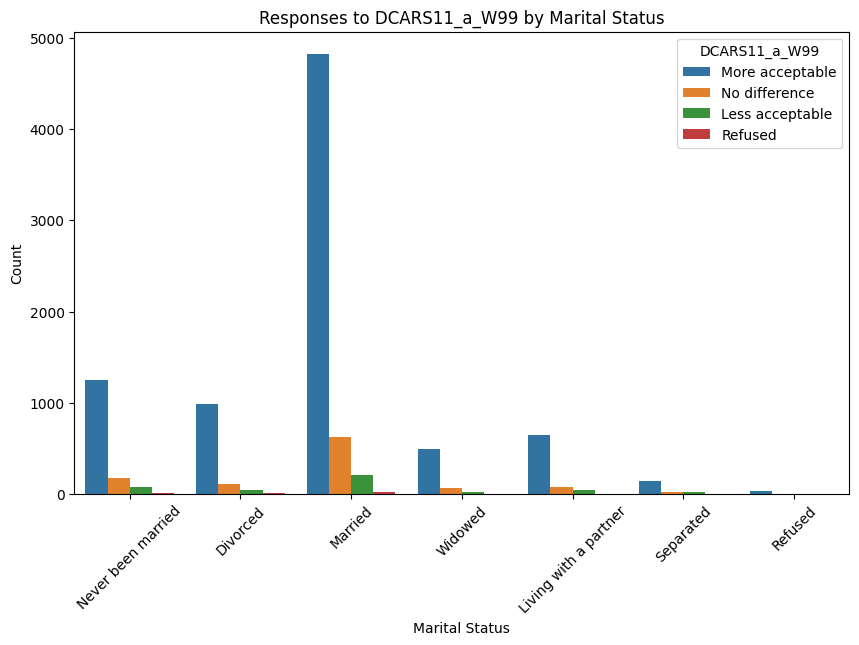

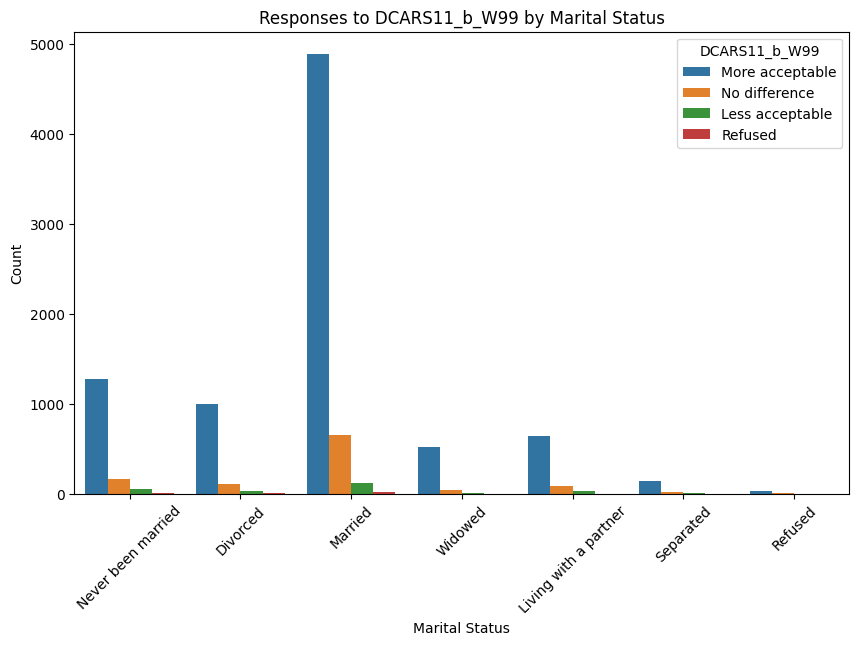

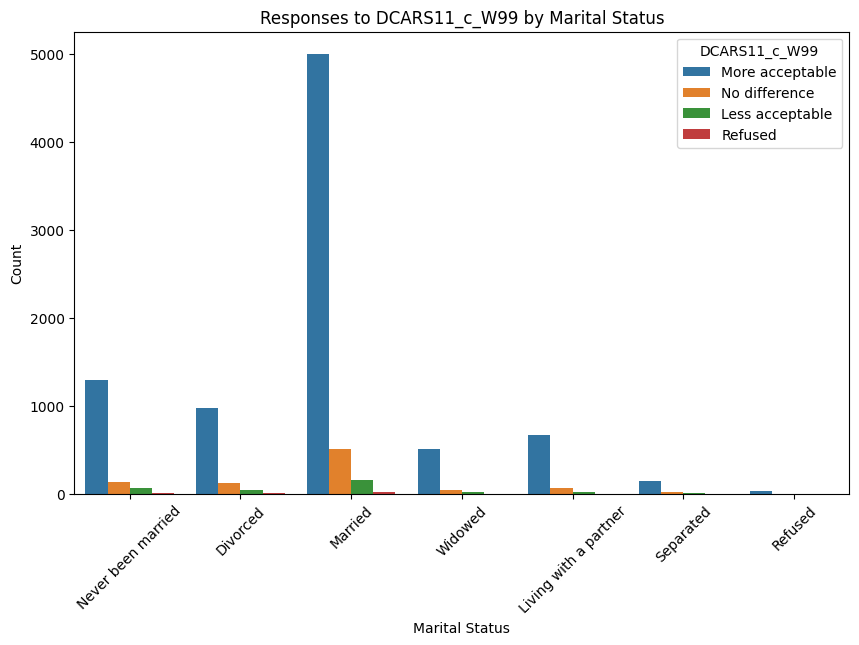

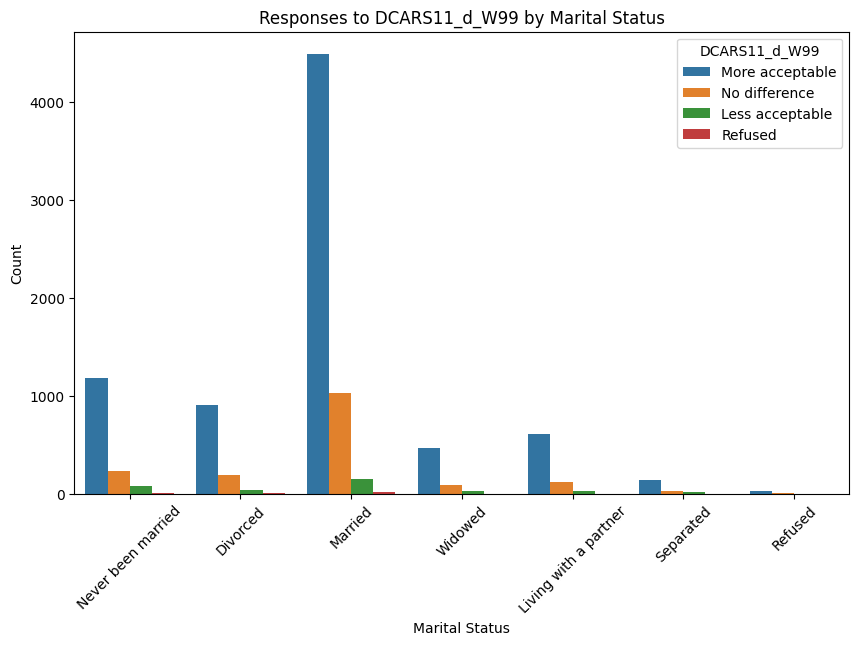

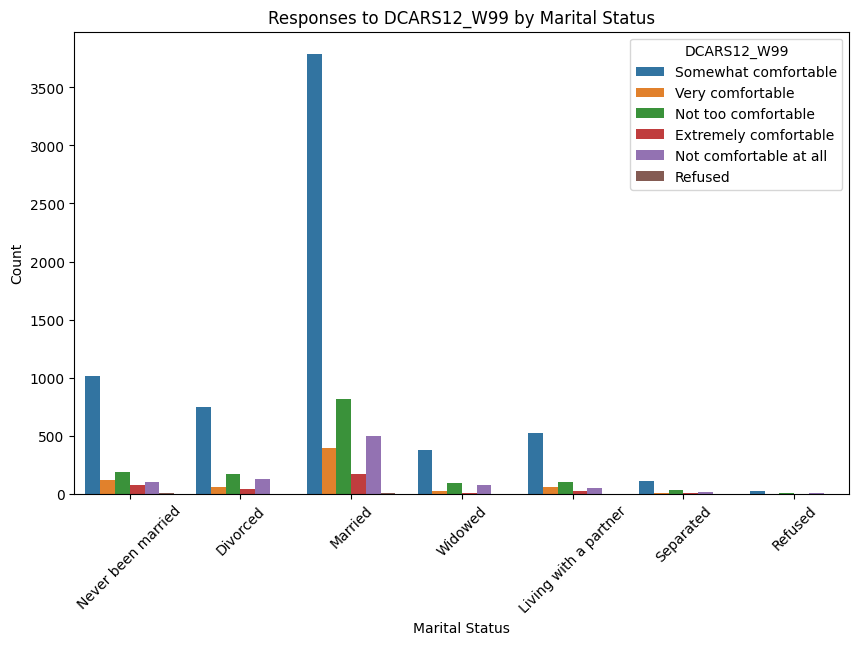

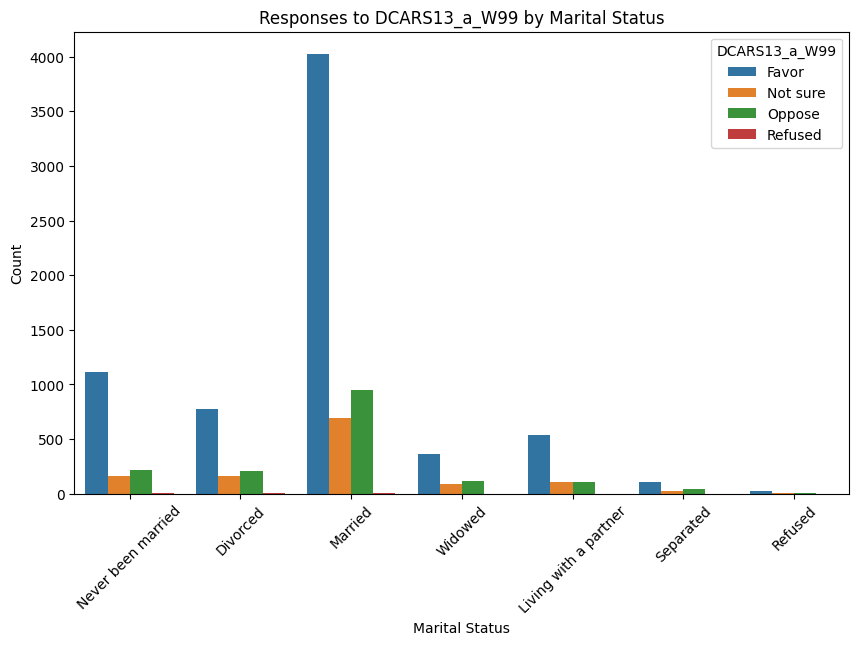

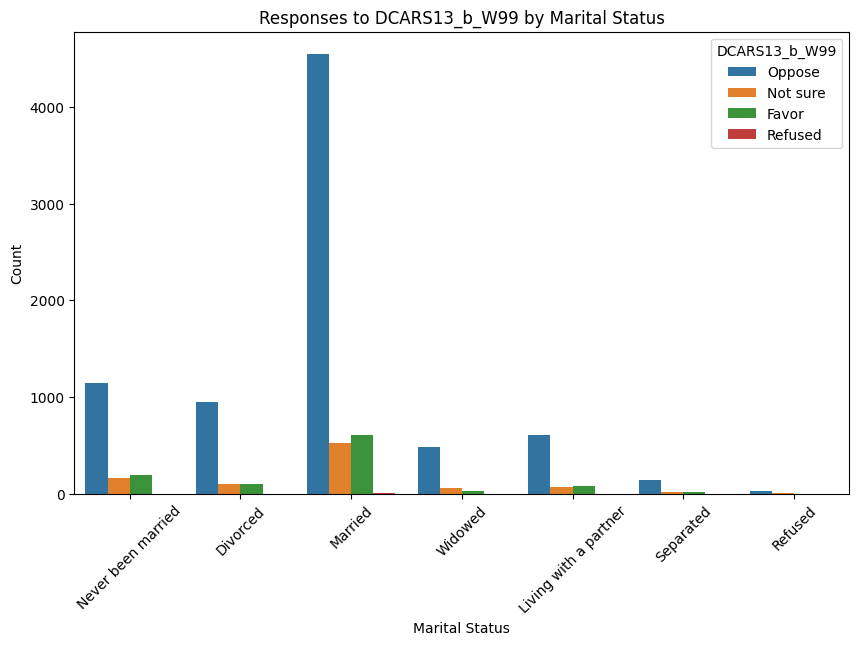

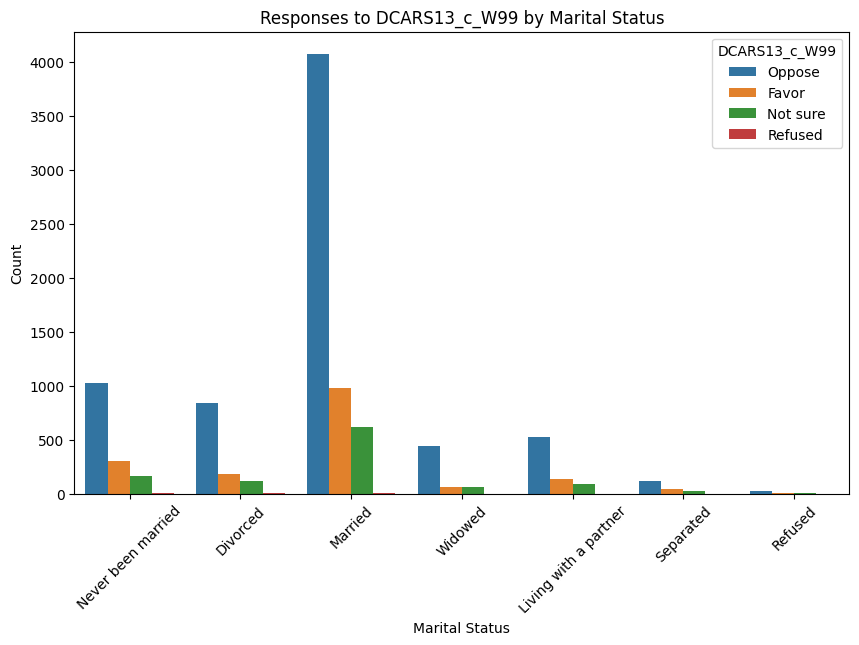

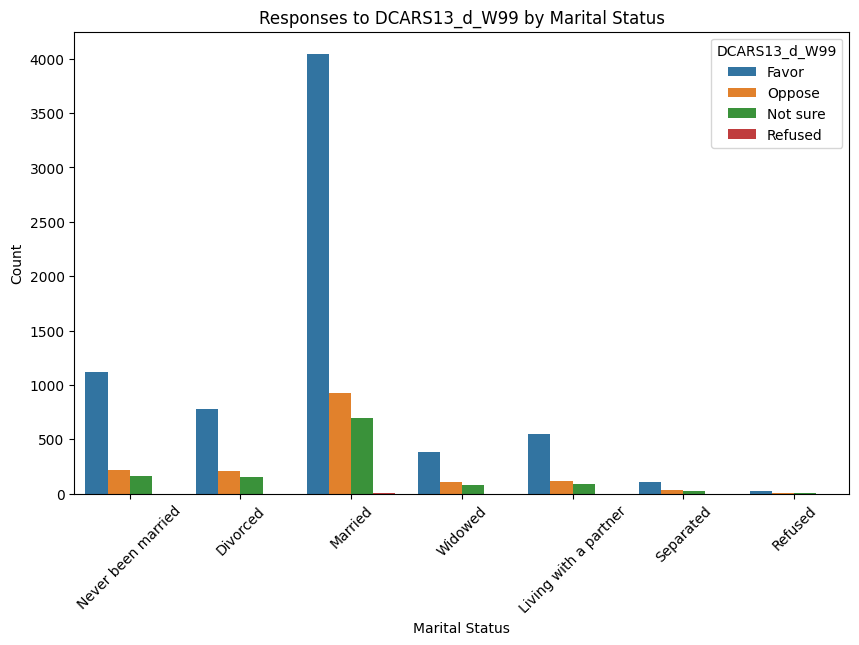

In [38]:
# List of columns to categorize
dcars_columns = [col for col in df_dropped.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_MARITAL', hue=col)
    plt.title(f'Responses to {col} by Marital Status')
    plt.xlabel('Marital Status')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


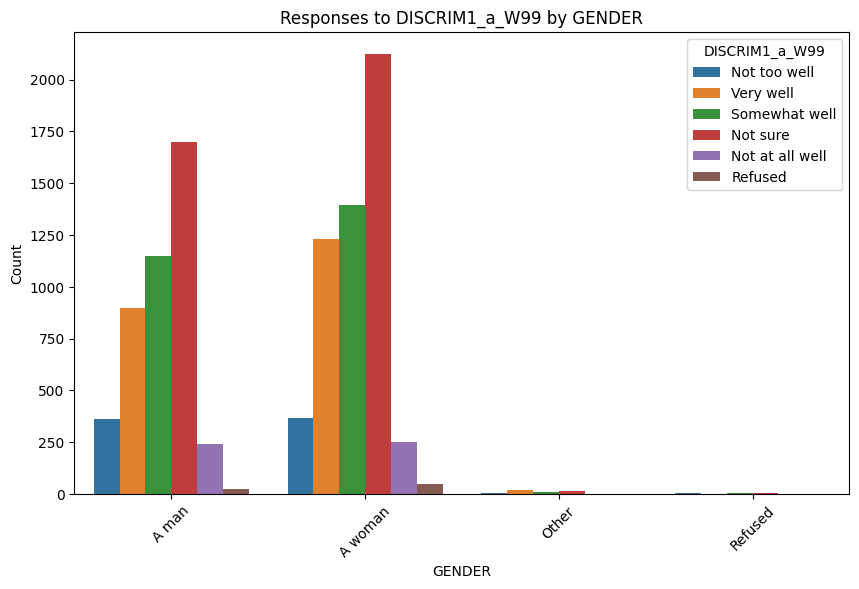

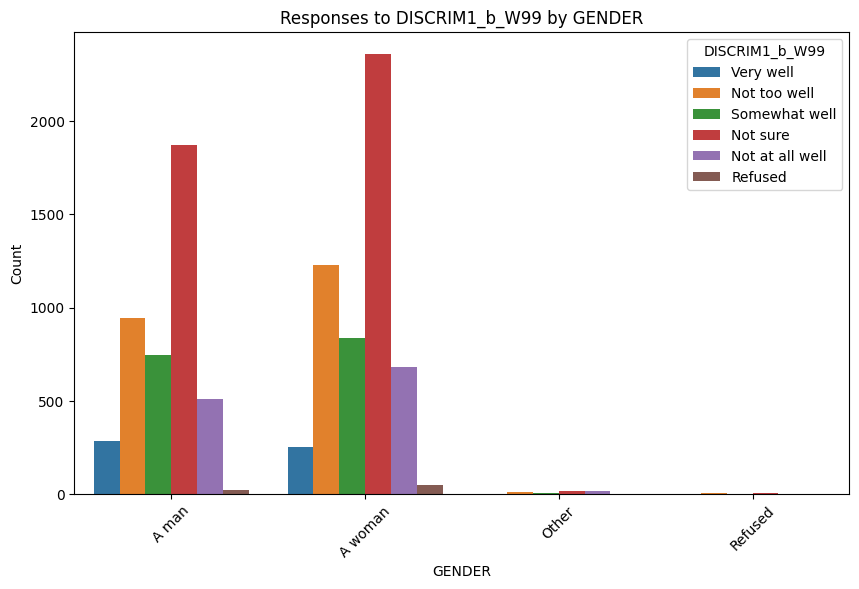

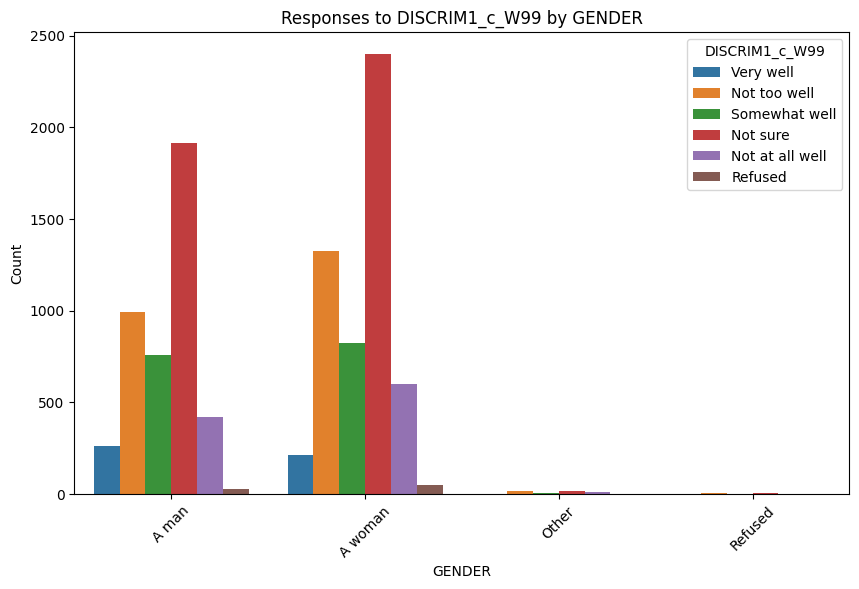

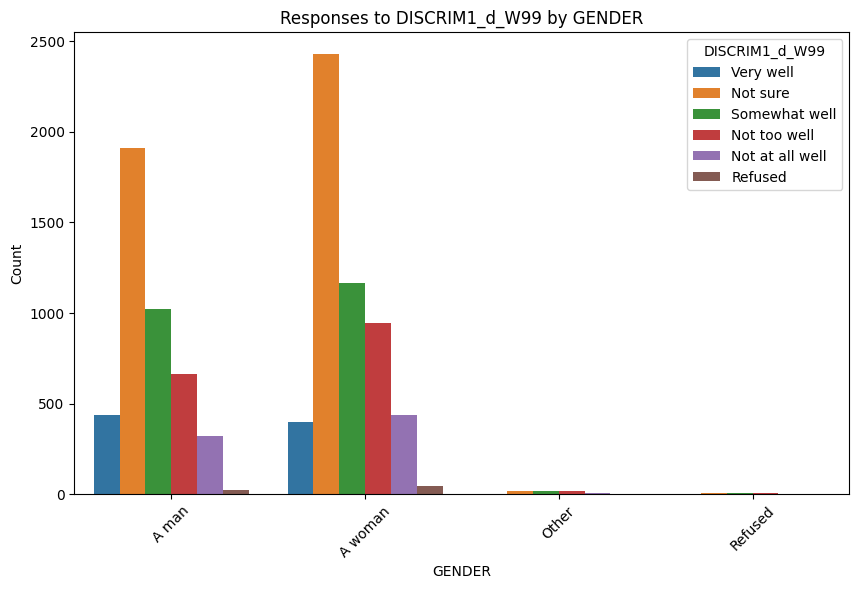

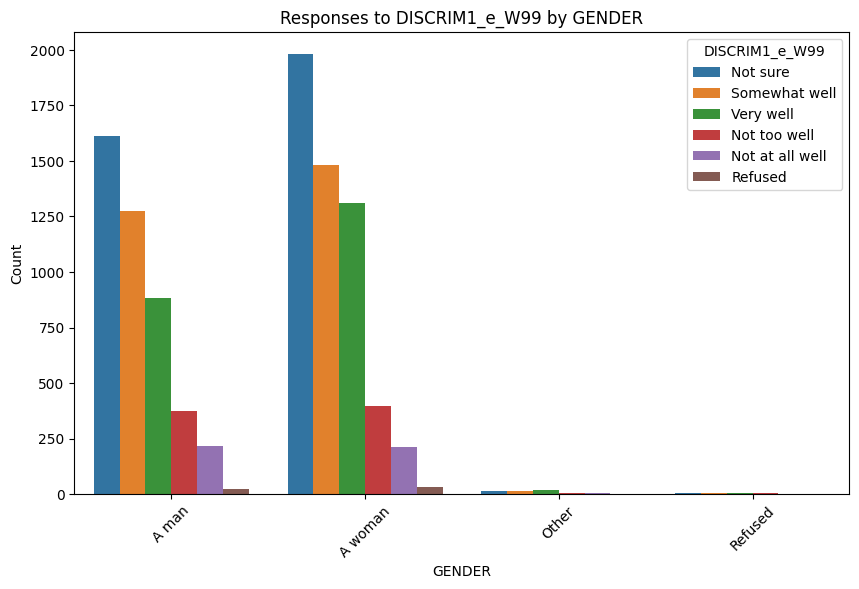

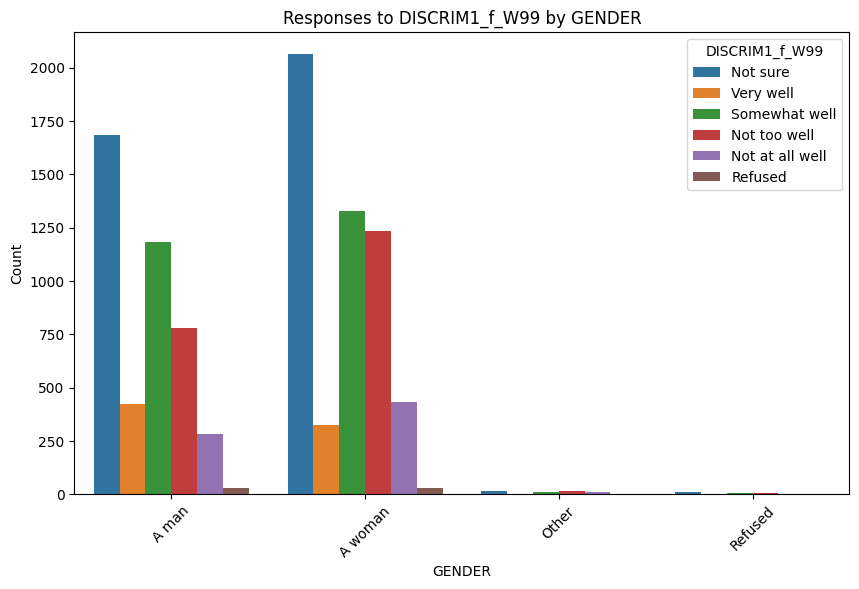

In [39]:
# List of columns to categorize
discrim_columns = [col for col in df_dropped.columns if col.startswith('DISCRIM')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in discrim_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_GENDER', hue=col)
    plt.title(f'Responses to {col} by GENDER')
    plt.xlabel('GENDER')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


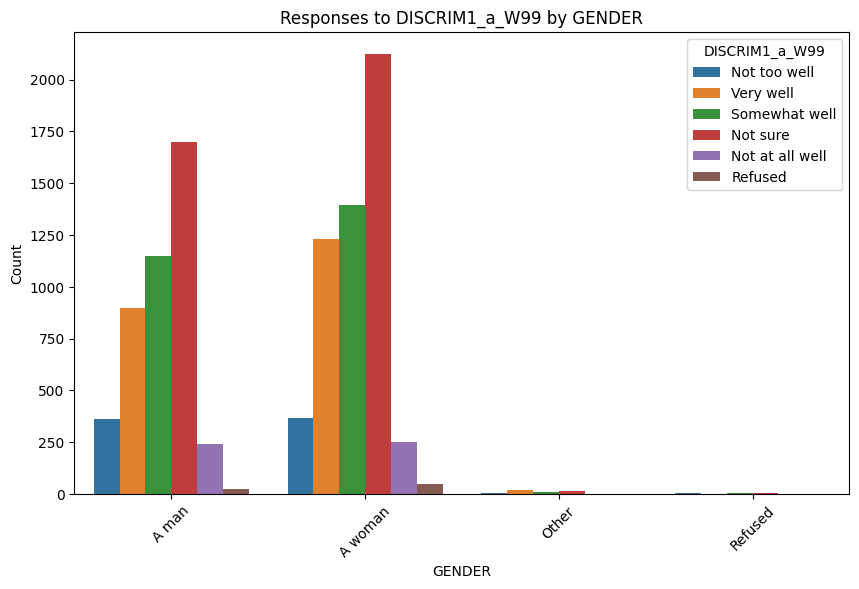

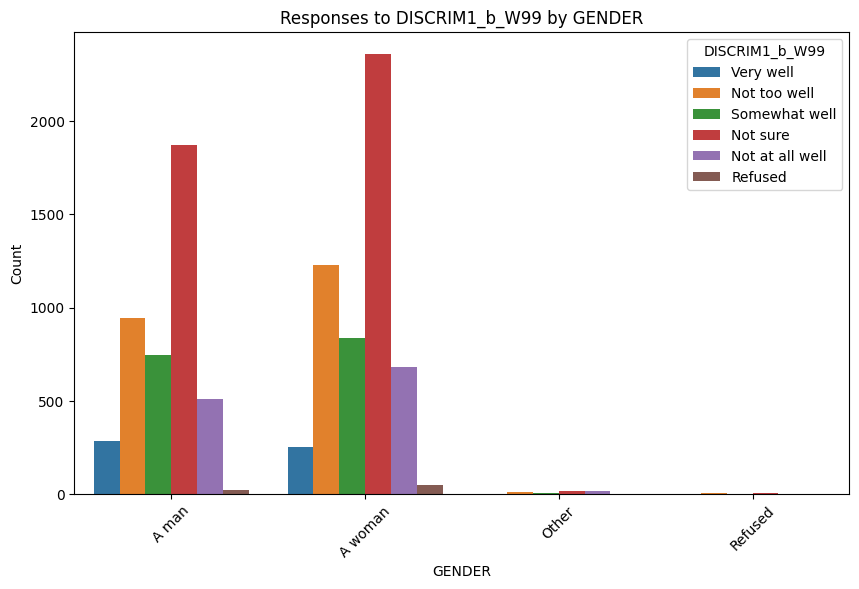

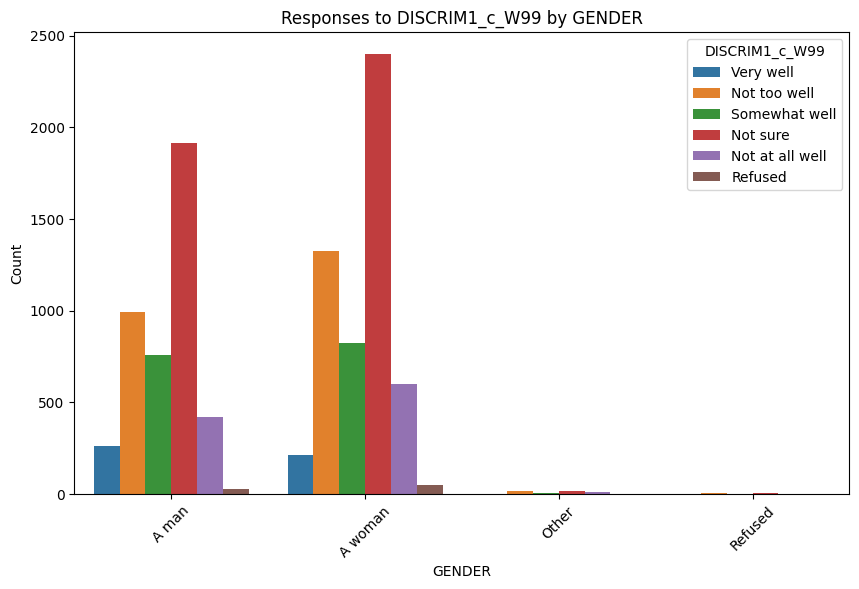

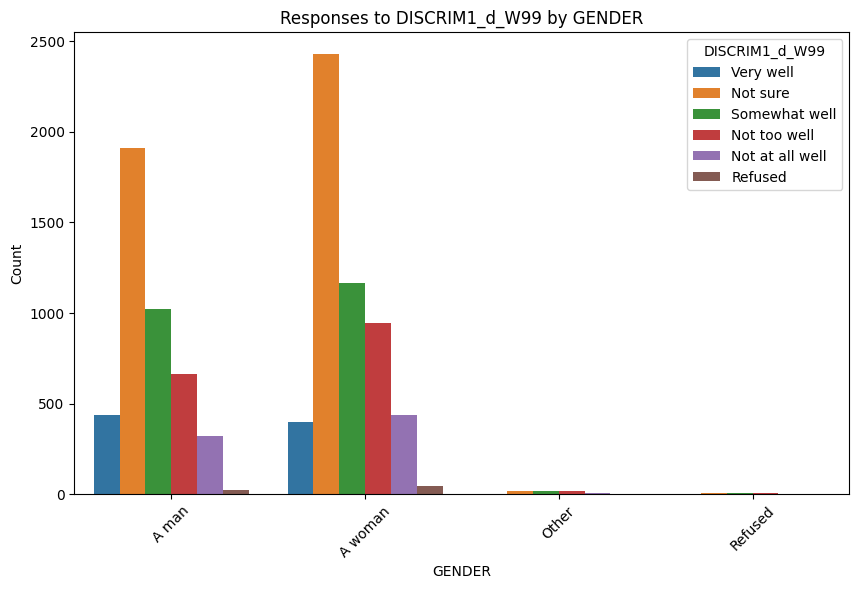

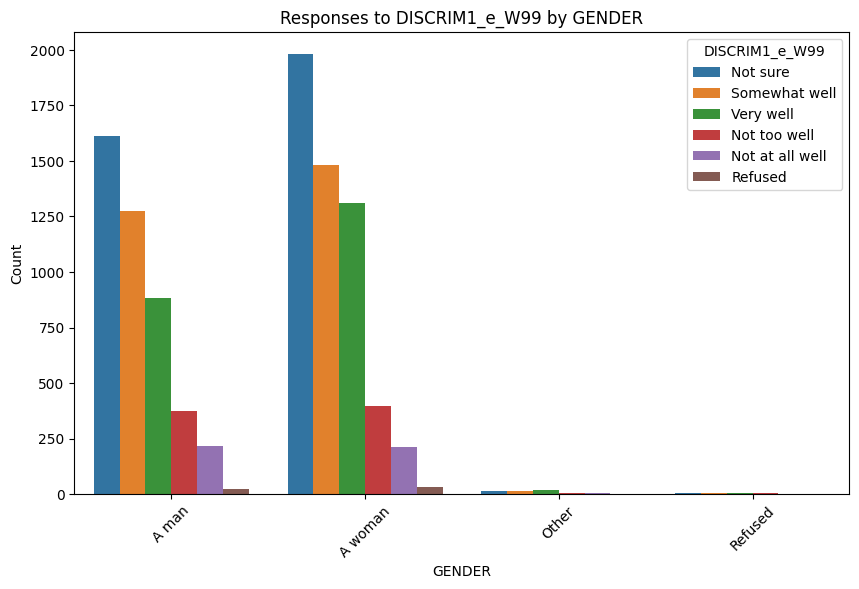

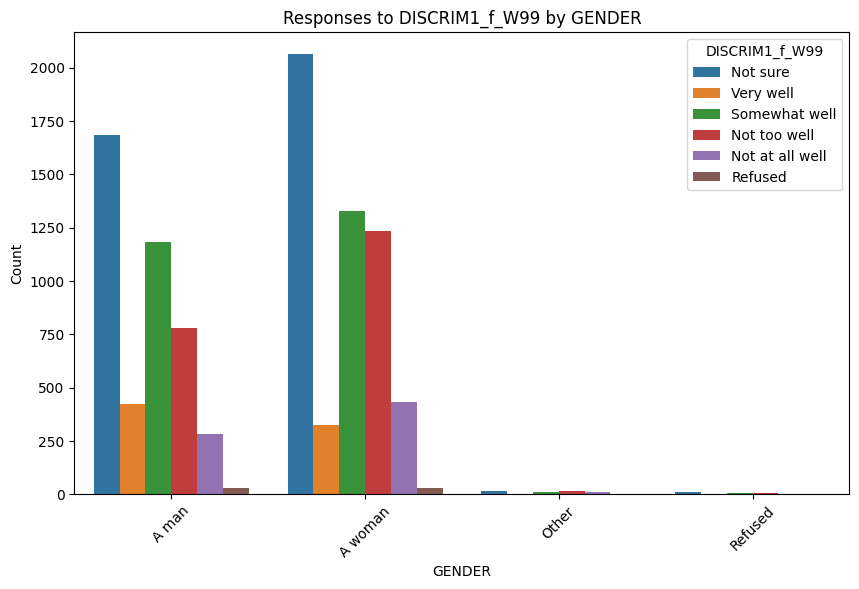

In [40]:
# List of columns to categorize
discrim_columns = [col for col in df_dropped.columns if col.startswith('DISCRIM')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in discrim_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_GENDER', hue=col)
    plt.title(f'Responses to {col} by GENDER')
    plt.xlabel('GENDER')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles


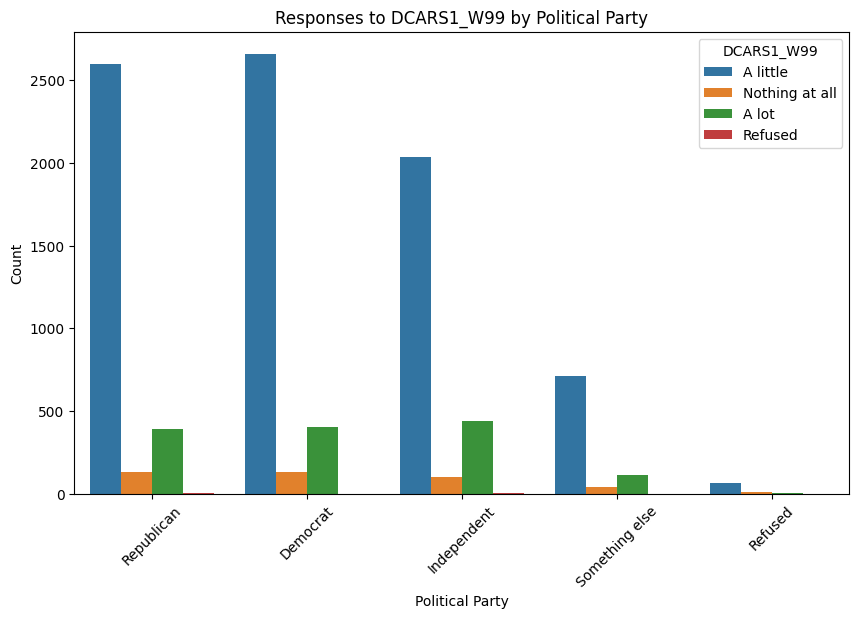

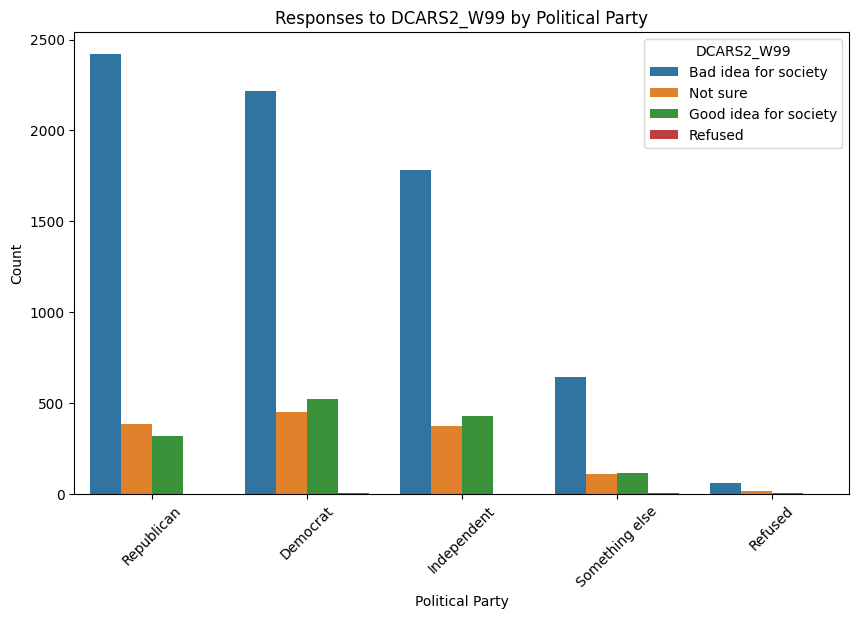

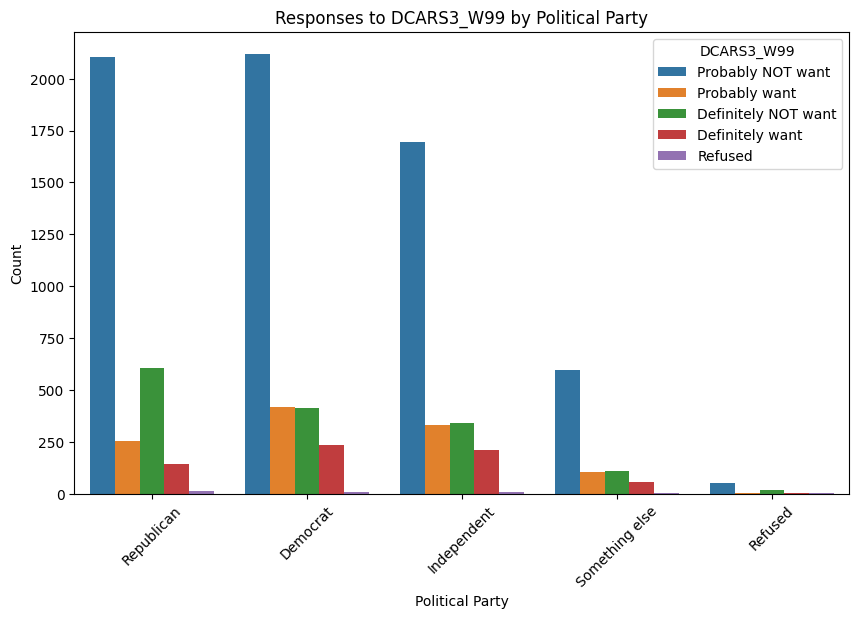

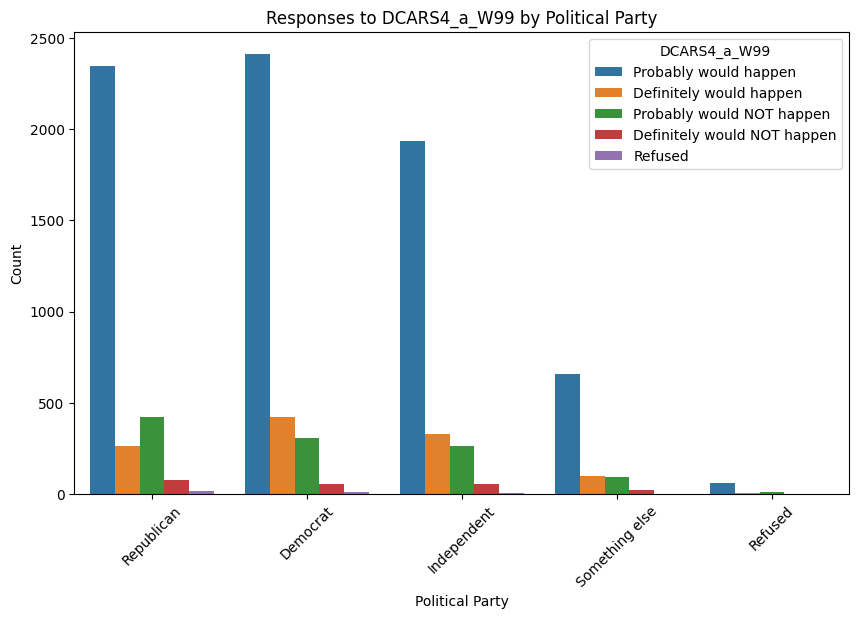

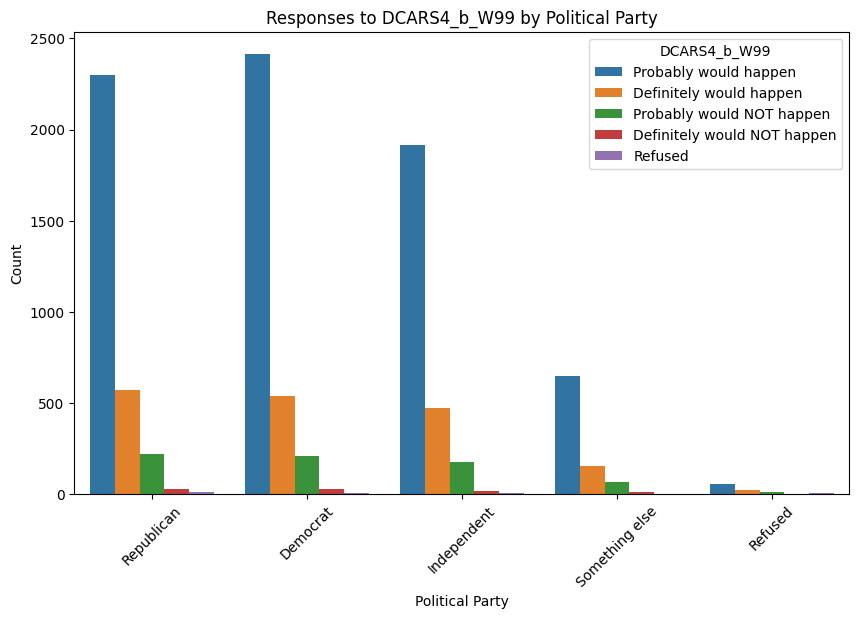

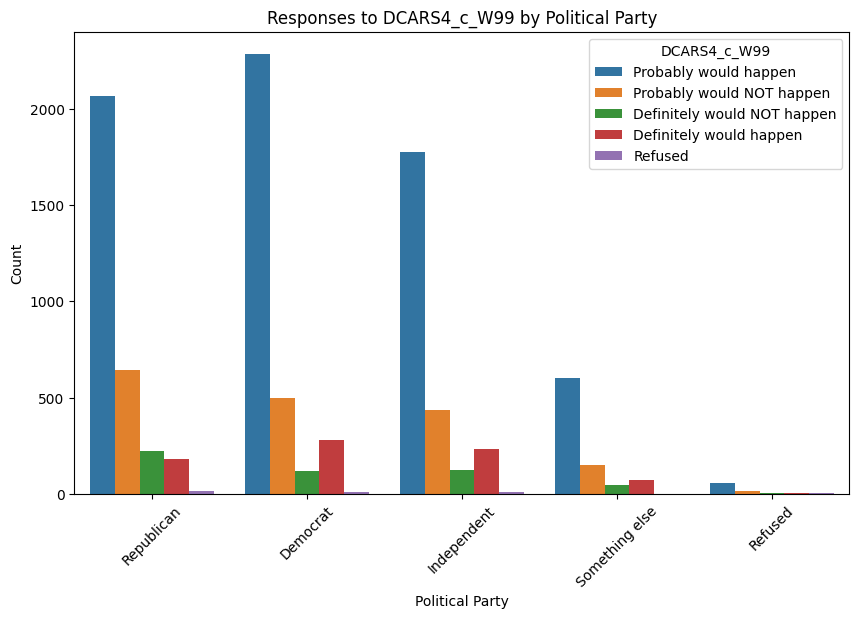

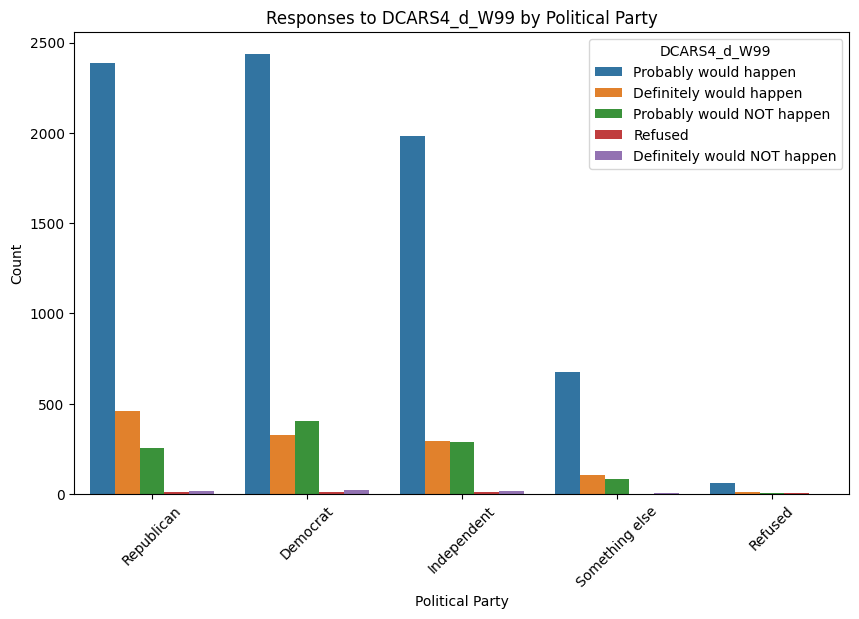

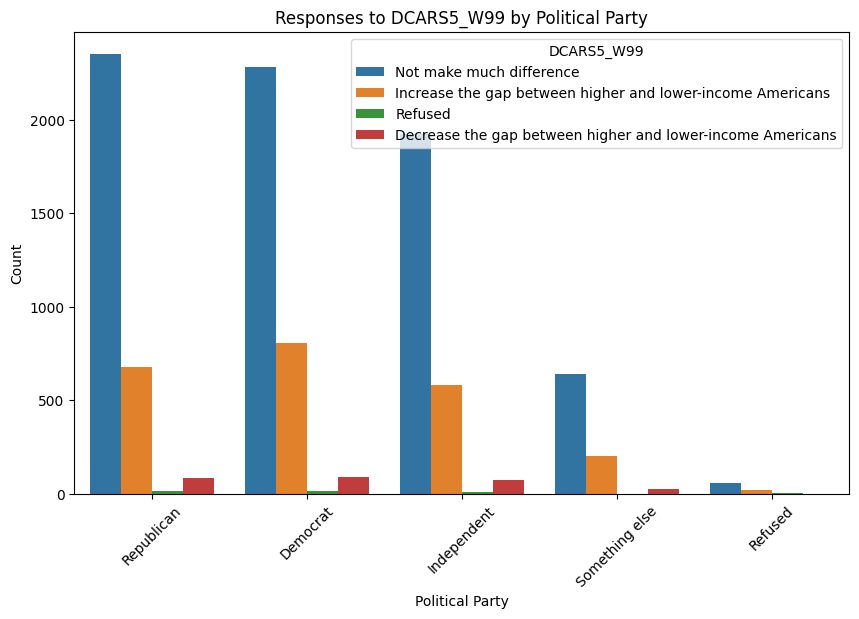

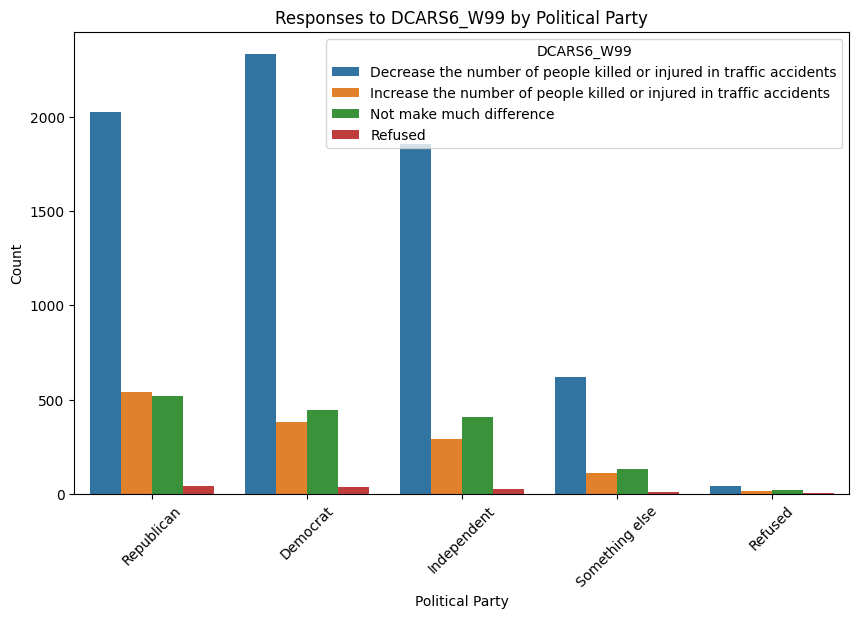

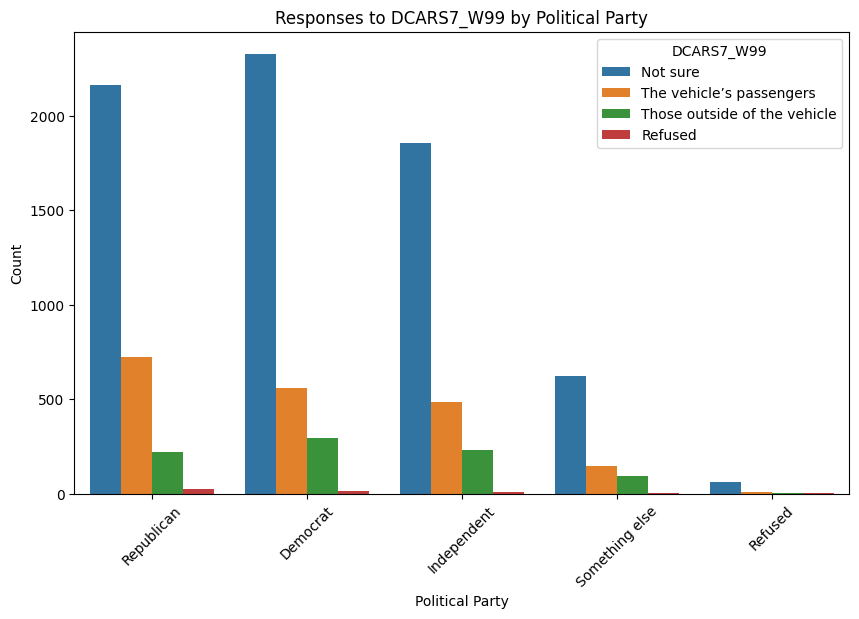

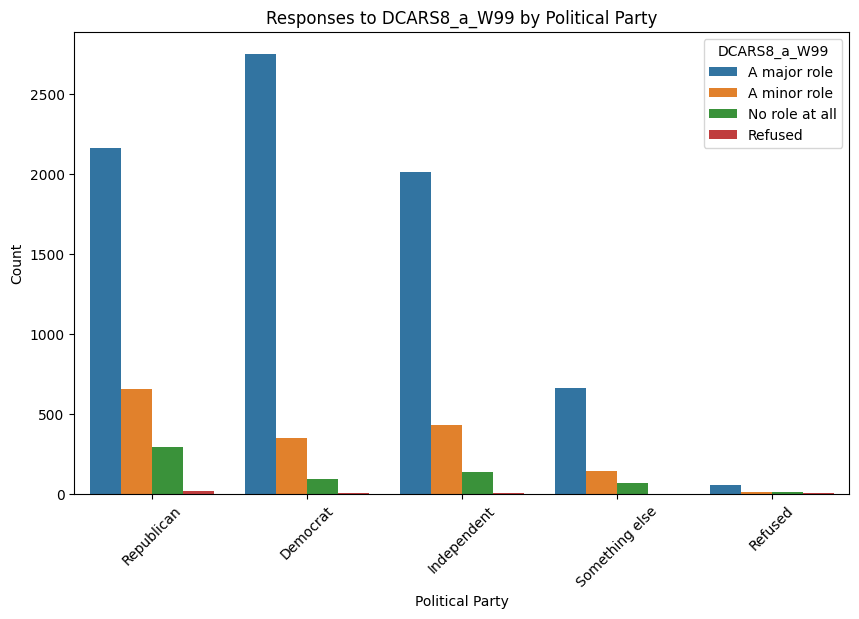

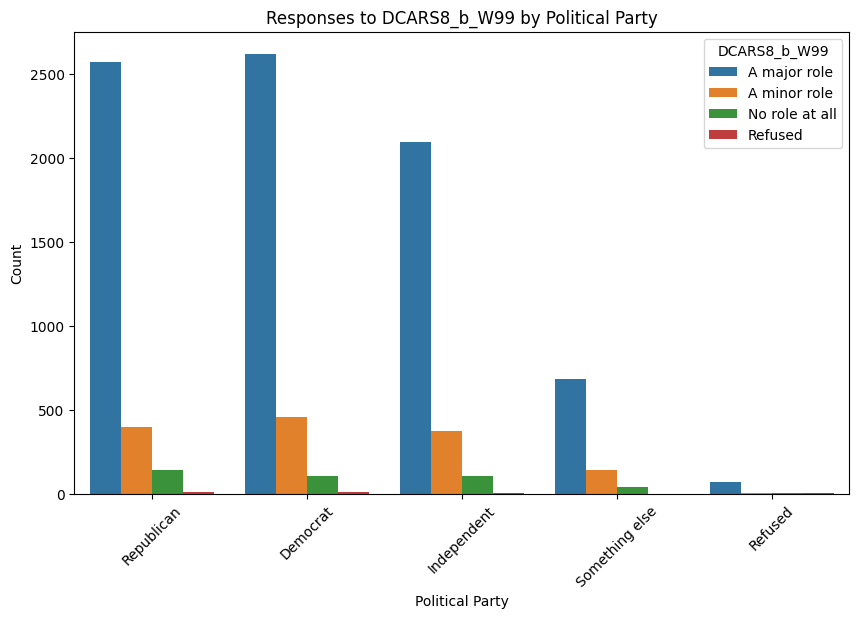

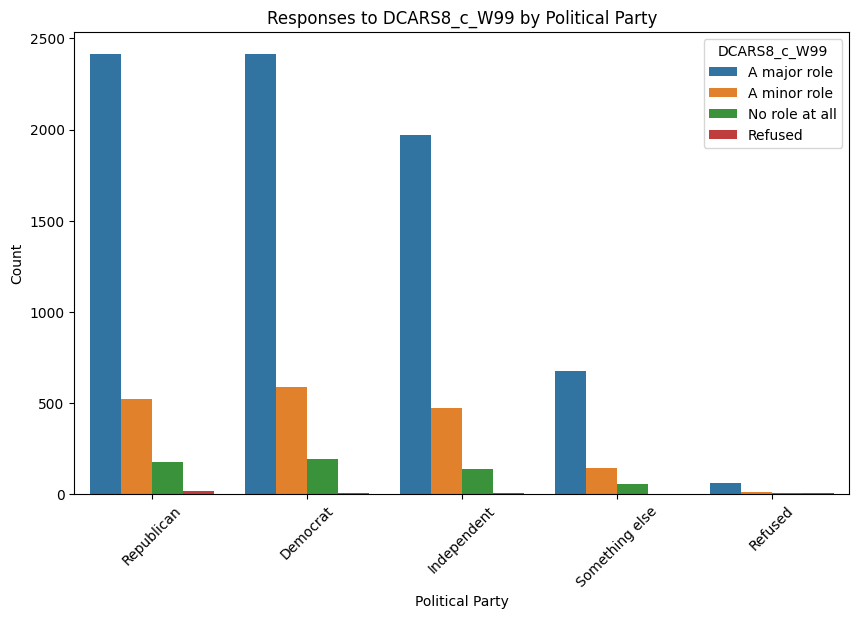

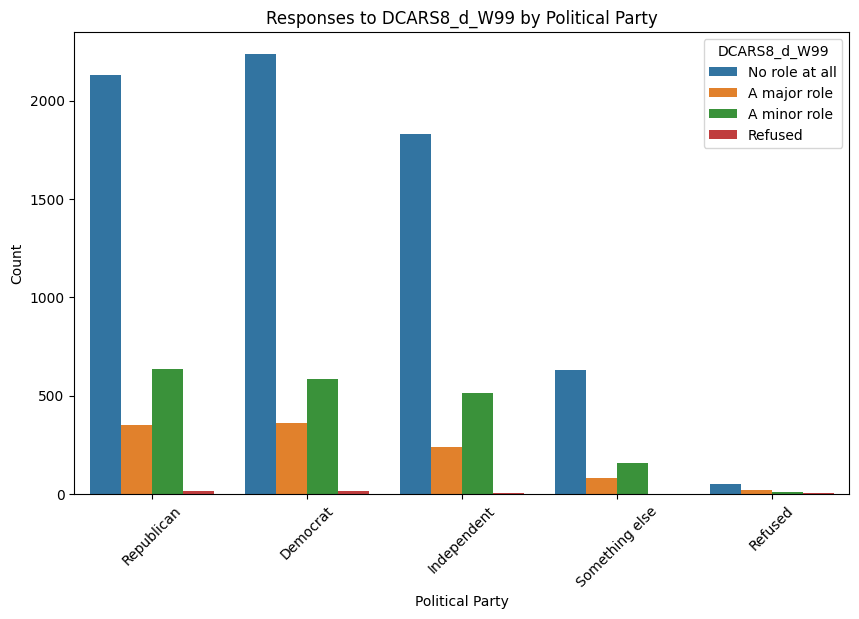

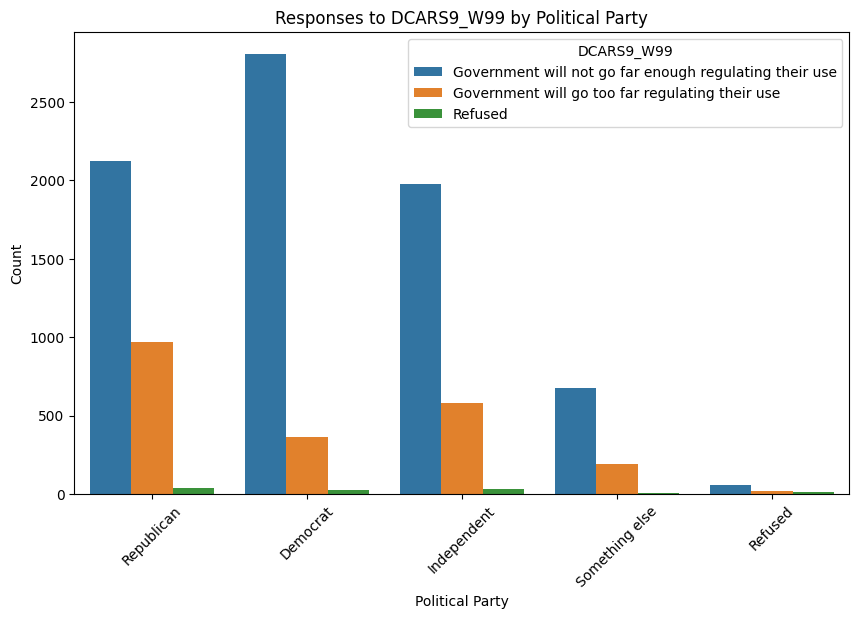

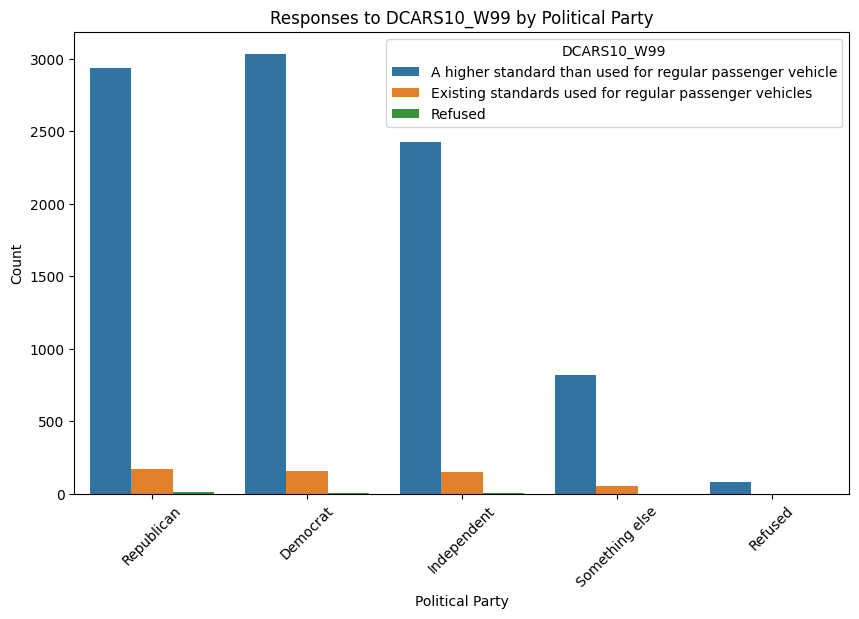

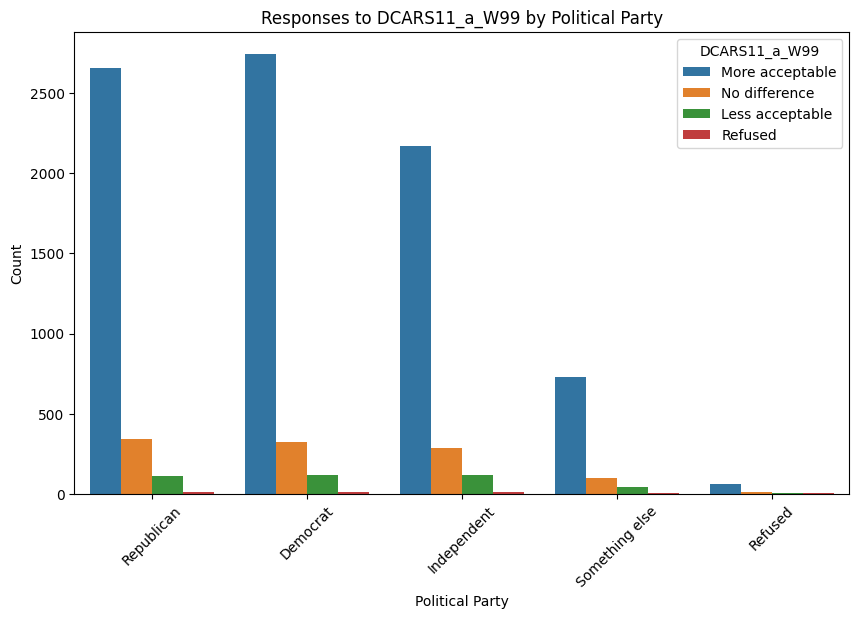

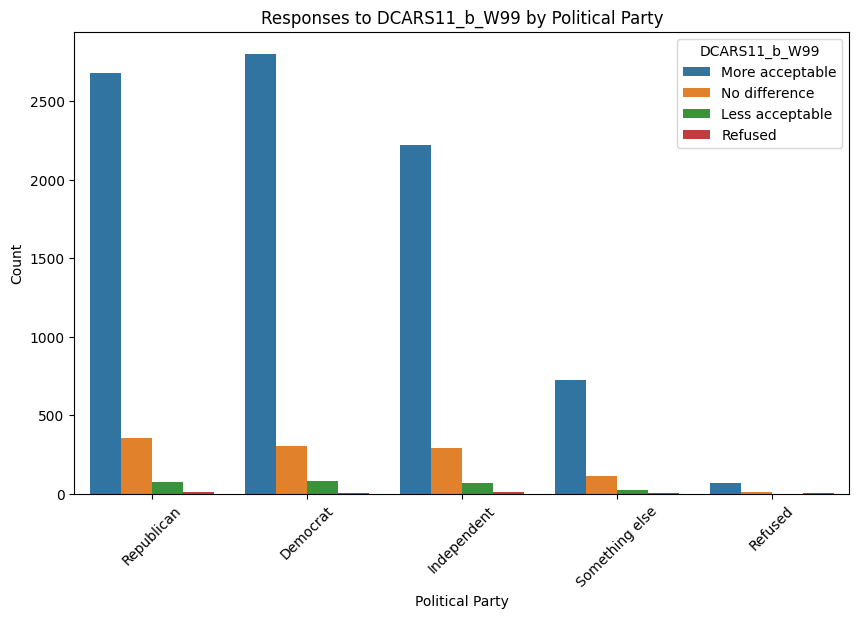

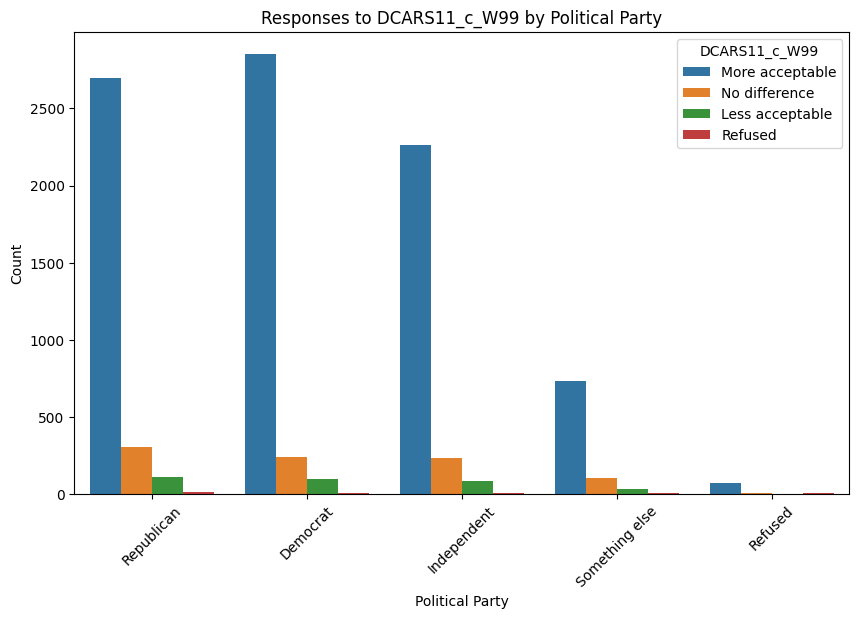

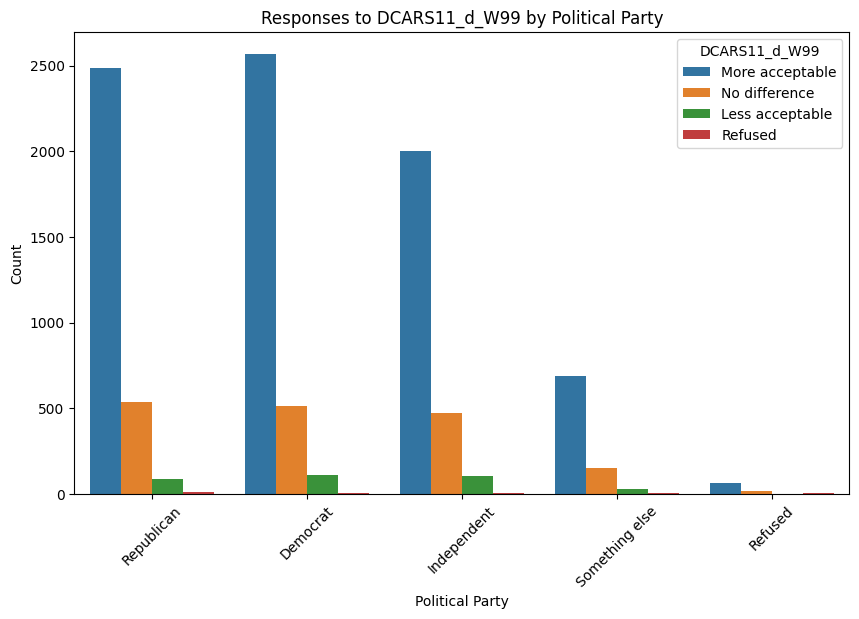

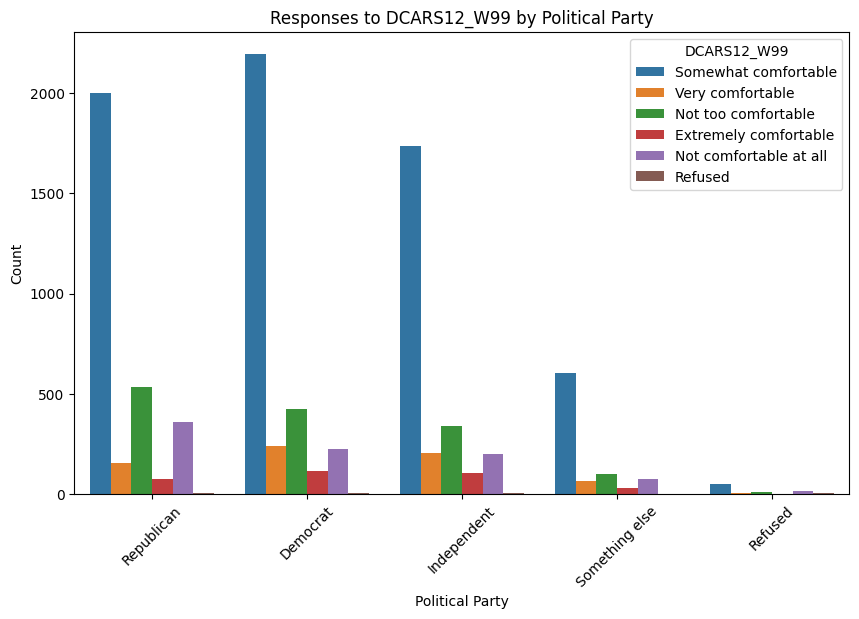

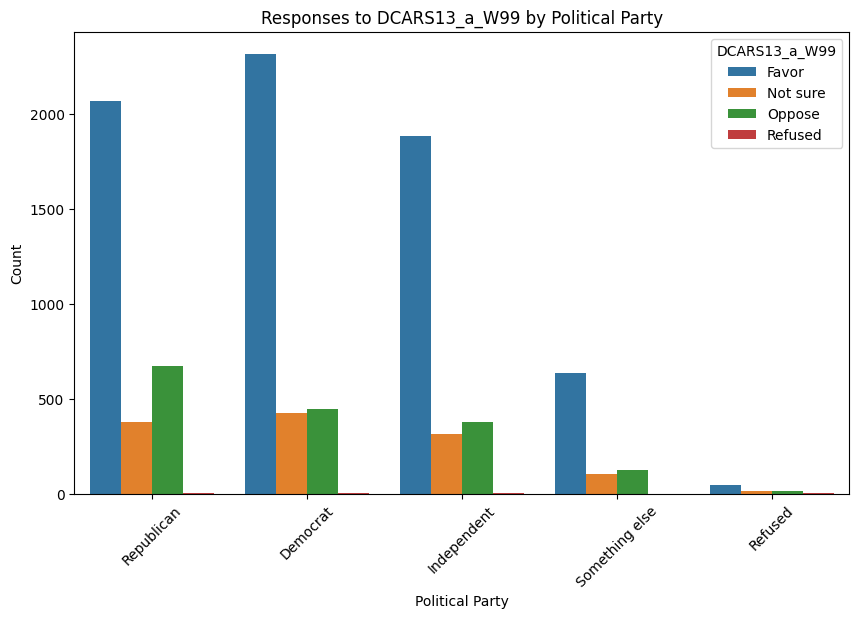

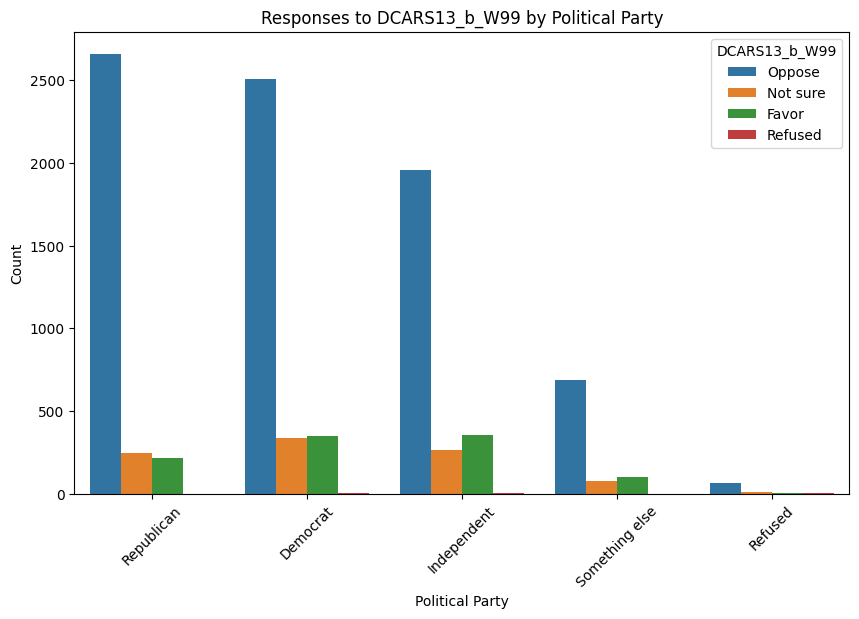

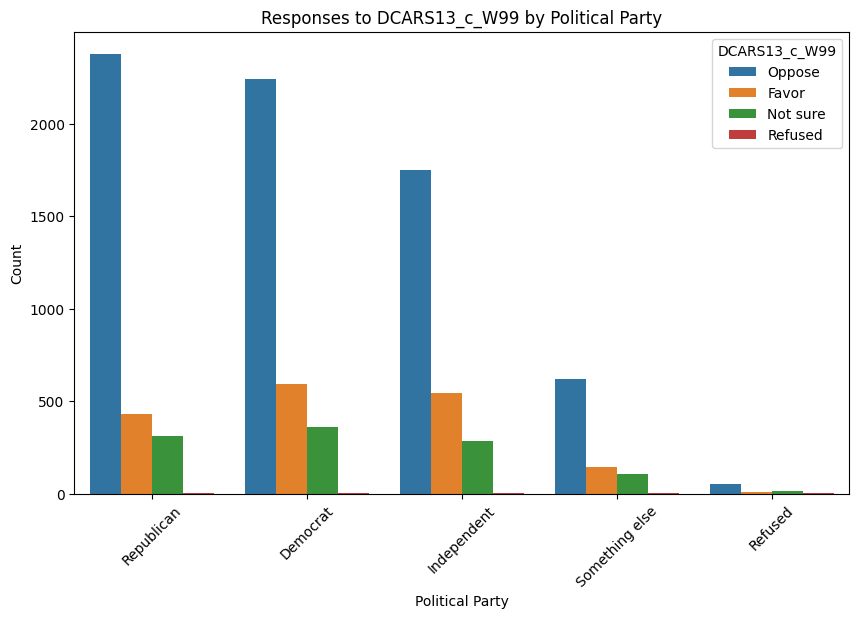

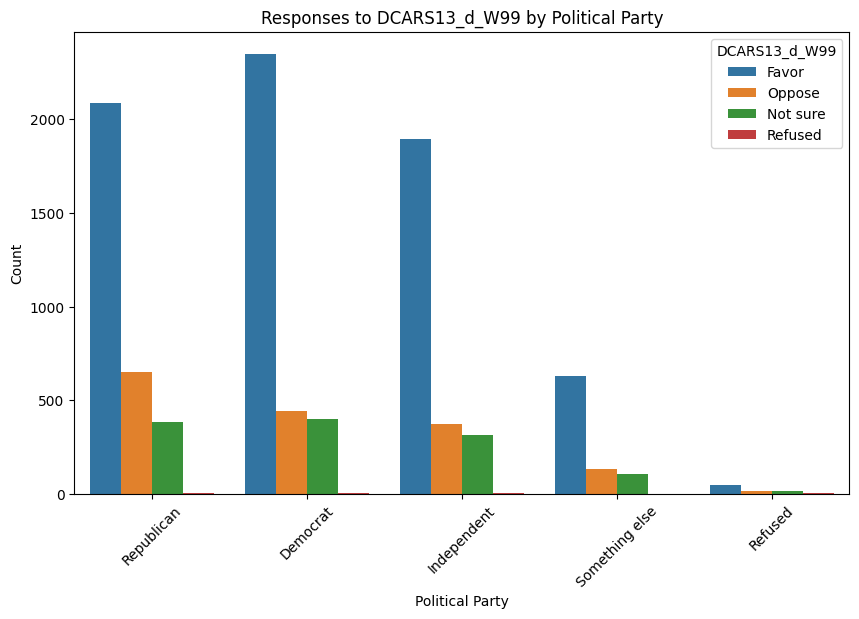

In [41]:

# List of columns to categorize
dcars_columns = [col for col in df_dropped.columns if col.startswith('DCARS')]

# Example demographic columns
demographic_columns = ['F_AGECAT', 'F_GENDER', 'F_INC_TIER2', 'F_REG', 'F_RACETHNMOD', 'F_CITIZEN', 'F_EDUCCAT2', 'F_MARITAL', 'F_PARTY_FINAL']

for col in dcars_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_dropped, x='F_PARTY_FINAL', hue=col)
    plt.title(f'Responses to {col} by Political Party')
    plt.xlabel('Political Party')
    plt.ylabel('Count')
    plt.legend(title=col)
    plt.xticks(rotation=45)
    plt.show()
#DCARS1 How much have you heard or read about driverless passenger vehicles?
#DCARS2 Do you think widespread use of driverless passenger vehicles would be a…
#DCARS3 Would you personally want to ride in a driverless passenger vehicle, if you had the opportunity?
#DCARS4 If the use of driverless passenger vehicles becomes widespread, do you think each of the following would happen? [RANDOMIZE ITEMS]
#   a. Older adults and people with disabilities will be able to live more independently
#   b. Many people who make their living by driving others or delivering things with passenger vehicles would lose their jobs
#   c. Getting from place to place would be less stressful
#   d. The computer systems in driverless
#DCARS5 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS6 If the use of driverless passenger vehicles becomes widespread, do you think that would…
#DCARS7 In the case of an unavoidable accident, should the computer systems guiding driverless vehicles be designed to prioritize the safety of…
#DCARS8 How much of a role do you think each of the following groups should have in setting standards for how driverless passenger vehicles are used?
#   a. Federal government agencies
#   b The companies that develop driverless passenger vehicles
#   c. The people who use driverless passenger vehicles
#   d. The dealerships that sell driverless passenger vehicles
#DCARS9 If the use of driverless passenger vehicles becomes widespread, which is your greater concern?
#DCARS10 Which statement comes closer to your view when it comes to ensuring the safety and effectiveness of driverless passenger vehicles?
#DCARS11 Would the use of driverless passenger vehicles be more acceptable, less acceptable or would it make no difference in each of the following circumstances?
#DCARS12 If the use of driverless passenger vehicles became widespread, how comfortable would you feel sharing the road with them?
#DCARS13 The technology used to operate driverless passenger vehicles could be used for a number of purposes. Would you favor or oppose the use of this technology in each of the following purposes?
#   a. Taxis and ride-sharing vehicles
#   b. 18-wheeler trucks
#   c. Buses for public transportation
#   d. Delivery vehicles
